In [ ]:
# Install the required libraries
# !pip install gspread google-auth

# Import libraries
import gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.auth import default

# Authenticate and create a client
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
import numpy as np
import pylab as pl
import seaborn as sns
import pandas as pd

In [ ]:
import os
os.chdir("/content/")
!ls

sample_data


#  OCRA Index

In [ ]:
for i in gc.list_spreadsheet_files():
  if 'OCRA Index (fixed) (green baseline measures)' in i['name']:
    spreadsheet = gc.open(i['name']).sheet1
    data = spreadsheet.get_all_values()

In [ ]:
df = pd.DataFrame(data[1:], columns=data[0])
df.drop(['Date'], inplace=True, axis=1)
df

ID participant Turn Plant/Line       Day   Time Age  Experience  \
0              VP1I    2        4/4  Thursday  14:22   32          5   
1              VP1I    2        4/4  Thursday  14:23   32          5   
2              VP1I    2        4/4  Thursday  14:24   32          5   
3              VP1I    2        4/4  Thursday  14:25   32          5   
4              VP1I    2        4/4  Thursday  14:26   32          5   
...             ...  ...        ...       ...    ...  ...        ...   
2300          VP43F    3        4/3    Monday  05:14   23      0.166   
2301          VP43F    3        4/3    Monday  05:15   23      0.166   
2302          VP43F    3        4/3    Monday  05:16   23      0.166   
2303          VP43F    3        4/3    Monday  05:17   23      0.166   
2304          VP43F    3        4/3    Monday  05:18   23      0.166   

     shoulderR_pose1 shoulderR_pose2 shoulderR_pose3  ... FRecu FFreqR FFreqL  \
0                                                     ...                       
1                                                     ...                       
2                                                     ...                       
3                                                     ...                       
4                                                     ...                       
...              ...             ...             ...  ...   ...    ...    ...   
2300                                                  ...                       
2301                                                  ...                       
2302                                                  ...                       
2303                                                  ...                       
2304                                                  ...                       

     FForcR FForcL FPostR FPostL FRisk IndexRiskR IndexRiskL  
0                                                             
1                                                             
2                                                             
3                                                             
4                                                             
...     ...    ...    ...    ...   ...        ...        ...  
2300                                                          
2301                                                          
2302                                                          
2303                                                          
2304                                                          

[2305 rows x 38 columns]

In [ ]:
for col in df.columns:
  df[col].replace('', np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
df

<ipython-input-8-216de0bad953>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace('', np.nan, inplace=True)


ID participant Turn Plant/Line        Day   Time Age  Experience  \
5              VP1I    2        4/4   Thursday  14:27   32          5   
6              VP1I    2        4/4   Thursday  14:28   32          5   
7              VP1I    2        4/4   Thursday  14:29   32          5   
8              VP1I    2        4/4   Thursday  14:30   32          5   
9              VP1I    2        4/4   Thursday  14:31   32          5   
...             ...  ...        ...        ...    ...  ...        ...   
2096          VP39F    3          8  Wednesday  05:00   32       0.25   
2097          VP39F    3          8  Wednesday  05:01   32       0.25   
2098          VP39F    3          8  Wednesday  05:02   32       0.25   
2099          VP39F    3          8  Wednesday  05:03   32       0.25   
2100          VP39F    3          8  Wednesday  05:04   32       0.25   

     shoulderR_pose1 shoulderR_pose2 shoulderR_pose3  ... FRecu FFreqR FFreqL  \
5               1714               0              25  ...     4     10     10   
6               1712               8              19  ...     4     10     10   
7               1580               0             159  ...     4     10     10   
8               1463               1             275  ...     4     10     10   
9               1590               0             149  ...     4     10     10   
...              ...             ...             ...  ...   ...    ...    ...   
2096            1672               3              64  ...     4     10     10   
2097            1729              10               0  ...     4     10     10   
2098            1710              26               3  ...     4     10      0   
2099            1581              65              93  ...     4     10     10   
2100            1526             163              46  ...     4     10     10   

     FForcR FForcL FPostR FPostL FRisk IndexRiskR IndexRiskL  
5         0      0      4      4     3     19.425     19.425  
6         0      0      4      4     3     19.425     19.425  
7         0      0      4      4     3     19.425     19.425  
8         0      0      4      4     3     19.425     19.425  
9         0      0      4      4     3     19.425     19.425  
...     ...    ...    ...    ...   ...        ...        ...  
2096      0      0      4      8     3     19.425     23.125  
2097      0      0      4      4     3     19.425     19.425  
2098      0      0      2      4     3     17.575     10.175  
2099      0      0      4      4     3     19.425     19.425  
2100      0      0      4      4     3     19.425     19.425  

[1175 rows x 38 columns]

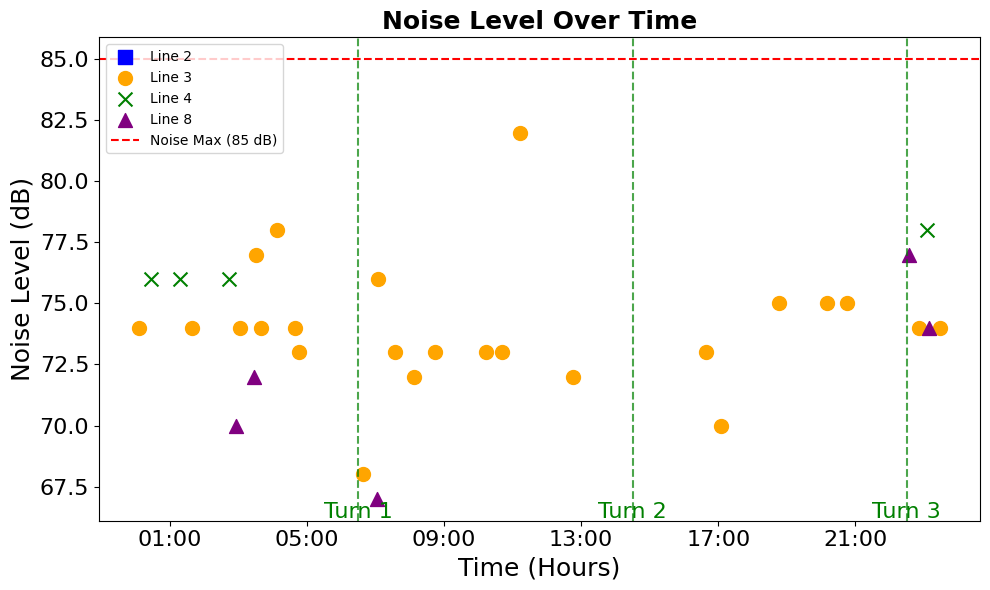

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Reload the dataset
file_path = 'Untitled spreadsheet - Sheet1 (2).csv'
data = pd.read_csv(file_path)

# Convert the 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M', errors='coerce')

# Remove rows with missing 'Time' or 'Noise level (dB)'
data = data.dropna(subset=['Time', 'Noise level (dB)'])

# Define markers and colors for each production line
line_markers = {2: 's', 3: 'o', 4: 'x', 8: '^'}
colors = {2: 'blue', 3: 'orange', 4: 'green', 8: 'purple'}

# Plot the graph
plt.figure(figsize=(10, 6))

for line, marker in line_markers.items():
    line_data = data[data['Production Line'] == line]
    plt.scatter(line_data['Time'], line_data['Noise level (dB)'], label=f'Line {line}', marker=marker, color=colors[line], s=100)

# Add lines for shift changes
shift_times = ['06:30', '14:30', '22:30']
shift_labels = ['Turn 1', 'Turn 2', 'Turn 3']
for shift, label in zip(shift_times, shift_labels):
    shift_time = datetime.strptime(shift, '%H:%M')
    plt.axvline(shift_time, color='green', linestyle='--', alpha=0.7)
    plt.text(shift_time, 66.2, label, color='green', fontsize=16, ha='center')

# Add a line for Noise Max
plt.axhline(y=85, color='red', linestyle='--', label='Noise Max (85 dB)')

# Formatting the graph
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=4))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Noise Level Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Time (Hours)', fontsize=18)
plt.ylabel('Noise Level (dB)', fontsize=18)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()



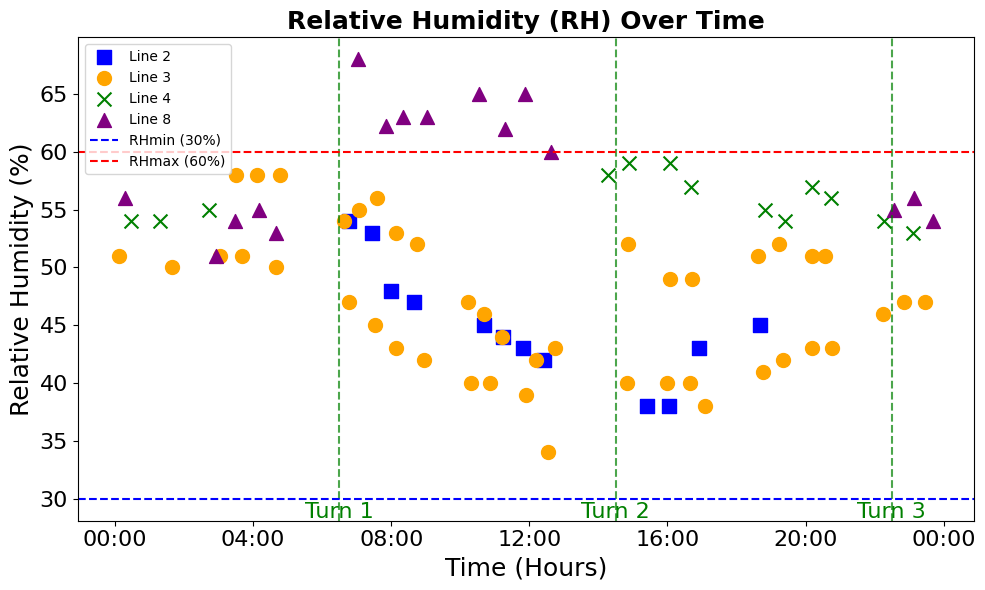

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Reload the dataset
file_path = 'Untitled spreadsheet - Sheet1 (2).csv'
data = pd.read_csv(file_path)

# Convert the 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M', errors='coerce')

# Remove rows with missing 'Time' or 'RH (%)'
data = data.dropna(subset=['Time', 'RH (%)'])

# Define markers and colors for each production line
line_markers = {2: 's', 3: 'o', 4: 'x', 8: '^'}
colors = {2: 'blue', 3: 'orange', 4: 'green', 8: 'purple'}

# Plot the graph
plt.figure(figsize=(10, 6))  # Increase figure size

for line, marker in line_markers.items():
    line_data = data[data['Production Line'] == line]
    plt.scatter(line_data['Time'], line_data['RH (%)'],
                label=f'Line {line}', marker=marker, color=colors[line], s=100)  # Increase marker size

# Add lines for shift changes
shift_times = ['06:30', '14:30', '22:30']
shift_labels = ['Turn 1', 'Turn 2', 'Turn 3']
for shift, label in zip(shift_times, shift_labels):
    shift_time = datetime.strptime(shift, '%H:%M')
    plt.axvline(shift_time, color='green', linestyle='--', alpha=0.7)
    plt.text(shift_time, 28.3, label, color='green', fontsize=16, ha='center')  # Increase font size for text

# Add horizontal lines for RHmin and RHmax
plt.axhline(y=30, color='blue', linestyle='--', label='RHmin (30%)')
plt.axhline(y=60, color='red', linestyle='--', label='RHmax (60%)')

# Formatting the graph
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=4))
plt.title('Relative Humidity (RH) Over Time', fontsize=18, fontweight='bold')  # Larger title font size
plt.xlabel('Time (Hours)', fontsize=18)  # Larger x-axis label font size
plt.ylabel('Relative Humidity (%)', fontsize=18)  # Larger y-axis label font size
plt.legend(loc='upper left', fontsize=10)  # Larger legend font size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()



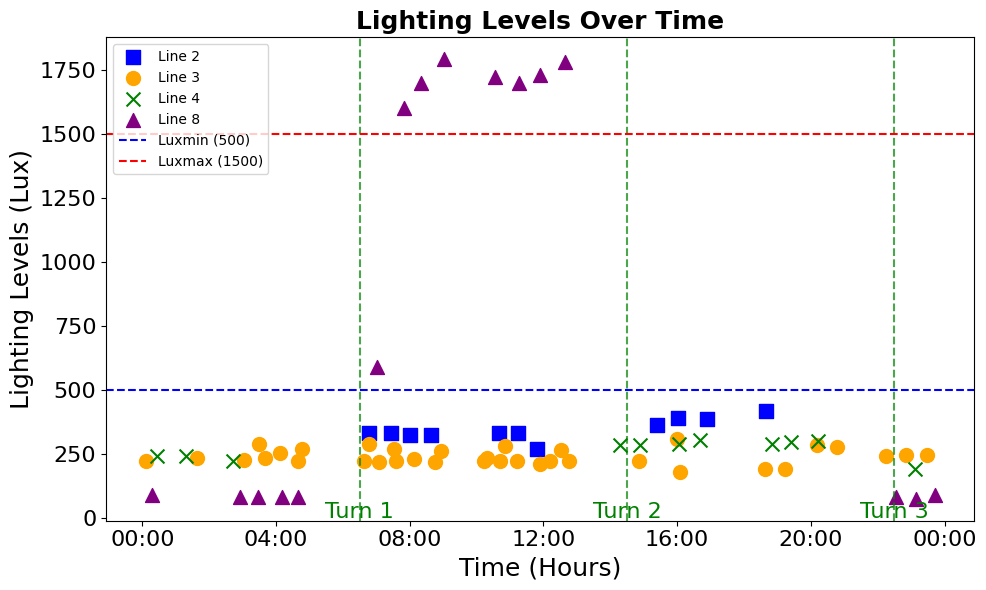

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Reload the dataset
file_path = 'Untitled spreadsheet - Sheet1 (2).csv'
data = pd.read_csv(file_path)

# Convert the 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M', errors='coerce')

# Remove rows with missing 'Time' or 'Lux'
data = data.dropna(subset=['Time', 'Lux'])

# Define markers and colors for each production line
line_markers = {2: 's', 3: 'o', 4: 'x', 8: '^'}
colors = {2: 'blue', 3: 'orange', 4: 'green', 8: 'purple'}

# Plot the graph
plt.figure(figsize=(10, 6))  # Increase figure size

for line, marker in line_markers.items():
    line_data = data[data['Production Line'] == line]
    plt.scatter(line_data['Time'], line_data['Lux'],
                label=f'Line {line}', marker=marker, color=colors[line], s=100)  # Increase marker size

# Add lines for shift changes
shift_times = ['06:30', '14:30', '22:30']
shift_labels = ['Turn 1', 'Turn 2', 'Turn 3']
for shift, label in zip(shift_times, shift_labels):
    shift_time = datetime.strptime(shift, '%H:%M')
    plt.axvline(shift_time, color='green', linestyle='--', alpha=0.7)
    plt.text(shift_time, 1, label, color='green', fontsize=16, ha='center')  # Increase font size for text

# Add horizontal lines for Luxmin and Luxmax
plt.axhline(y=500, color='blue', linestyle='--', label='Luxmin (500)')
plt.axhline(y=1500, color='red', linestyle='--', label='Luxmax (1500)')

# Formatting the graph
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=4))
plt.xticks(fontsize=16)  # Larger x-axis tick font size
plt.yticks(fontsize=16)  # Larger y-axis tick font size
plt.title('Lighting Levels Over Time', fontsize=18, fontweight='bold')  # Larger title font size
plt.xlabel('Time (Hours)', fontsize=18)  # Larger x-axis label font size
plt.ylabel('Lighting Levels (Lux)', fontsize=18)  # Larger y-axis label font size
plt.legend(loc='upper left', fontsize=10)  # Larger legend font size
plt.tight_layout()
plt.show()



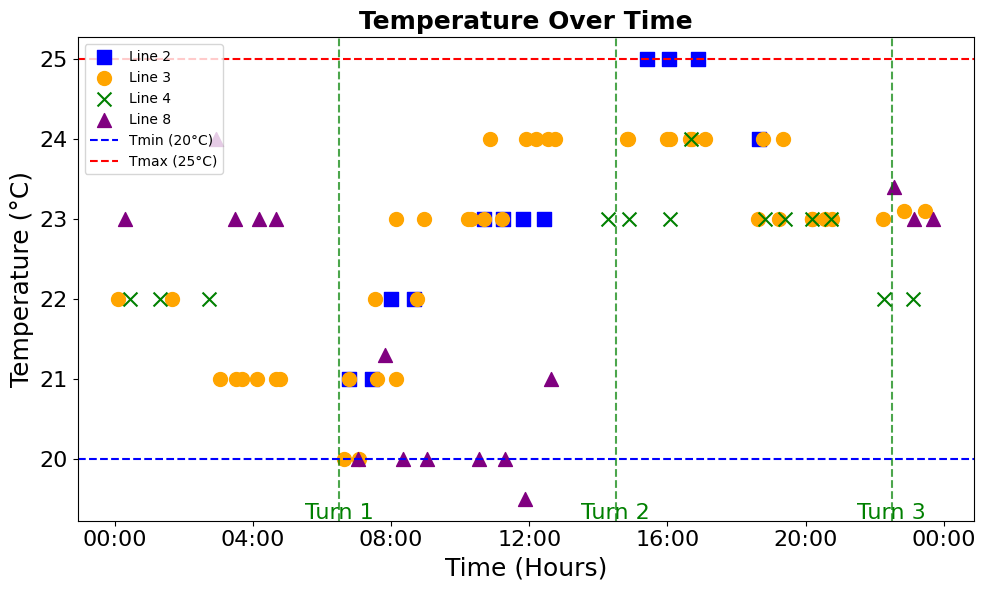

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Reload the dataset
file_path = 'Untitled spreadsheet - Sheet1 (2).csv'
data = pd.read_csv(file_path)

# Convert the 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M', errors='coerce')

# Remove rows with missing 'Time' or 'T (°C)'
data = data.dropna(subset=['Time', 'T (°C)'])

# Define markers and colors for each production line
line_markers = {2: 's', 3: 'o', 4: 'x', 8: '^'}
colors = {2: 'blue', 3: 'orange', 4: 'green', 8: 'purple'}

# Plot the graph
plt.figure(figsize=(10, 6))  # Increase figure size

for line, marker in line_markers.items():
    line_data = data[data['Production Line'] == line]
    plt.scatter(line_data['Time'], line_data['T (°C)'],
                label=f'Line {line}', marker=marker, color=colors[line], s=100)  # Increase marker size

# Add lines for shift changes
shift_times = ['06:30', '14:30', '22:30']
shift_labels = ['Turn 1', 'Turn 2', 'Turn 3']
for shift, label in zip(shift_times, shift_labels):
    shift_time = datetime.strptime(shift, '%H:%M')
    plt.axvline(shift_time, color='green', linestyle='--', alpha=0.7)
    plt.text(shift_time, 19.25, label, color='green', fontsize=16, ha='center')  # Increase font size for text

# Add horizontal lines for Tmin and Tmax
plt.axhline(y=20, color='blue', linestyle='--', label='Tmin (20°C)')
plt.axhline(y=25, color='red', linestyle='--', label='Tmax (25°C)')

# Formatting the graph
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=4))
plt.xticks(fontsize=16)  # Larger x-axis tick font size
plt.yticks(fontsize=16)  # Larger y-axis tick font size
plt.title('Temperature Over Time', fontsize=18, fontweight='bold')  # Larger title font size
plt.xlabel('Time (Hours)', fontsize=18)  # Larger x-axis label font size
plt.ylabel('Temperature (°C)', fontsize=18)  # Larger y-axis label font size
plt.legend(loc='upper left', fontsize=10)  # Larger legend font size
plt.tight_layout()
plt.show()


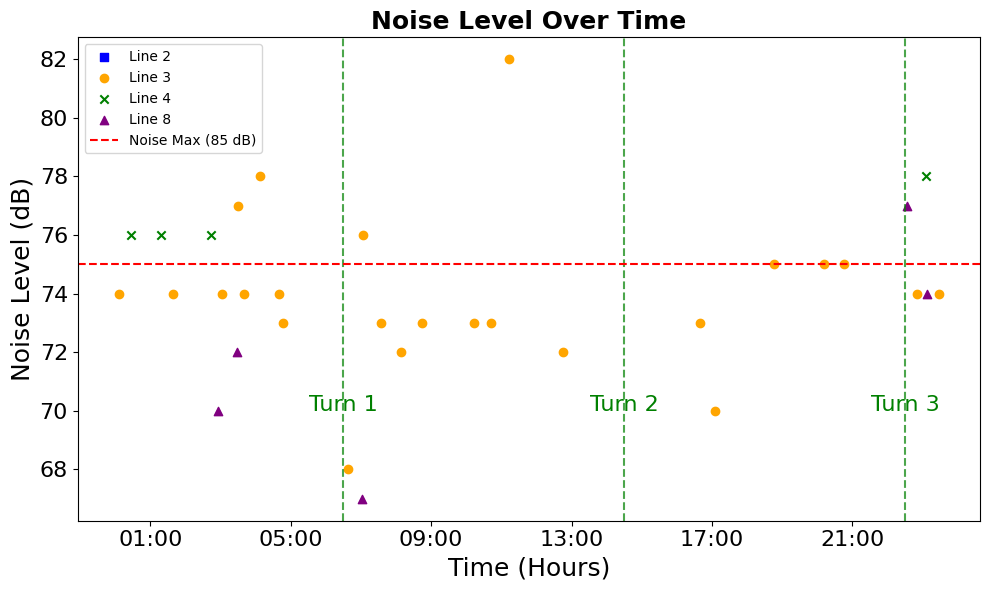

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Reload the dataset
file_path = 'Untitled spreadsheet - Sheet1 (2).csv'
data = pd.read_csv(file_path)

# Convert the 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M', errors='coerce')

# Remove rows with missing 'Time' or 'Noise level (dB)'
data = data.dropna(subset=['Time', 'Noise level (dB)'])

# Define markers and colors for each production line
line_markers = {2: 's', 3: 'o', 4: 'x', 8: '^'}
colors = {2: 'blue', 3: 'orange', 4: 'green', 8: 'purple'}

# Plot the graph
plt.figure(figsize=(10, 6))

for line, marker in line_markers.items():
    line_data = data[data['Production Line'] == line]
    plt.scatter(line_data['Time'], line_data['Noise level (dB)'], label=f'Line {line}', marker=marker, color=colors[line])

# Add lines for shift changes
shift_times = ['06:30', '14:30', '22:30']
shift_labels = ['Turn 1', 'Turn 2', 'Turn 3']
for shift, label in zip(shift_times, shift_labels):
    shift_time = datetime.strptime(shift, '%H:%M')
    plt.axvline(shift_time, color='green', linestyle='--', alpha=0.7)
    plt.text(shift_time, 70, label, color='green', fontsize=16, ha='center')

# Add horizontal line for Noise Max
plt.axhline(y=75, color='red', linestyle='--', label='Noise Max (85 dB)')

# Formatting the graph
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=4))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Noise Level Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Time (Hours)', fontsize=18)
plt.ylabel('Noise Level (dB)', fontsize=18)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


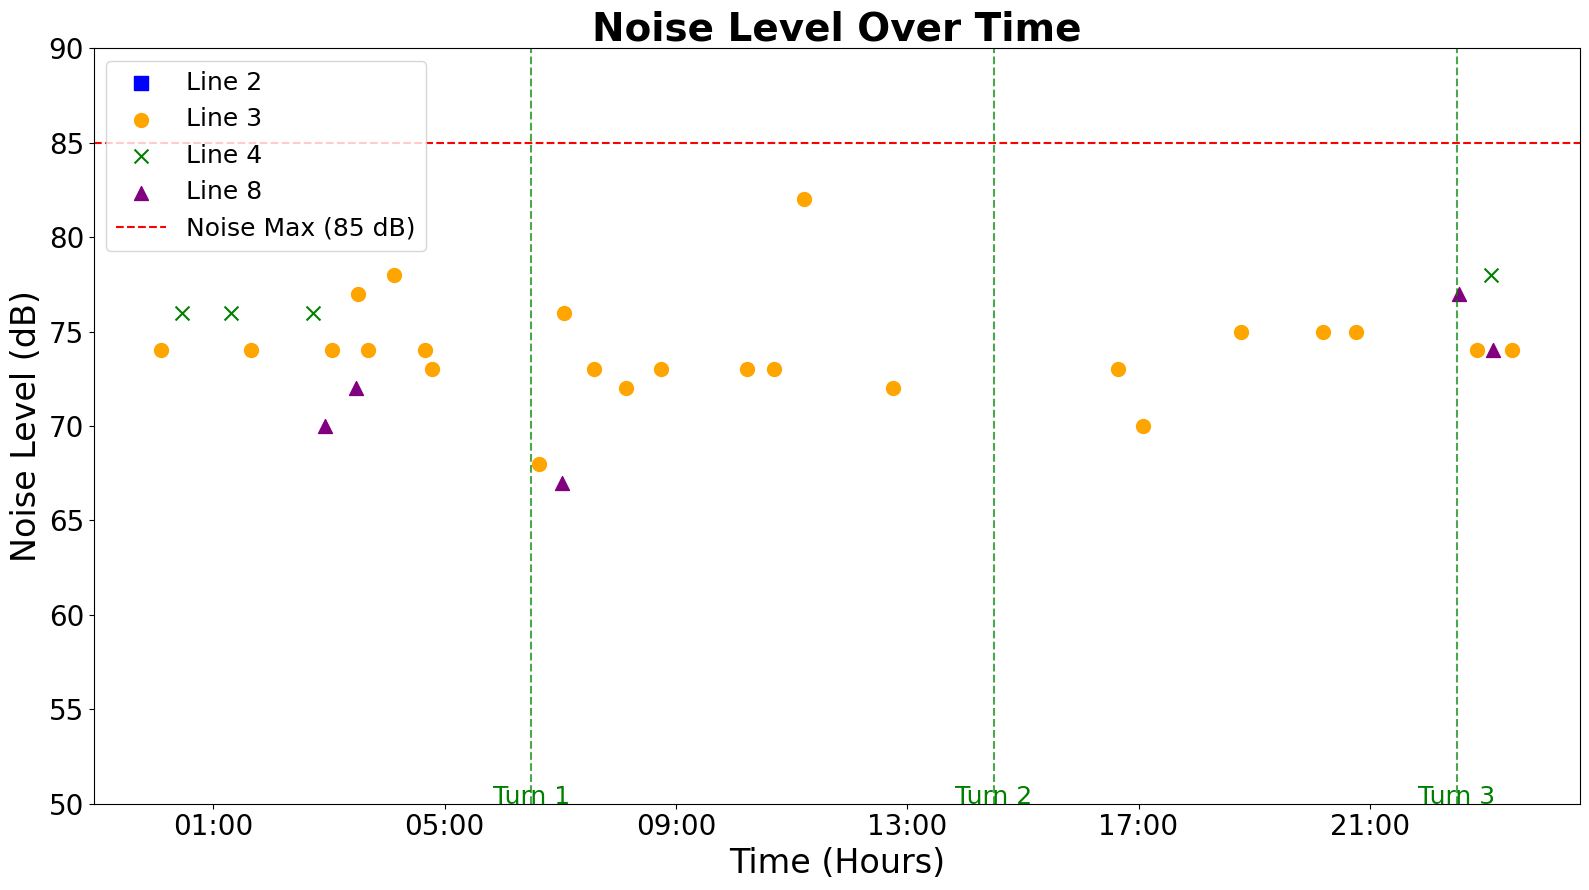

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Reload the dataset
file_path = 'Untitled spreadsheet - Sheet1 (2).csv'
data = pd.read_csv(file_path)

# Convert the 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M', errors='coerce')

# Remove rows with missing 'Time' or 'Noise level (dB)'
data = data.dropna(subset=['Time', 'Noise level (dB)'])

# Define markers and colors for each production line
line_markers = {2: 's', 3: 'o', 4: 'x', 8: '^'}
colors = {2: 'blue', 3: 'orange', 4: 'green', 8: 'purple'}

# Plot the graph
plt.figure(figsize=(16, 9))  # Increase figure size

for line, marker in line_markers.items():
    line_data = data[data['Production Line'] == line]
    plt.scatter(line_data['Time'], line_data['Noise level (dB)'],
                label=f'Line {line}', marker=marker, color=colors[line], s=100)  # Increase marker size

# Add lines for shift changes
shift_times = ['06:30', '14:30', '22:30']
shift_labels = ['Turn 1', 'Turn 2', 'Turn 3']
for shift, label in zip(shift_times, shift_labels):
    shift_time = datetime.strptime(shift, '%H:%M')
    plt.axvline(shift_time, color='green', linestyle='--', alpha=0.7)
    plt.text(shift_time, 50, label, color='green', fontsize=18, ha='center')  # Increase font size for text

# Add horizontal line for Noise Max
plt.axhline(y=85, color='red', linestyle='--', label='Noise Max (85 dB)')

# Formatting the graph
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=4))
plt.xticks(fontsize=20)  # Larger x-axis tick font size
plt.yticks(range(50, 95, 5), fontsize=20)  # Larger y-axis tick font size
plt.title('Noise Level Over Time', fontsize=28, fontweight='bold')  # Larger title font size
plt.xlabel('Time (Hours)', fontsize=24)  # Larger x-axis label font size
plt.ylabel('Noise Level (dB)', fontsize=24)  # Larger y-axis label font size
plt.legend(loc='upper left', fontsize=18)  # Larger legend font size
plt.tight_layout()
plt.show()



In [ ]:
df.to_csv('OCRA_raw.csv', index=False)

In [ ]:
def convertID(ID):
  return str(ID[-1:])

df['ID participant'] = df['ID participant'].apply(convertID)
df

ID participant Turn Plant/Line        Day   Time Age  Experience  \
5                 I    2        4/4   Thursday  14:27   32          5   
6                 I    2        4/4   Thursday  14:28   32          5   
7                 I    2        4/4   Thursday  14:29   32          5   
8                 I    2        4/4   Thursday  14:30   32          5   
9                 I    2        4/4   Thursday  14:31   32          5   
...             ...  ...        ...        ...    ...  ...        ...   
2096              F    3          8  Wednesday  05:00   32       0.25   
2097              F    3          8  Wednesday  05:01   32       0.25   
2098              F    3          8  Wednesday  05:02   32       0.25   
2099              F    3          8  Wednesday  05:03   32       0.25   
2100              F    3          8  Wednesday  05:04   32       0.25   

     shoulderR_pose1 shoulderR_pose2 shoulderR_pose3  ... FRecu FFreqR FFreqL  \
5               1714               0              25  ...     4     10     10   
6               1712               8              19  ...     4     10     10   
7               1580               0             159  ...     4     10     10   
8               1463               1             275  ...     4     10     10   
9               1590               0             149  ...     4     10     10   
...              ...             ...             ...  ...   ...    ...    ...   
2096            1672               3              64  ...     4     10     10   
2097            1729              10               0  ...     4     10     10   
2098            1710              26               3  ...     4     10      0   
2099            1581              65              93  ...     4     10     10   
2100            1526             163              46  ...     4     10     10   

     FForcR FForcL FPostR FPostL FRisk IndexRiskR IndexRiskL  
5         0      0      4      4     3     19.425     19.425  
6         0      0      4      4     3     19.425     19.425  
7         0      0      4      4     3     19.425     19.425  
8         0      0      4      4     3     19.425     19.425  
9         0      0      4      4     3     19.425     19.425  
...     ...    ...    ...    ...   ...        ...        ...  
2096      0      0      4      8     3     19.425     23.125  
2097      0      0      4      4     3     19.425     19.425  
2098      0      0      2      4     3     17.575     10.175  
2099      0      0      4      4     3     19.425     19.425  
2100      0      0      4      4     3     19.425     19.425  

[1175 rows x 38 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder_id = LabelEncoder()
df['ID participant'] = encoder_id.fit_transform(df['ID participant'])

encoder_day = LabelEncoder()
df['Day'] = encoder_day.fit_transform(df['Day'])

In [ ]:
df = df[df['Plant/Line']!= '8']
df

encoder_plant = LabelEncoder()
df['Plant/Line'] = encoder_plant.fit_transform(df['Plant/Line'])
df

def convertTime(Time):
  return float(Time[:2])+float(Time[3:])/60

df['Time'] = df['Time'].apply(convertTime)
df

<ipython-input-12-970bc1bb5334>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Plant/Line'] = encoder_plant.fit_transform(df['Plant/Line'])
<ipython-input-12-970bc1bb5334>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = df['Time'].apply(convertTime)


ID participant Turn  Plant/Line  Day       Time Age  Experience  \
5                  1    2           2    1  14.450000   32          5   
6                  1    2           2    1  14.466667   32          5   
7                  1    2           2    1  14.483333   32          5   
8                  1    2           2    1  14.500000   32          5   
9                  1    2           2    1  14.516667   32          5   
...              ...  ...         ...  ...        ...  ...        ...   
1901               0    3           1    2   5.116667   19        0.5   
1902               0    3           1    2   5.133333   19        0.5   
1903               0    3           1    2   5.150000   19        0.5   
1904               0    3           1    2   5.166667   19        0.5   
1905               0    3           1    2   5.183333   19        0.5   

     shoulderR_pose1 shoulderR_pose2 shoulderR_pose3  ... FRecu FFreqR FFreqL  \
5               1714               0              25  ...     4     10     10   
6               1712               8              19  ...     4     10     10   
7               1580               0             159  ...     4     10     10   
8               1463               1             275  ...     4     10     10   
9               1590               0             149  ...     4     10     10   
...              ...             ...             ...  ...   ...    ...    ...   
1901            1558               2             179  ...     4     10     10   
1902            1612               1             126  ...     4     10     10   
1903            1649               1              89  ...     4     10     10   
1904            1628               4             107  ...     4     10     10   
1905            1636               0             103  ...     4     10     10   

     FForcR FForcL FPostR FPostL FRisk IndexRiskR IndexRiskL  
5         0      0      4      4     3     19.425     19.425  
6         0      0      4      4     3     19.425     19.425  
7         0      0      4      4     3     19.425     19.425  
8         0      0      4      4     3     19.425     19.425  
9         0      0      4      4     3     19.425     19.425  
...     ...    ...    ...    ...   ...        ...        ...  
1901      0      0      4      8     3     19.425     23.125  
1902      0      0      4      8     3     19.425     23.125  
1903      0      0      4      8     3     19.425     23.125  
1904      0      0      4      8     3     19.425     23.125  
1905      0      0      4      8     3     19.425     23.125  

[936 rows x 38 columns]

In [ ]:
df.to_csv('OCRA_quan.csv', index=False)

In [ ]:
ocra_df = pd.read_csv('OCRA_quan.csv')
ocra_df

ID participant  Turn  Plant/Line  Day       Time  Age   Experience  \
0                 1     2           2    1  14.450000    32         5.0   
1                 1     2           2    1  14.466667    32         5.0   
2                 1     2           2    1  14.483333    32         5.0   
3                 1     2           2    1  14.500000    32         5.0   
4                 1     2           2    1  14.516667    32         5.0   
..              ...   ...         ...  ...        ...   ...         ...   
931               0     3           1    2   5.116667    19         0.5   
932               0     3           1    2   5.133333    19         0.5   
933               0     3           1    2   5.150000    19         0.5   
934               0     3           1    2   5.166667    19         0.5   
935               0     3           1    2   5.183333    19         0.5   

     shoulderR_pose1  shoulderR_pose2  shoulderR_pose3  ...  FRecu  FFreqR  \
0               1714                0               25  ...      4      10   
1               1712                8               19  ...      4      10   
2               1580                0              159  ...      4      10   
3               1463                1              275  ...      4      10   
4               1590                0              149  ...      4      10   
..               ...              ...              ...  ...    ...     ...   
931             1558                2              179  ...      4      10   
932             1612                1              126  ...      4      10   
933             1649                1               89  ...      4      10   
934             1628                4              107  ...      4      10   
935             1636                0              103  ...      4      10   

     FFreqL  FForcR  FForcL  FPostR  FPostL  FRisk  IndexRiskR  IndexRiskL  
0        10       0       0       4       4      3      19.425      19.425  
1        10       0       0       4       4      3      19.425      19.425  
2        10       0       0       4       4      3      19.425      19.425  
3        10       0       0       4       4      3      19.425      19.425  
4        10       0       0       4       4      3      19.425      19.425  
..      ...     ...     ...     ...     ...    ...         ...         ...  
931      10       0       0       4       8      3      19.425      23.125  
932      10       0       0       4       8      3      19.425      23.125  
933      10       0       0       4       8      3      19.425      23.125  
934      10       0       0       4       8      3      19.425      23.125  
935      10       0       0       4       8      3      19.425      23.125  

[936 rows x 38 columns]

In [ ]:
from tokenize import Ignore
columns = ['ID participant', 'Turn',	'Plant/Line',	'Day', 'Age ', 'Experience', 'IndexRiskR',	'IndexRiskL']

ocra_reduced = df[columns]

ocra_reduced['IndexRiskR'] = ocra_reduced['IndexRiskR'].astype(float)
ocra_reduced['IndexRiskL'] = ocra_reduced['IndexRiskL'].astype(float)

ocra_reduced = ocra_reduced.rename(columns={'ID participant': 'Moment'})
ocra_reduced.to_csv('OCRA REDUCED.csv', index=False)
ocra_reduced

<ipython-input-15-b8ca9f6c44d6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocra_reduced['IndexRiskR'] = ocra_reduced['IndexRiskR'].astype(float)
<ipython-input-15-b8ca9f6c44d6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocra_reduced['IndexRiskL'] = ocra_reduced['IndexRiskL'].astype(float)


Moment Turn  Plant/Line  Day Age  Experience  IndexRiskR  IndexRiskL
5          1    2           2    1   32          5      19.425      19.425
6          1    2           2    1   32          5      19.425      19.425
7          1    2           2    1   32          5      19.425      19.425
8          1    2           2    1   32          5      19.425      19.425
9          1    2           2    1   32          5      19.425      19.425
...      ...  ...         ...  ...  ...        ...         ...         ...
1901       0    3           1    2   19        0.5      19.425      23.125
1902       0    3           1    2   19        0.5      19.425      23.125
1903       0    3           1    2   19        0.5      19.425      23.125
1904       0    3           1    2   19        0.5      19.425      23.125
1905       0    3           1    2   19        0.5      19.425      23.125

[936 rows x 8 columns]

## Correlation Analysis

In [ ]:
ocra_df.corr()

ID participant      Turn  Plant/Line       Day      Time  \
ID participant         1.000000  0.019020   -0.015378  0.142426 -0.114173   
Turn                   0.019020  1.000000    0.441397  0.221155  0.173786   
Plant/Line            -0.015378  0.441397    1.000000 -0.357874  0.401816   
Day                    0.142426  0.221155   -0.357874  1.000000 -0.390003   
Time                  -0.114173  0.173786    0.401816 -0.390003  1.000000   
Age                   -0.138058 -0.254791    0.024634 -0.132573  0.165078   
Experience            -0.090128 -0.279749    0.064054 -0.304007  0.029611   
shoulderR_pose1       -0.049656  0.047754   -0.041263 -0.091306  0.055594   
shoulderR_pose2        0.049591 -0.080918   -0.103211  0.134201 -0.068860   
shoulderR_pose3        0.130048  0.016356    0.145401  0.180088 -0.091319   
shoulderL_pose1        0.020025  0.061139    0.059293 -0.090180  0.075102   
shoulderL_pose2        0.015298 -0.000804   -0.118674  0.220165 -0.094916   
shoulderL_pose3       -0.033118 -0.036521   -0.111397  0.212384 -0.175011   
elbowR_pose1           0.132160 -0.114643   -0.049169  0.305389 -0.042044   
elbowR_pose2          -0.089646  0.090323   -0.175924  0.334332  0.043408   
elbowL_pose1           0.203063 -0.116519    0.136697  0.160402 -0.019894   
elbowL_pose2          -0.033660  0.120598   -0.050152  0.112917  0.078513   
wristR_pose1                NaN       NaN         NaN       NaN       NaN   
wristR_pose2                NaN       NaN         NaN       NaN       NaN   
wristL_pose1                NaN       NaN         NaN       NaN       NaN   
wristL_pose2                NaN       NaN         NaN       NaN       NaN   
handR_pose1           -0.164343 -0.245365   -0.332530  0.058381  0.004759   
handR_pose2            0.019866 -0.015471   -0.079222  0.072689 -0.074773   
handR_pose3           -0.217639 -0.029195   -0.222771  0.073575 -0.017878   
handL_pose1            0.097066 -0.134976   -0.272023  0.143081 -0.035196   
handL_pose2           -0.019374  0.110117    0.008808  0.073093 -0.061248   
handL_pose3           -0.063234  0.217336    0.152633  0.175390 -0.210566   
FDura                  0.022944 -0.099988   -0.180305  0.006664  0.040716   
FRecu                       NaN       NaN         NaN       NaN       NaN   
FFreqR                      NaN       NaN         NaN       NaN       NaN   
FFreqL                -0.004358  0.010653   -0.004950  0.222969 -0.075545   
FForcR                      NaN       NaN         NaN       NaN       NaN   
FForcL                      NaN       NaN         NaN       NaN       NaN   
FPostR                 0.057409 -0.046966   -0.167059  0.249749 -0.070448   
FPostL                -0.039154  0.144140    0.180940  0.064882 -0.083144   
FRisk                       NaN       NaN         NaN       NaN       NaN   
IndexRiskR             0.057409 -0.046966   -0.167059  0.249749 -0.070448   
IndexRiskL            -0.025698  0.091099    0.102440  0.182906 -0.097686   

                     Age   Experience  shoulderR_pose1  shoulderR_pose2  \
ID participant  -0.138058   -0.090128        -0.049656         0.049591   
Turn            -0.254791   -0.279749         0.047754        -0.080918   
Plant/Line       0.024634    0.064054        -0.041263        -0.103211   
Day             -0.132573   -0.304007        -0.091306         0.134201   
Time             0.165078    0.029611         0.055594        -0.068860   
Age              1.000000    0.602732        -0.078750        -0.022374   
Experience       0.602732    1.000000        -0.047386        -0.038153   
shoulderR_pose1 -0.078750   -0.047386         1.000000         0.039319   
shoulderR_pose2 -0.022374   -0.038153         0.039319         1.000000   
shoulderR_pose3  0.113311    0.034189        -0.398511         0.139982   
shoulderL_pose1 -0.039133   -0.073172         0.912218         0.094981   
shoulderL_pose2  0.019564   -0.074770        -0.030137         0.569633   
shoulderL_pose3  0.013920    0.135260 

In [ ]:
ocra_df.drop(['FRisk','FForcL','FForcR','FRecu','FDura','FFreqR','FFreqL','FPostR','FPostL','FRisk','wristL_pose2','wristL_pose1','wristR_pose2','wristR_pose1'], axis=1, inplace=True)
ocra_df

ID participant  Turn  Plant/Line  Day       Time  Age   Experience  \
0                 1     2           2    1  14.450000    32         5.0   
1                 1     2           2    1  14.466667    32         5.0   
2                 1     2           2    1  14.483333    32         5.0   
3                 1     2           2    1  14.500000    32         5.0   
4                 1     2           2    1  14.516667    32         5.0   
..              ...   ...         ...  ...        ...   ...         ...   
931               0     3           1    2   5.116667    19         0.5   
932               0     3           1    2   5.133333    19         0.5   
933               0     3           1    2   5.150000    19         0.5   
934               0     3           1    2   5.166667    19         0.5   
935               0     3           1    2   5.183333    19         0.5   

     shoulderR_pose1  shoulderR_pose2  shoulderR_pose3  ...  elbowL_pose1  \
0               1714                0               25  ...           272   
1               1712                8               19  ...           274   
2               1580                0              159  ...           293   
3               1463                1              275  ...           266   
4               1590                0              149  ...           326   
..               ...              ...              ...  ...           ...   
931             1558                2              179  ...           403   
932             1612                1              126  ...           366   
933             1649                1               89  ...           424   
934             1628                4              107  ...           404   
935             1636                0              103  ...           390   

     elbowL_pose2  handR_pose1  handR_pose2  handR_pose3  handL_pose1  \
0             846           71            4           12            5   
1             841           54            0           33            8   
2             837           68            2           10            5   
3             820           55            0           16           16   
4             858           55            0            3            5   
..            ...          ...          ...          ...          ...   
931           678            1            2          205            0   
932           625            5           13          269            0   
933           516            4            1          203            0   
934           348           12            0          135            0   
935           584            8            1          200            0   

     handL_pose2  handL_pose3  IndexRiskR  IndexRiskL  
0              2          754      19.425      19.425  
1              7          763      19.425      19.425  
2              4          901      19.425      19.425  
3              0          764      19.425      19.425  
4              0         1151      19.425      19.425  
..           ...          ...         ...         ...  
931            0         2731      19.425      23.125  
932            0         1862      19.425      23.125  
933            0         2010      19.425      23.125  
934            0         2307      19.425      23.125  
935            0         2095      19.425      23.125  

[936 rows x 25 columns]

In [ ]:
ocra_df.corr()

ID participant      Turn  Plant/Line       Day      Time  \
ID participant         1.000000  0.019020   -0.015378  0.142426 -0.114173   
Turn                   0.019020  1.000000    0.441397  0.221155  0.173786   
Plant/Line            -0.015378  0.441397    1.000000 -0.357874  0.401816   
Day                    0.142426  0.221155   -0.357874  1.000000 -0.390003   
Time                  -0.114173  0.173786    0.401816 -0.390003  1.000000   
Age                   -0.138058 -0.254791    0.024634 -0.132573  0.165078   
Experience            -0.090128 -0.279749    0.064054 -0.304007  0.029611   
shoulderR_pose1       -0.049656  0.047754   -0.041263 -0.091306  0.055594   
shoulderR_pose2        0.049591 -0.080918   -0.103211  0.134201 -0.068860   
shoulderR_pose3        0.130048  0.016356    0.145401  0.180088 -0.091319   
shoulderL_pose1        0.020025  0.061139    0.059293 -0.090180  0.075102   
shoulderL_pose2        0.015298 -0.000804   -0.118674  0.220165 -0.094916   
shoulderL_pose3       -0.033118 -0.036521   -0.111397  0.212384 -0.175011   
elbowR_pose1           0.132160 -0.114643   -0.049169  0.305389 -0.042044   
elbowR_pose2          -0.089646  0.090323   -0.175924  0.334332  0.043408   
elbowL_pose1           0.203063 -0.116519    0.136697  0.160402 -0.019894   
elbowL_pose2          -0.033660  0.120598   -0.050152  0.112917  0.078513   
handR_pose1           -0.164343 -0.245365   -0.332530  0.058381  0.004759   
handR_pose2            0.019866 -0.015471   -0.079222  0.072689 -0.074773   
handR_pose3           -0.217639 -0.029195   -0.222771  0.073575 -0.017878   
handL_pose1            0.097066 -0.134976   -0.272023  0.143081 -0.035196   
handL_pose2           -0.019374  0.110117    0.008808  0.073093 -0.061248   
handL_pose3           -0.063234  0.217336    0.152633  0.175390 -0.210566   
IndexRiskR             0.057409 -0.046966   -0.167059  0.249749 -0.070448   
IndexRiskL            -0.025698  0.091099    0.102440  0.182906 -0.097686   

                     Age   Experience  shoulderR_pose1  shoulderR_pose2  \
ID participant  -0.138058   -0.090128        -0.049656         0.049591   
Turn            -0.254791   -0.279749         0.047754        -0.080918   
Plant/Line       0.024634    0.064054        -0.041263        -0.103211   
Day             -0.132573   -0.304007        -0.091306         0.134201   
Time             0.165078    0.029611         0.055594        -0.068860   
Age              1.000000    0.602732        -0.078750        -0.022374   
Experience       0.602732    1.000000        -0.047386        -0.038153   
shoulderR_pose1 -0.078750   -0.047386         1.000000         0.039319   
shoulderR_pose2 -0.022374   -0.038153         0.039319         1.000000   
shoulderR_pose3  0.113311    0.034189        -0.398511         0.139982   
shoulderL_pose1 -0.039133   -0.073172         0.912218         0.094981   
shoulderL_pose2  0.019564   -0.074770        -0.030137         0.569633   
shoulderL_pose3  0.013920    0.135260        -0.159150         0.136474   
elbowR_pose1     0.227255    0.097868         0.106052         0.207861   
elbowR_pose2    -0.182394   -0.163865         0.397393         0.156332   
elbowL_pose1     0.040048   -0.068879         0.048537         0.156731   
elbowL_pose2    -0.161987   -0.078722         0.405866         0.109253   
handR_pose1      0.039317    0.028284         0.039488        -0.025232   
handR_pose2     -0.040481   -0.033377        -0.077739        -0.006769   
handR_pose3     -0.081319   -0.011796         0.029685         0.004139   
handL_pose1     -0.103724   -0.056392         0.025006         0.111483   
handL_pose2     -0.063177   -0.044256         0.006183        -0.016600   
handL_pose3     -0.009811   -0.114218         0.134509         0.056580   
IndexRiskR      -0.012343   -0.012507         0.423151         0.167921   
IndexRiskL      -0.047290   -0.072698         0.079349         0.081762   

                 shoulderR_pose3  ...  elbowL_pose1  elbowL_pos

<Axes: >

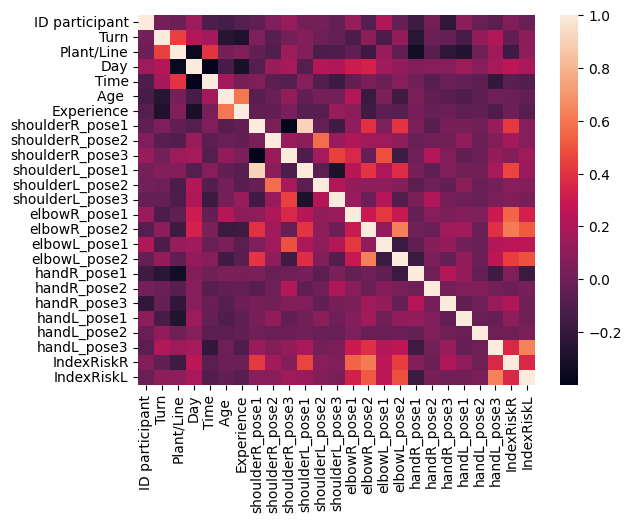

In [ ]:
sns.heatmap(ocra_df.corr(), xticklabels=True, yticklabels=True)

<Axes: >

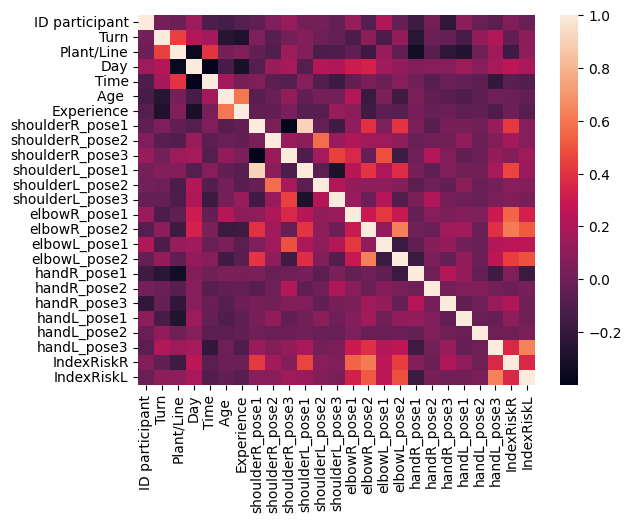

In [ ]:
sns.heatmap(ocra_df.corr(), xticklabels=True, yticklabels=True)

<Axes: >

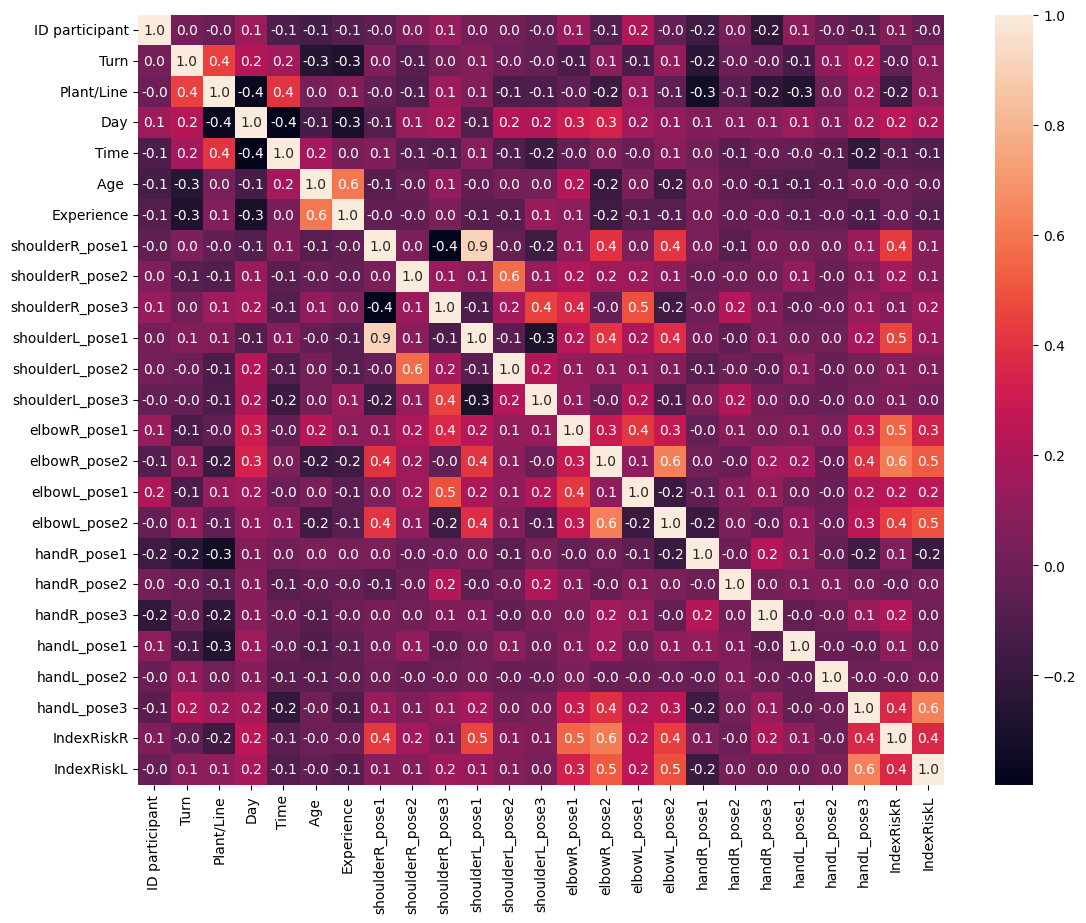

In [ ]:
fig = pl.figure(figsize=(13,10))
sns.heatmap(ocra_df.corr(), xticklabels=True, yticklabels=True, annot=True, fmt='.1f')

<Axes: >

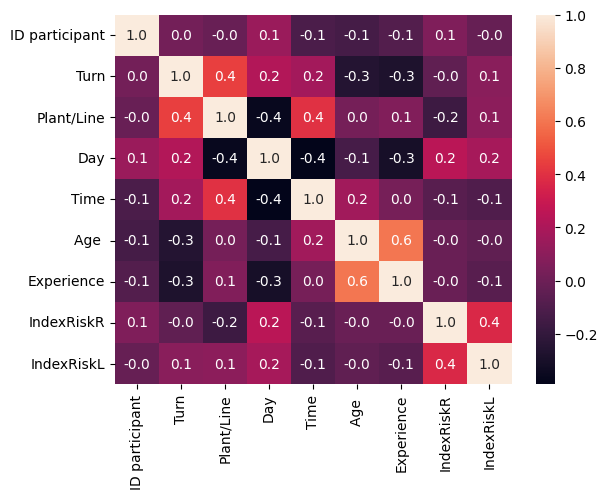

In [ ]:
poses = ['shoulderR_pose1','shoulderR_pose2','shoulderR_pose3',
         'shoulderL_pose1','shoulderL_pose2','shoulderL_pose3',
         'elbowR_pose1','elbowR_pose2',
         'elbowL_pose1','elbowL_pose2',
         'handR_pose1','handR_pose2','handR_pose3',
         'handL_pose1','handL_pose2','handL_pose3',
         ]
sns.heatmap(ocra_df.drop(poses, axis=1).corr(), xticklabels=True, yticklabels=True, annot=True, fmt='.1f')

<Axes: >

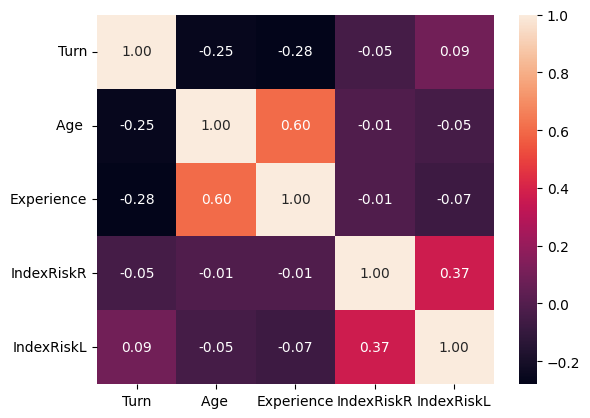

In [ ]:
base = ['Turn','Age ','Experience','IndexRiskR','IndexRiskL']
sns.heatmap(ocra_df[base].corr(), xticklabels=True, yticklabels=True, annot=True, fmt='.2f')

<Axes: >

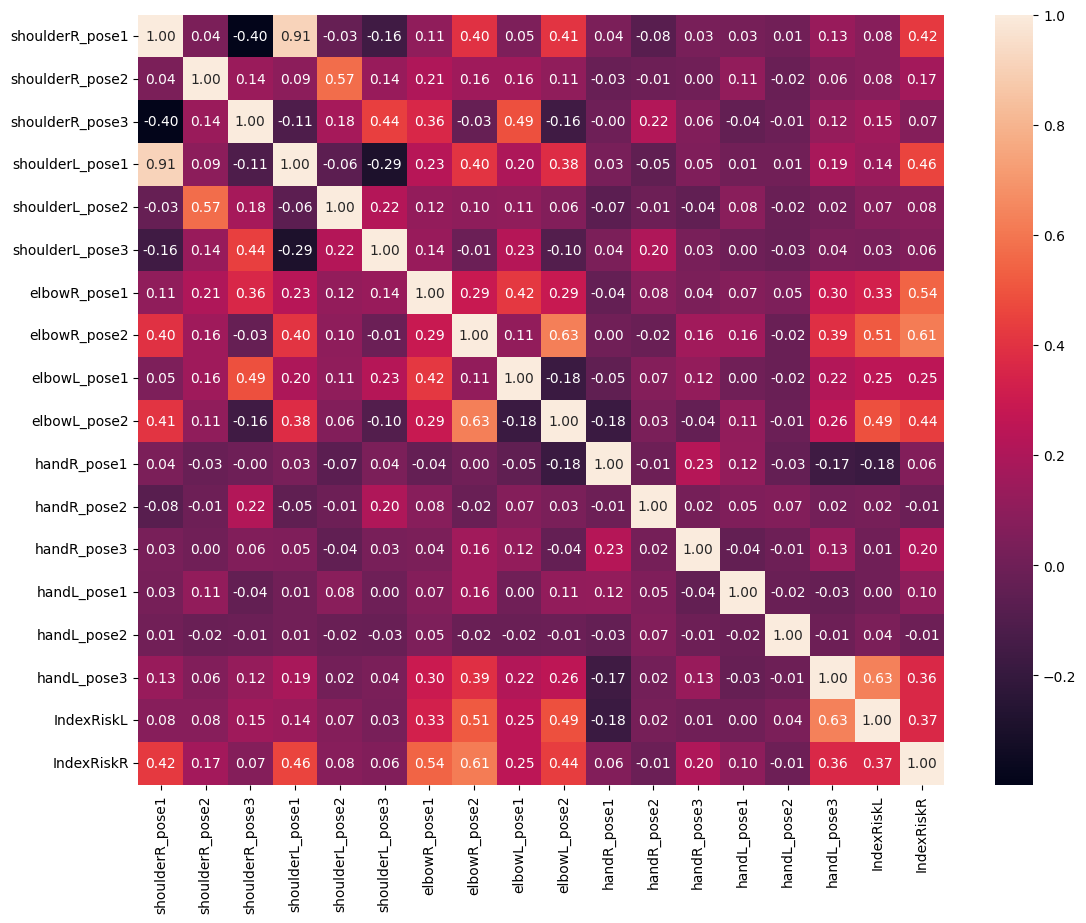

In [ ]:
poses = ['shoulderR_pose1','shoulderR_pose2','shoulderR_pose3',
         'shoulderL_pose1','shoulderL_pose2','shoulderL_pose3',
         'elbowR_pose1','elbowR_pose2',
         'elbowL_pose1','elbowL_pose2',
         'handR_pose1','handR_pose2','handR_pose3',
         'handL_pose1','handL_pose2','handL_pose3',
         'IndexRiskL','IndexRiskR'
         ]
pl.figure(figsize=(13,10))
sns.heatmap(ocra_df[poses].corr(), xticklabels=True, yticklabels=True, annot=True, fmt='.2f')

### Evaluation for Initial Shift
 (1: Initial, 0: Final)

<Axes: >

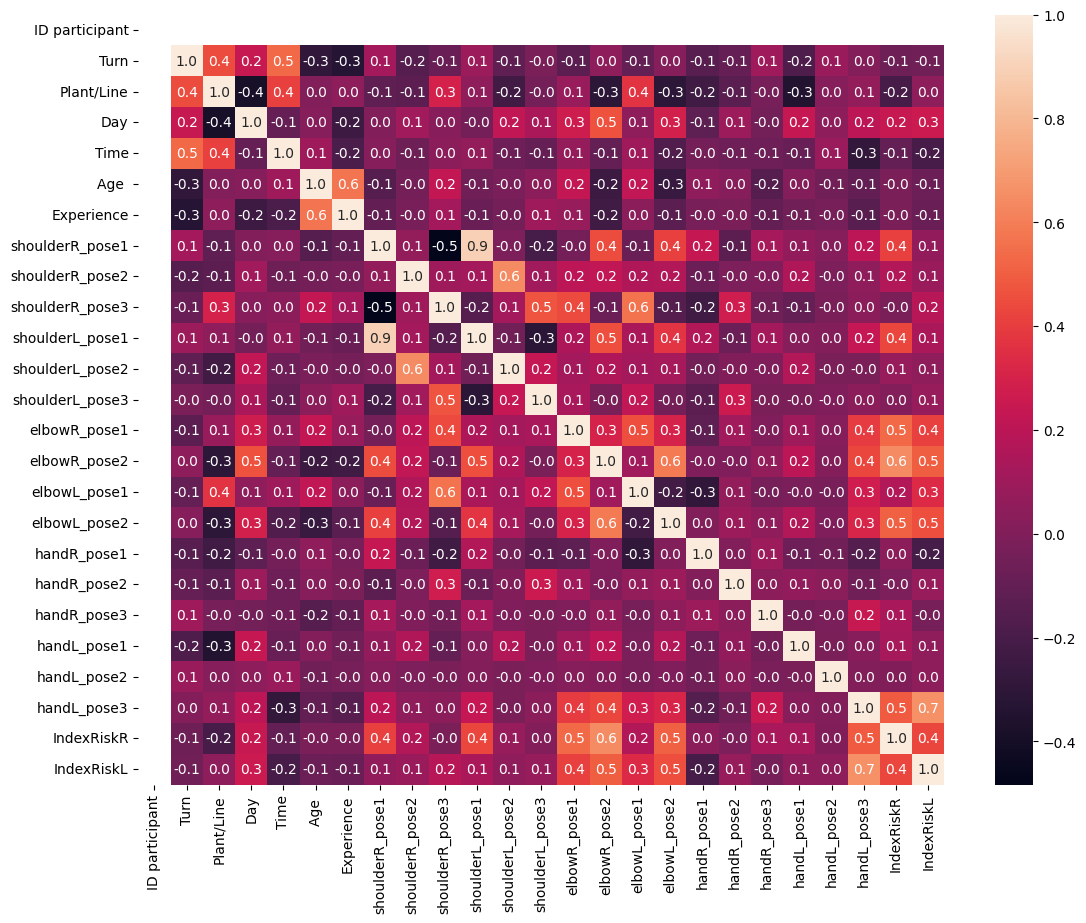

In [ ]:
fig = pl.figure(figsize=(13,10))
sns.heatmap(ocra_df[ocra_df['ID participant']==1].corr(), xticklabels=True, yticklabels=True, annot=True, fmt='.1f')

### Evaluation for Final Shift

<Axes: >

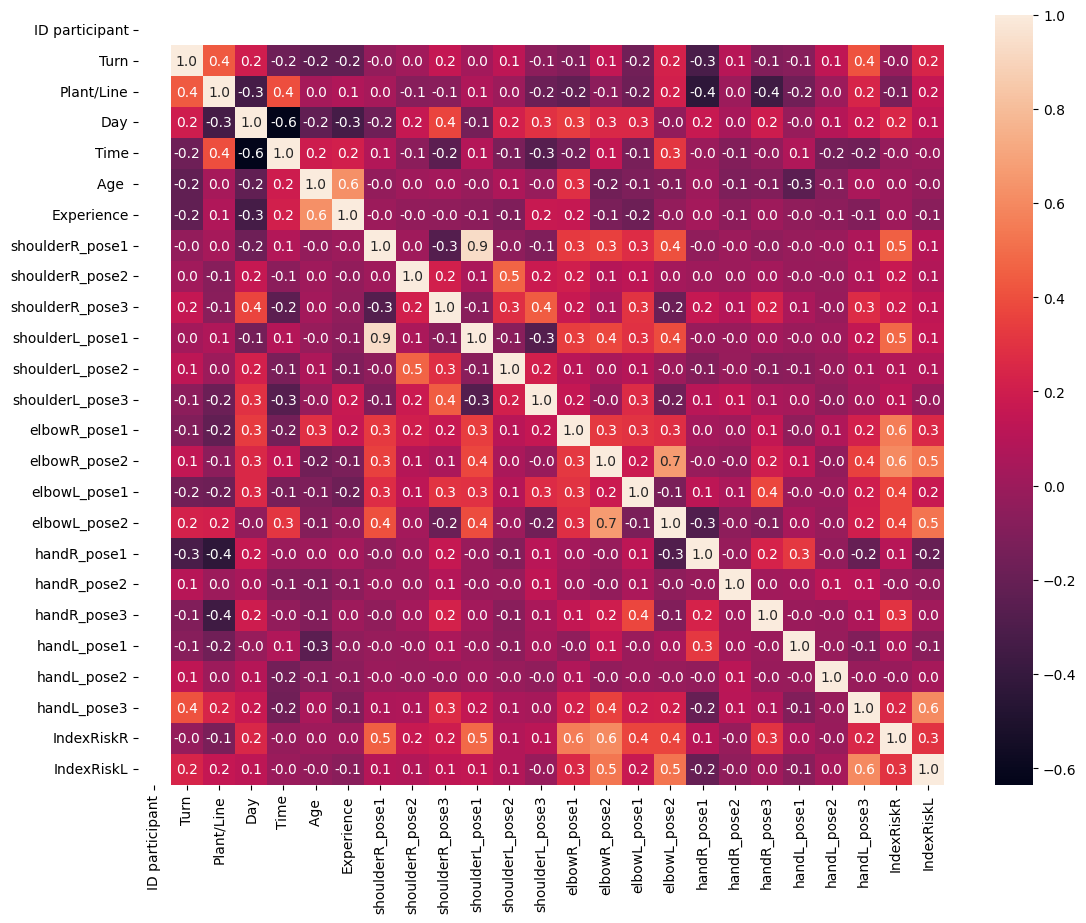

In [ ]:
fig = pl.figure(figsize=(13,10))
sns.heatmap(ocra_df[ocra_df['ID participant']==0].corr(), xticklabels=True, yticklabels=True, annot=True, fmt='.1f')

In [ ]:
def OCRA_risk_index(value):
    if value <= 7.5:
        return "Acceptable"
    elif (value >= 7.6) & (value < 11):
        return "Very light or uncertain"
    elif (value >= 11.1) & (value < 14):
        return "Unacceptable. Low-level risk"
    elif (value >= 14.1) & (value < 22.5):
        return "Unacceptable. Medium-level risk "
    elif (value >= 22.6):
        return "Unacceptable. High-level risk "


Text(0.5, 1.0, 'Index Risk Left')

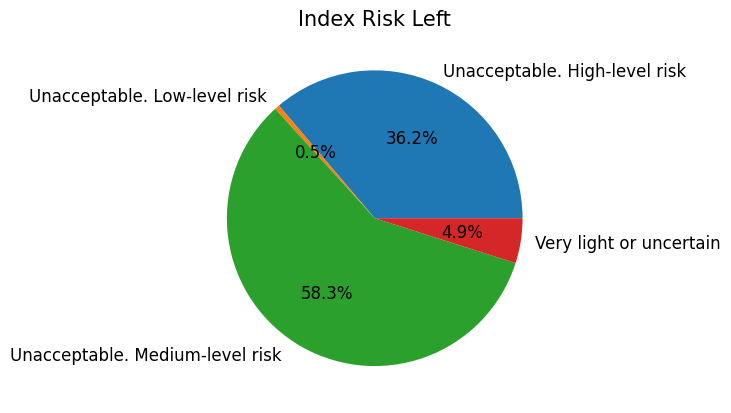

In [ ]:
index_risk_L_values = ocra_df['IndexRiskL'].apply(OCRA_risk_index)
values, counts = np.unique(index_risk_L_values, return_counts=True)
_ = pl.pie(counts, labels=values, autopct='%.1f%%', textprops={'fontsize': 12})
pl.title("Index Risk Left", fontsize=15)

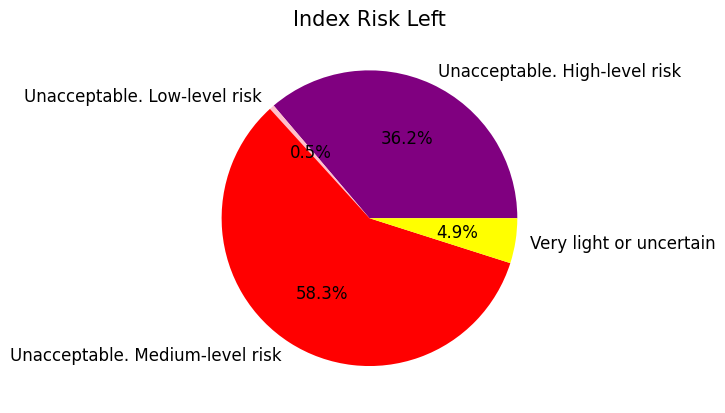

In [ ]:
import numpy as np
import matplotlib.pyplot as pl

# Define the function for OCRA risk index and color
def OCRA_risk_index(value):
    if value <= 7.5:
        return "Acceptable", "Green"
    elif (value >= 7.6) & (value < 11):
        return "Very light or uncertain", "Yellow"
    elif (value >= 11.1) & (value < 14):
        return "Unacceptable. Low-level risk", " Pink"
    elif (value >= 14.1) & (value < 22.5):
        return "Unacceptable. Medium-level risk", "Red"
    elif value >= 22.6:
        return "Unacceptable. High-level risk", "Purple"

# Apply the function to calculate the index risk and color
# Assuming 'ocra_df' is your DataFrame and 'IndexRiskL' is the column with values
index_risk_L_values, colors = zip(*ocra_df['IndexRiskL'].apply(OCRA_risk_index))

# Create a pie chart using the calculated values and corresponding colors
values, counts = np.unique(index_risk_L_values, return_counts=True)

# Since 'colors' is already a list, no need for dict conversion, just map it correctly.
color_map = {
    "Acceptable": "Green",
    "Very light or uncertain": "Yellow",
    "Unacceptable. Low-level risk": "Pink",
    "Unacceptable. Medium-level risk": "Red",
    "Unacceptable. High-level risk": "Purple"
}

_ = pl.pie(counts, labels=values, autopct='%.1f%%', colors=[color_map[v] for v in values], textprops={'fontsize': 12})
pl.title("Index Risk Left", fontsize=15)
pl.show()



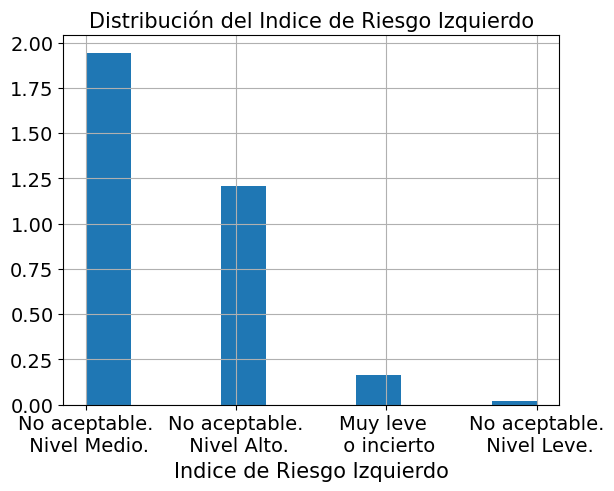

In [ ]:
pl.hist(index_risk_L_values, density=True)
pl.grid()
pl.xlabel('Indice de Riesgo Izquierdo', fontsize=15)
pl.title('Distribución del Indice de Riesgo Izquierdo', fontsize=15)
pl.yticks(fontsize=14)
pl.xticks(fontsize=14)
pl.show()

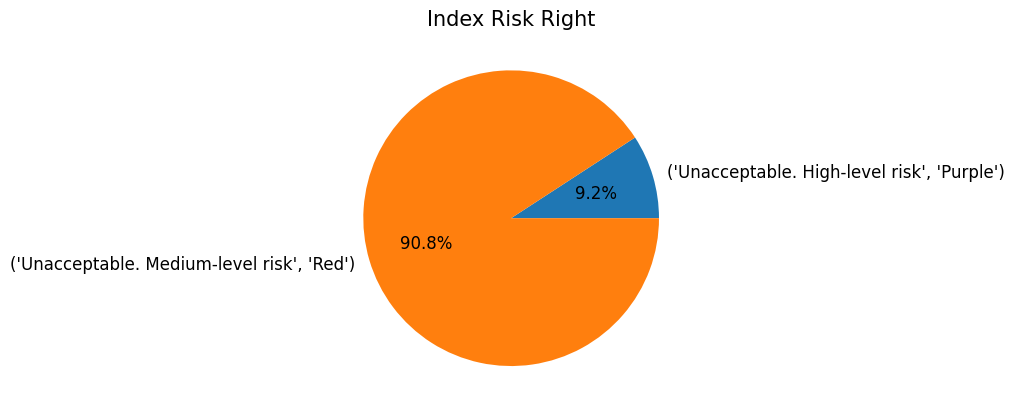

In [ ]:
index_risk_R_values = ocra_df['IndexRiskR'].apply(OCRA_risk_index)
values, counts = np.unique(index_risk_R_values, return_counts=True)
_ = pl.pie(counts, labels=values, autopct='%.1f%%', textprops={'fontsize': 12})
pl.title("Index Risk Right", fontsize=15)
pl.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as pl

# Define the function for OCRA risk index and color
def OCRA_risk_index(value):
    if value <= 7.5:
        return "Acceptable", "Green"
    elif (value >= 7.6) & (value < 11):
        return "Very light or uncertain", "Yellow"
    elif (value >= 11.1) & (value < 14):
        return "Unacceptable. Low-level risk", " Pink"
    elif (value >= 14.1) & (value < 22.5):
        return "Unacceptable. Medium-level risk", "Red"
    elif value >= 22.6:
        return "Unacceptable. High-level risk", "Purple"

# Apply the function to calculate the index risk and color
# Assuming 'ocra_df' is your DataFrame and 'IndexRiskL' is the column with values
index_risk_L_values, colors = zip(*ocra_df['IndexRiskR'].apply(OCRA_risk_index))

# Create a pie chart using the calculated values and corresponding colors
values, counts = np.unique(index_risk_L_values, return_counts=True)

# Since 'colors' is already a list, no need for dict conversion, just map it correctly.
color_map = {
    "Acceptable": "Green",
    "Very light or uncertain": "Yellow",
    "Unacceptable. Low-level risk": "Pink",
    "Unacceptable. Medium-level risk": "Red",
    "Unacceptable. High-level risk": "Purple"
}

_ = pl.pie(counts, labels=values, autopct='%.1f%%', colors=[color_map[v] for v in values], textprops={'fontsize': 12})
pl.title("Index Risk Risk", fontsize=15)
pl.show()
ex Risk Right", fontsize=15)
pl.show()


SyntaxError: unterminated string literal (detected at line 36) (<ipython-input-33-869800df42fd>, line 36)

ValueError: [<matplotlib.patches.Wedge object at 0x7b7bcde96b60>, <matplotlib.patches.Wedge object at 0x7b7bcde96560>] is not in list

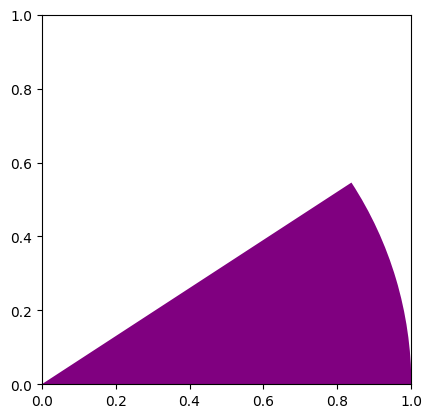

In [ ]:
import numpy as np
import matplotlib.pyplot as pl

# Function to return percentage with white font color when the sector is purple
def autopct_color_only(pct, sector_color):
    if sector_color == "Purple":
        return {'color': 'white', 'fontsize': 12}, f'{pct:.1f}%'
    else:
        return {'color': 'black', 'fontsize': 12}, f'{pct:.1f}%'

# Assuming 'ocra_df' and 'OCRA_risk_index' are already defined
index_risk_R_values, colors = zip(*ocra_df['IndexRiskR'].apply(OCRA_risk_index))

# Create a pie chart using the calculated values and corresponding colors
values, counts = np.unique(index_risk_R_values, return_counts=True)

# Color map for the sectors
color_map = {
    "Acceptable": "Green",
    "Very light or uncertain": "Yellow",
    "Unacceptable. Low-level risk": "Pink",
    "Unacceptable. Medium-level risk": "Red",
    "Unacceptable. High-level risk": "Purple"
}

# Assign the correct color for each value
assigned_colors = [color_map[v] for v in values]

# Create pie chart with autopct that checks the color and changes the font color accordingly
wedges, texts, autotexts = pl.pie(counts, autopct=lambda pct: autopct_color_only(pct, assigned_colors[wedges.index(wedges)]), colors=assigned_colors)

# Update the font properties for the text based on the sector color
for i, autotext in enumerate(autotexts):
    color_props, text_str = autopct_color_only(counts[i] / np.sum(counts) * 100, assigned_colors[i])
    autotext.set_text(text_str)
    autot


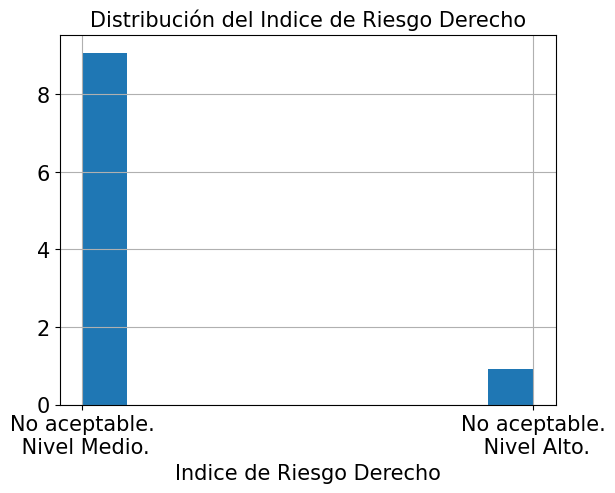

In [ ]:
pl.hist(index_risk_R_values, density=True)
pl.grid()
pl.xlabel('Indice de Riesgo Derecho', fontsize=15)
pl.title('Distribución del Indice de Riesgo Derecho', fontsize=15)
pl.yticks(fontsize=15)
pl.xticks(fontsize=15)
pl.show()

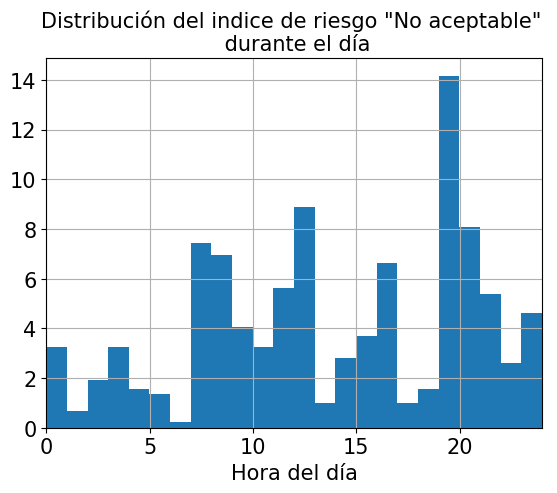

In [ ]:
counts, bins = np.histogram(ocra_df[(ocra_df['IndexRiskL']>11) & (ocra_df['IndexRiskR']>11) ]['Time'], bins=24, density=True)
pl.hist(bins[:-1], bins, weights=counts*100)
pl.grid()
pl.xlabel('Hora del día', fontsize=15)
pl.xlim(0,24)
pl.title('Distribución del indice de riesgo "No aceptable" \n durante el día', fontsize=15)
pl.yticks(fontsize=15)
pl.xticks(fontsize=15)
pl.show()

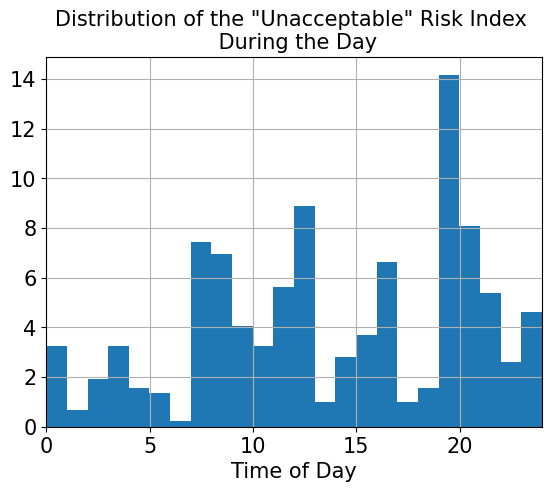

In [ ]:
# Calculate the histogram for data where the risk index for both left and right is greater than 11
counts, bins = np.histogram(ocra_df[(ocra_df['IndexRiskL'] > 11) & (ocra_df['IndexRiskR'] > 11)]['Time'], bins=24, density=True)

# Create a histogram plot with the calculated values and scale the counts by 100 to represent percentages
pl.hist(bins[:-1], bins, weights=counts * 100)

# Add grid lines to the plot
pl.grid()

# Label the x-axis as "Time of Day"
pl.xlabel('Time of Day', fontsize=15)

# Set the x-axis range from 0 to 24 hours
pl.xlim(0, 24)

# Add a title to the plot: "Distribution of the 'Unacceptable' Risk Index During the Day"
pl.title('Distribution of the "Unacceptable" Risk Index \n During the Day', fontsize=15)

# Set the font size of the y-axis and x-axis tick labels to 15
pl.yticks(fontsize=15)
pl.xticks(fontsize=15)

# Display the plot
pl.show()


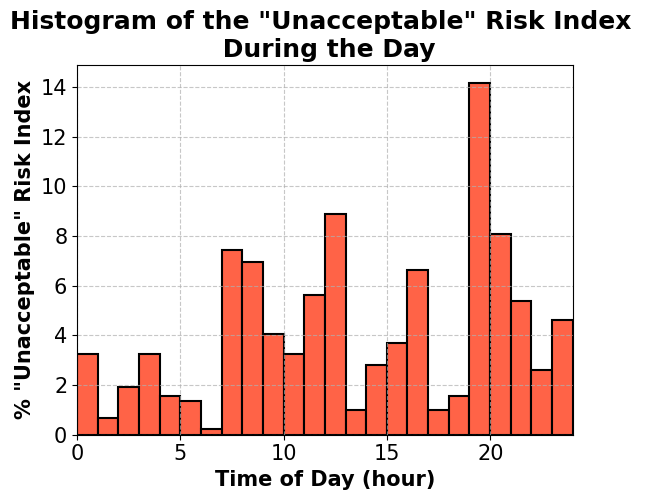

In [ ]:
import matplotlib.pyplot as pl
import numpy as np

# Sample data preparation (replace with actual data in your case)
counts, bins = np.histogram(ocra_df[(ocra_df['IndexRiskL'] > 11) & (ocra_df['IndexRiskR'] > 11)]['Time'], bins=24, density=True)

# Create a histogram plot with red color and improved visual style
pl.hist(bins[:-1], bins, weights=counts * 100, color='#FF6347', edgecolor='black', linewidth=1.5)  # Tomato red with black edges

# Add grid lines with a more subtle appearance
pl.grid(True, linestyle='--', alpha=0.7)

# Label the x-axis as "Time of Day"
pl.xlabel('Time of Day (hour)', fontsize=15, fontweight='bold')

# Set the x-axis range from 0 to 24 hours
pl.xlim(0, 24)
pl.ylabel('% "Unacceptable" Risk Index', fontsize=15, fontweight='bold')

# Add a title to the plot: "Distribution of the 'Unacceptable' Risk Index During the Day"
pl.title('Histogram of the "Unacceptable" Risk Index \n During the Day', fontsize=18, fontweight='bold')

# Set the font size of the y-axis and x-axis tick labels to 15
pl.yticks(fontsize=15)
pl.xticks(fontsize=15)

# Show the plot
pl.show()



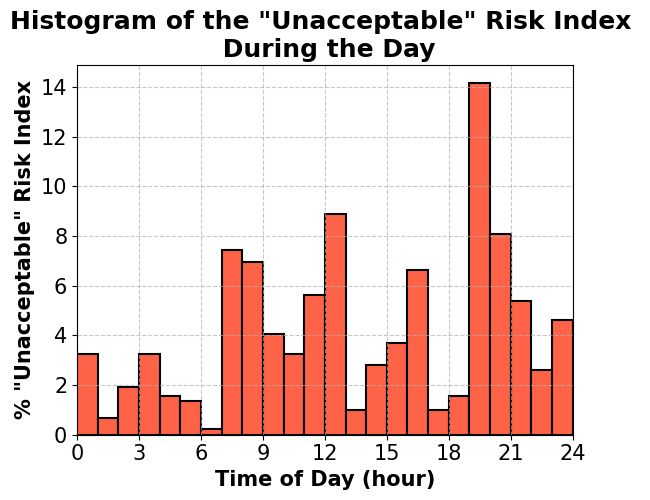

In [ ]:
import matplotlib.pyplot as pl
import numpy as np

# Sample data preparation (replace with actual data in your case)
counts, bins = np.histogram(ocra_df[(ocra_df['IndexRiskL'] > 11) & (ocra_df['IndexRiskR'] > 11)]['Time'], bins=24, density=True)

# Create a histogram plot with red color and improved visual style
pl.hist(bins[:-1], bins, weights=counts * 100, color='#FF6347', edgecolor='black', linewidth=1.5)  # Tomato red with black edges

# Add grid lines with a more subtle appearance
pl.grid(True, linestyle='--', alpha=0.7)

# Label the x-axis as "Time of Day"
pl.xlabel('Time of Day (hour)', fontsize=15, fontweight='bold')

# Set the x-axis range from 0 to 24 hours, including 24 as a limit
pl.xlim(0, 24)

# Label the y-axis as "% 'Unacceptable' Risk Index"
pl.ylabel('% "Unacceptable" Risk Index', fontsize=15, fontweight='bold')

# Add a title to the plot: "Distribution of the 'Unacceptable' Risk Index During the Day"
pl.title('Histogram of the "Unacceptable" Risk Index \n During the Day', fontsize=18, fontweight='bold')

# Set the font size of the y-axis and x-axis tick labels to 15
pl.yticks(fontsize=15)
pl.xticks(np.arange(0, 25, 3), fontsize=15)  # Ensure 24 is displayed by setting ticks from 0 to 24 with a step of 1

# Show the plot
pl.show()



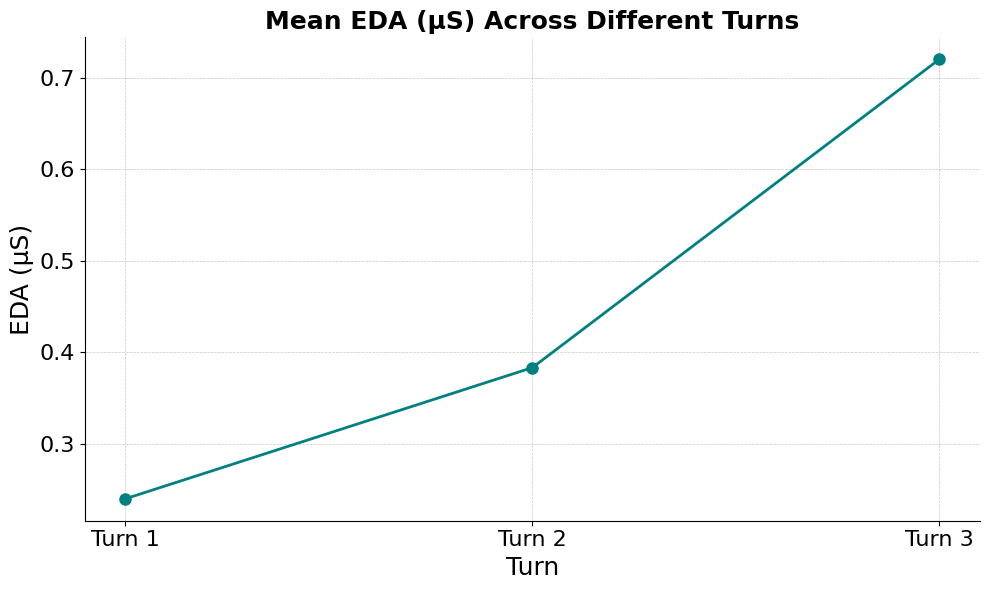

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided Excel file
file_path = 'SMARTWATCH + OCRA (FIXED).xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Assuming the columns are named 'Turn' and 'EDA'
# Extracting the relevant data for plotting
eda_avg = data.groupby('Turn')['eda_scl_usiemens'].mean()

# Plotting the graph with improved aesthetics
plt.figure(figsize=(10, 6))

# Adding custom markers, colors, and line styles for aesthetics
plt.plot(eda_avg.index, eda_avg.values, marker='o', linestyle='-', linewidth=2, color='teal', markersize=8)

# Customizing x-axis to show only the values 1, 2, 3
plt.xticks([1, 2, 3], labels=['Turn 1', 'Turn 2', 'Turn 3'], fontsize=16)
plt.yticks (fontsize = 16)

# Labeling axes and adding title with enhanced formatting
plt.xlabel('Turn', fontsize=18)
plt.ylabel('EDA (µS)', fontsize=18)
plt.title('Mean EDA (µS) Across Different Turns', fontsize=18, fontweight='bold')

# Adding a grid with customized style (µS)
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adding a border around the plot for better visuals
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the graph
plt.show()


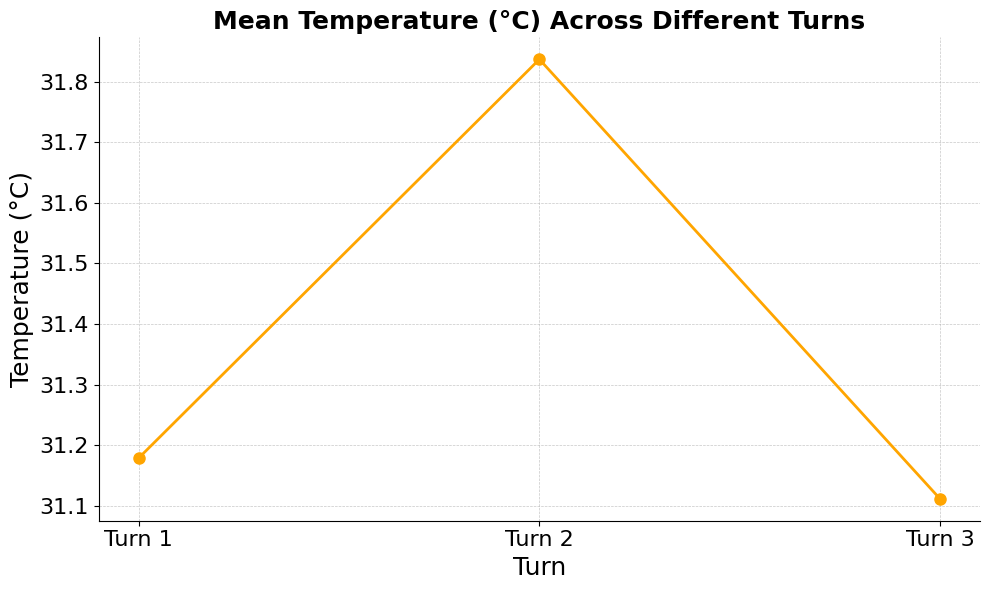

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided Excel file
file_path = 'Copy of SMARTWATCH + OCRA (FIXED) (1).xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Assuming the columns are named 'Turn' and 'temperature'
# Extracting the relevant data for plotting
temperature_avg = data.groupby('Turn')['temperature_celsius'].mean()  # Replace 'temperature_column_name' with the actual column name for temperature

# Plotting the graph with improved aesthetics
plt.figure(figsize=(10, 6))

# Adding custom markers, colors, and line styles for aesthetics
plt.plot(temperature_avg.index, temperature_avg.values, marker='o', linestyle='-', linewidth=2, color='orange', markersize=8)

# Customizing x-axis to show only the values 1, 2, 3
plt.xticks([1, 2, 3], labels=['Turn 1', 'Turn 2', 'Turn 3'], fontsize=16)
plt.yticks(fontsize=16)

# Labeling axes and adding title with enhanced formatting
plt.xlabel('Turn', fontsize=18)
plt.ylabel('Temperature (°C)', fontsize=18)
plt.title('Mean Temperature (°C) Across Different Turns', fontsize=18, fontweight='bold')

# Adding a grid with customized style
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adding a border around the plot for better visuals
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the graph
plt.show()



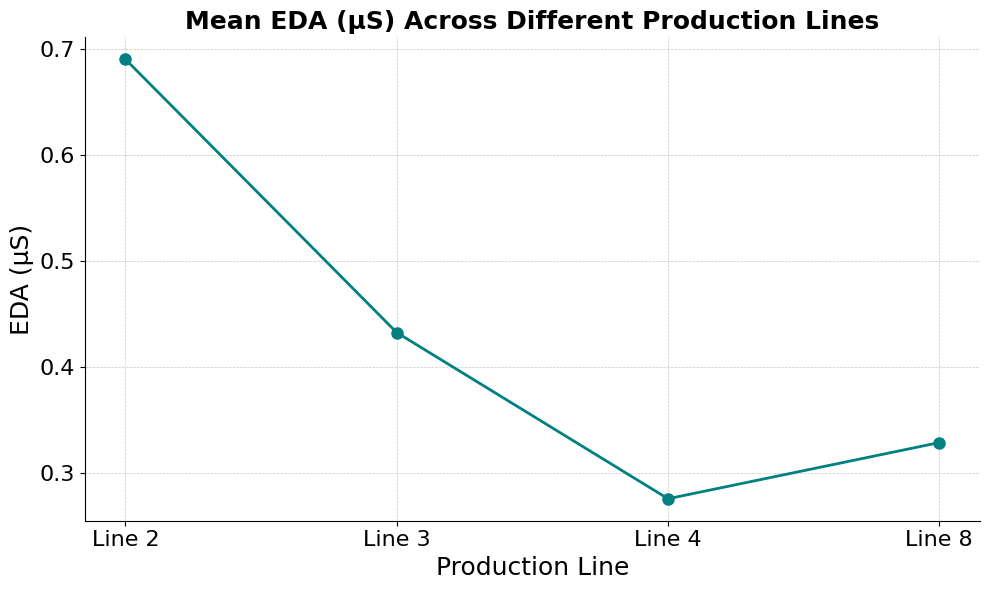

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided Excel file
file_path = 'SMARTWATCH + OCRA (FIXED).xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Replace LotNum values: 8 -> 'Tray 1', 88 -> 'Tray 2'
data['Plant/Line'] = data['Plant/Line'].replace({8: '5'})

# Extracting the relevant data for plotting (Group by Production Line and calculate mean EDA)
eda_avg = data.groupby('Plant/Line')['eda_scl_usiemens'].mean()

# Plotting the graph with improved aesthetics
plt.figure(figsize=(10, 6))

# Adding custom markers, colors, and line styles for better aesthetics
plt.plot(eda_avg.index, eda_avg.values, marker='o', linestyle='-', linewidth=2, color='teal', markersize=8)




# Customizing x-axis to show only the values 1, 2, 3
plt.xticks([2, 3, 4, 5], labels=['Line 2', 'Line 3', 'Line 4', 'Line 8'], fontsize=16)
plt.yticks(fontsize=16)
# Labeling axes and adding title with enhanced formatting
plt.xlabel('Production Line', fontsize=18)
plt.ylabel('EDA (µS)', fontsize=18)
plt.title('Mean EDA (µS) Across Different Production Lines', fontsize=18, fontweight='bold')

# Adding a grid with customized style
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adding a border around the plot for better visuals
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the graph
plt.show()


# Add grid lines with a more subtle appearance
pl.grid(True, linestyle='--', alpha=0.7)

# Label the x-axis as "Time of Day"
pl.xlabel('Time of Day (hour)', fontsize=15, fontweight='bold')

# Set the x-axis range from 0 to 24 hours, including 24 as a limit
pl.xlim(0, 24)

# Label the y-axis as "% 'Unacceptable' Risk Index"
pl.ylabel('% "Unacceptable" Risk Index', fontsize=15, fontweight='bold')

# Add a title to the plot: "Distribution of the 'Unacceptable' Risk Index During the Day"
pl.title('Histogram of the "Unacceptable" Risk Index \n During the Day', fontsize=18, fontweight='bold')

# Set the font size of the y-axis and x-axis tick labels to 15
pl.yticks(fontsize=15)
pl.xticks(np.arange(0, 25, 3), fontsize=15)  # Ensure 24 is displayed by setting ticks from 0 to 24 with a step of 1

# Show the plot
pl.show()

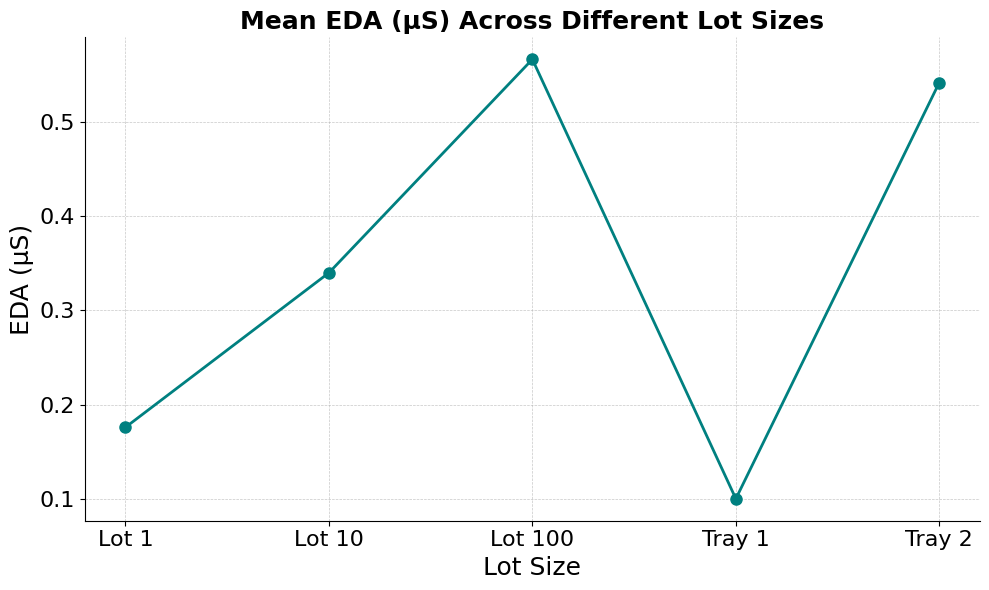

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided Excel file
file_path = 'SMARTWATCH + OCRA (FIXED) (7).xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')



# Assuming the columns are named 'LotNum' and 'EDA'
# Extracting the relevant data for plotting (Group by LotNum and calculate mean EDA)
eda_avg = data.groupby('LoTNum')['eda_scl_usiemens'].mean()



# Plotting the graph with improved aesthetics
plt.figure(figsize=(10, 6))

# Adding custom markers, colors, and line styles for better aesthetics
plt.plot(eda_avg.index, eda_avg.values, marker='o', linestyle='-', linewidth=2, color='teal', markersize=8)

# Customizing x-axis labels with only the specified lot numbers
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=['Lot 1', 'Lot 10', 'Lot 100', 'Tray 1', 'Tray 2'], fontsize=16)
plt.yticks(fontsize =16)
# Labeling axes and adding title with enhanced formatting
plt.xlabel('Lot Size', fontsize=18)
plt.ylabel('EDA (µS)', fontsize=18)
plt.title('Mean EDA (µS) Across Different Lot Sizes', fontsize=18, fontweight='bold')

# Adding a grid with customized style
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adding a border around the plot for better visuals
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the graph
plt.show()


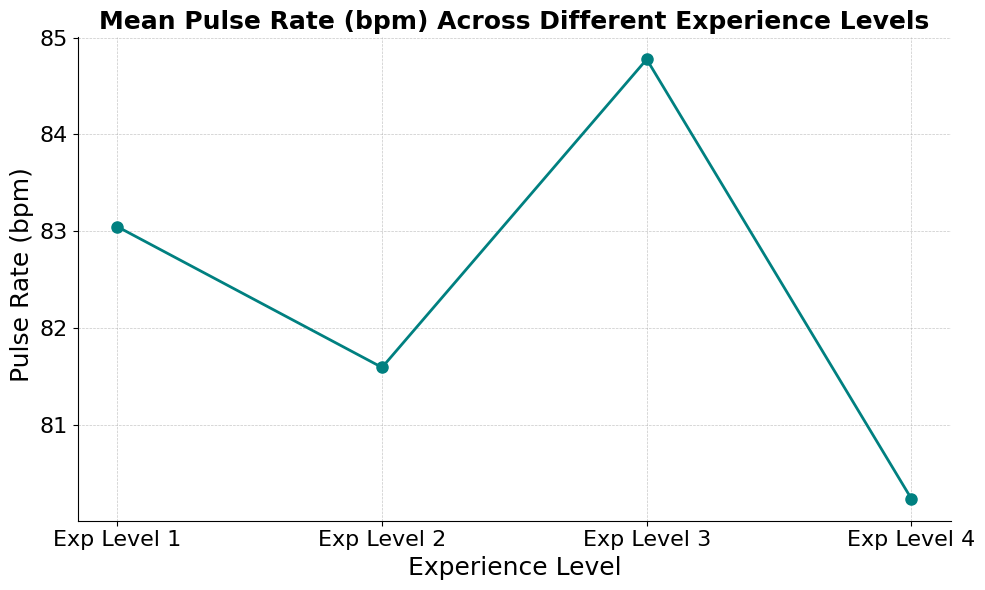

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided Excel file
file_path = 'SMARTWATCH + OCRA (FIXED).xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Replacing the values in the 'Experience' column based on specified conditions
data['Experience'] = data['Experience'].apply(lambda x: 4 if x > 6 else
                                              3 if 2 < x <= 6 else
                                              2 if 0.67 <= x <= 2 else
                                              1 if x < 0.67 else x)

# Assuming the columns are named 'Experience' and 'EDA'
# Extracting the relevant data for plotting (Group by Experience and calculate mean EDA)
eda_avg = data.groupby('Experience')['pulse_rate_bpm'].mean()

# Plotting the graph with improved aesthetics
plt.figure(figsize=(10, 6))

# Adding custom markers, colors, and line styles for better aesthetics
plt.plot(eda_avg.index, eda_avg.values, marker='o', linestyle='-', linewidth=2, color='teal', markersize=8)

# Customizing x-axis labels with only the specified experience levels
experience_labels = ['Exp Level 1', 'Exp Level 2', 'Exp Level 3', 'Exp Level 4']
plt.xticks(ticks=eda_avg.index, labels=experience_labels, fontsize=16)
plt.yticks(fontsize = 16)

# Labeling axes and adding title with enhanced formatting
plt.xlabel('Experience Level', fontsize=18)
plt.ylabel(' Pulse Rate (bpm)', fontsize=18)
plt.title('Mean Pulse Rate (bpm) Across Different Experience Levels', fontsize=18, fontweight='bold')

# Adding a grid with customized style
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adding a border around the plot for better visuals
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the graph
plt.show()



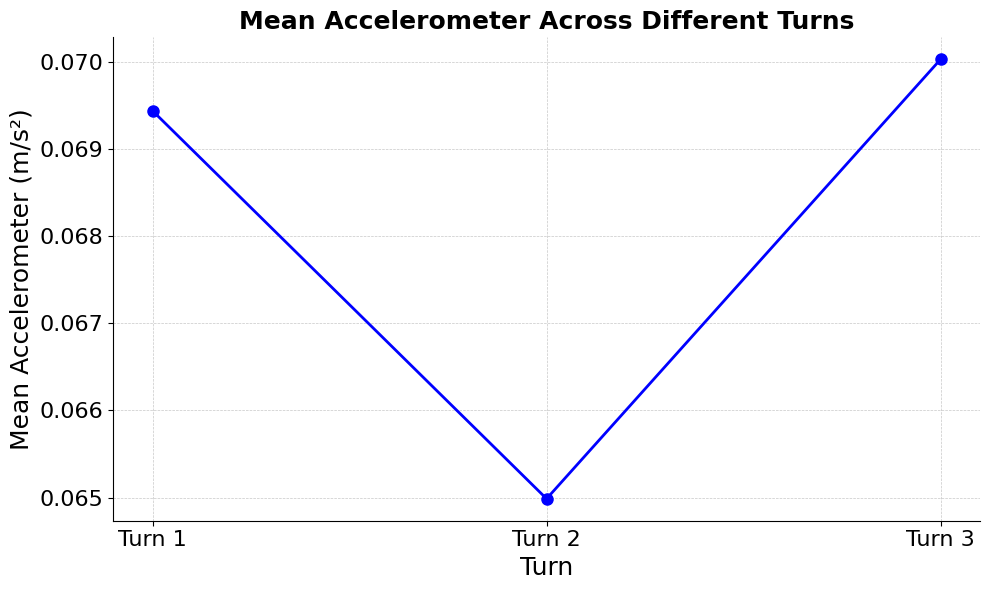

In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided Excel file
file_path = 'Copy of SMARTWATCH + OCRA (FIXED) (2).xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Assuming the columns are named 'Turn' and 'accelerometers_std_g'
# Extracting the relevant data for plotting
acceleration_avg = data.groupby('Turn')['accelerometers_std_g'].mean()  # Replace 'accelerometers_std_g' with the actual column name for accelerometer standard deviation

# Plotting the graph with improved aesthetics
plt.figure(figsize=(10, 6))

# Adding custom markers, colors, and line styles for aesthetics
plt.plot(acceleration_avg.index, acceleration_avg.values, marker='o', linestyle='-', linewidth=2, color='blue', markersize=8)

# Customizing x-axis to show only the values 1, 2, 3
plt.xticks([1, 2, 3], labels=['Turn 1', 'Turn 2', 'Turn 3'], fontsize=16)

# Customizing y-axis ticks
plt.yticks(fontsize=16)

# Labeling axes and adding title with enhanced formatting
plt.xlabel('Turn', fontsize=18)
plt.ylabel('Mean Accelerometer (m/s²)', fontsize=18)
plt.title('Mean Accelerometer Across Different Turns', fontsize=18, fontweight='bold')

# Adding a grid with customized style
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adding a border around the plot for better visuals
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the graph
plt.show()



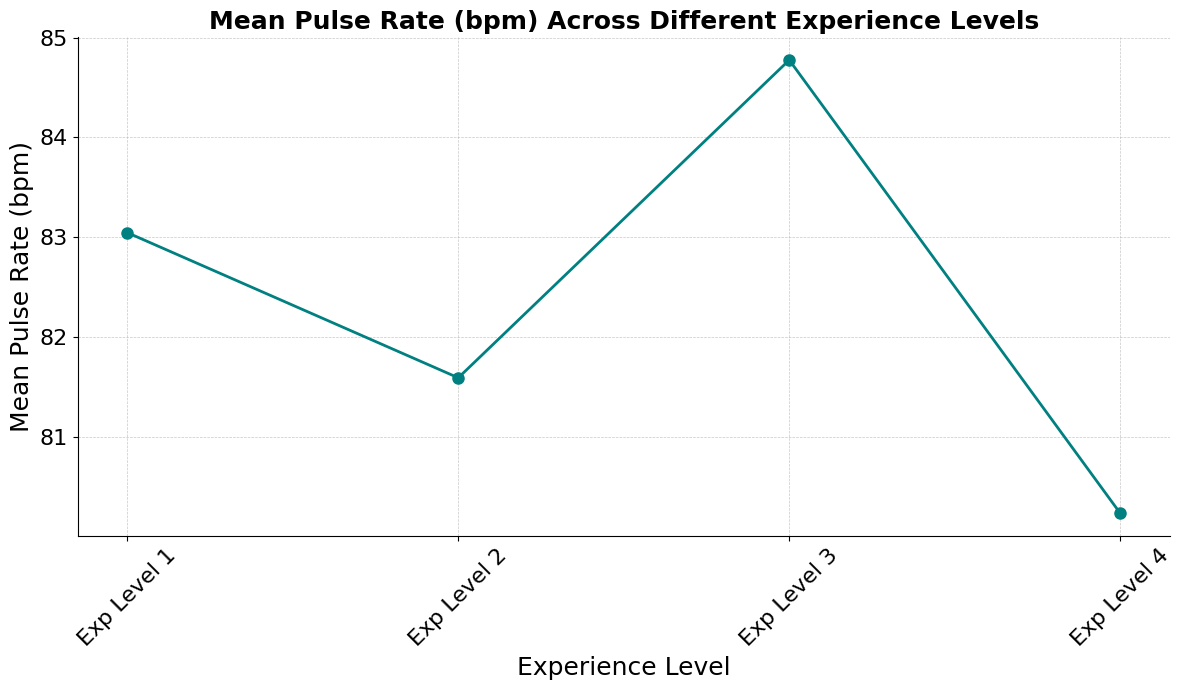

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided Excel file
file_path = 'SMARTWATCH + OCRA (FIXED).xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Replacing the values in the 'Experience' column based on specified conditions
data['Experience'] = data['Experience'].apply(lambda x: 4 if x > 6 else
                                              3 if 2 < x <= 6 else
                                              2 if 0.67 <= x <= 2 else
                                              1 if x < 0.67 else x)

# Extracting the relevant data for plotting (Group by Experience and calculate mean pulse rate)
eda_avg = data.groupby('Experience')['pulse_rate_bpm'].mean()

# Plotting the graph with improved aesthetics
plt.figure(figsize=(12, 7))

# Adding custom markers, colors, and line styles for better aesthetics
plt.plot(eda_avg.index, eda_avg.values, marker='o', linestyle='-', linewidth=2, color='teal', markersize=8)

# Customizing x-axis labels with only the specified experience levels
experience_labels = ['Exp Level 1', 'Exp Level 2', 'Exp Level 3', 'Exp Level 4']
plt.xticks(ticks=eda_avg.index, labels=experience_labels, rotation=45, fontsize=16)
plt.yticks(fontsize=16)

# Labeling axes and adding title with enhanced formatting
plt.xlabel('Experience Level', fontsize=18)
plt.ylabel('Mean Pulse Rate (bpm)', fontsize=18)
plt.title('Mean Pulse Rate (bpm) Across Different Experience Levels', fontsize=18, fontweight='bold')

# Adding a grid with customized style
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adding a border around the plot for better visuals
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the graph
plt.show()


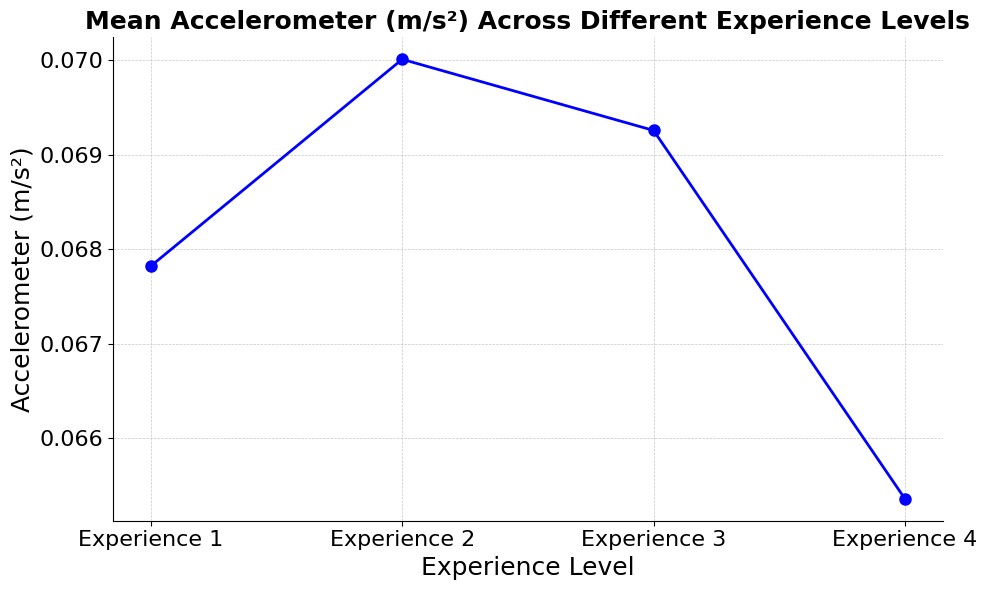

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided Excel file
file_path = 'Copy of SMARTWATCH + OCRA (FIXED) (2).xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Replacing the values in the 'Experience' column based on specified conditions
data['Experience'] = data['Experience'].apply(lambda x: 4 if x > 6 else
                                              3 if 2 < x <= 6 else
                                              2 if 0.67 <= x <= 2 else
                                              1 if x < 0.67 else x)

# Assuming the columns are named 'Experience' and 'accelerometers_std_g'
# Extracting the relevant data for plotting
acceleration_avg = data.groupby('Experience')['accelerometers_std_g'].mean()  # Replace 'accelerometers_std_g' with the actual column name for accelerometer standard deviation

# Plotting the graph with improved aesthetics
plt.figure(figsize=(10, 6))

# Adding custom markers, colors, and line styles for aesthetics
plt.plot(acceleration_avg.index, acceleration_avg.values, marker='o', linestyle='-', linewidth=2, color='blue', markersize=8)

# Customizing x-axis to show only the experience levels 1, 2, 3, 4
plt.xticks([1, 2, 3, 4], labels=['Experience 1', 'Experience 2', 'Experience 3', 'Experience 4'], fontsize=16)

# Customizing y-axis ticks
plt.yticks(fontsize=16)

# Labeling axes and adding title with enhanced formatting
plt.xlabel('Experience Level', fontsize=18)
plt.ylabel( 'Accelerometer (m/s²)', fontsize=18)
plt.title('Mean Accelerometer (m/s²) Across Different Experience Levels', fontsize=18, fontweight='bold')

# Adding a grid with customized style
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adding a border around the plot for better visuals
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the graph
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal
import scikit_posthocs as sp
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'Untitled spreadsheet - Sheet1.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Replacing the values in the 'Experience' column based on specified conditions
data['Experience'] = data['Experience'].apply(lambda x: 4 if x > 6 else
                                              3 if 2 < x <= 6 else
                                              2 if 0.67 <= x <= 2 else
                                              1 if x < 0.67 else x)

# Update the column names if they are different in your dataset
eda_column = 'eda_scl_usiemens'  # Replace with the actual column name for EDA
pulse_column = 'pulse_rate_bpm'  # Replace with the actual column name for Pulse Rate

# Analyzing EDA and Pulse Rate separately
for variable, label in [(eda_column, 'EDA (µS)'), (pulse_column, 'Pulse Rate (bpm)')]:
    # Grouping the data by Experience levels
    groups = data.groupby('Experience')[variable].apply(list)

    # Running Kruskal-Wallis Test
    kruskal_result = kruskal(*groups)
    print(f"Kruskal-Wallis Test for {label}")
    print(f"H-statistic: {kruskal_result.statistic}, p-value: {kruskal_result.pvalue}\n")

    # Conduct pairwise comparisons if Kruskal-Wallis indicates significant differences
    if kruskal_result.pvalue < 0.05:
        dunn_result = sp.posthoc_dunn(groups, p_adjust='bonferroni')
        print(f"Dunn's Test Pairwise Comparisons for {label}:")
        print(dunn_result)

        # Visualizing the pairwise comparison results
        plt.figure(figsize=(8, 5))
        sp.sign_plot(dunn_result, group_labels=['Experience 1', 'Experience 2', 'Experience 3', 'Experience 4'])
        plt.title(f"Dunn's Test Pairwise Comparisons for {label}")
        plt.xlabel('Experience Level')
        plt.ylabel('Adjusted p-value')
        plt.show()
    else:
        print(f"No significant differences found among experience groups for {label}.\n")


Kruskal-Wallis Test for EDA (µS)
H-statistic: nan, p-value: nan

No significant differences found among experience groups for EDA (µS).

Kruskal-Wallis Test for Pulse Rate (bpm)
H-statistic: nan, p-value: nan

No significant differences found among experience groups for Pulse Rate (bpm).



In [ ]:
pip install pandas scipy scikit-posthocs


In [ ]:
import pandas as pd
import scipy.stats as stats
import scikit_posthocs as sp

# Manually defining the data based on the image provided
data_dict = {
    'ExperienceScale': ['High'] * 371 + ['Low'] * 566 + ['Medium'] * 721 + ['V high'] * 394,
    'eda_scl_usiemens': [0.5876] * 371 + [0.74558] * 566 + [0.23741] * 721 + [1.3161] * 394,
    'pulse_rate_bpm': [84.78] * 369 + [83.05] * 549 + [81.59] * 715 + [80.24] * 389
}
data = pd.DataFrame(data_dict)

# Grouping the data by ExperienceScale for the tests
eda_data = [group['eda_scl_usiemens'].values for name, group in data.groupby('ExperienceScale')]
pulse_data = [group['pulse_rate_bpm'].values for name, group in data.groupby('ExperienceScale')]

# Performing Kruskal-Wallis H Test for EDA
kruskal_eda = stats.kruskal(*eda_data)
print("Kruskal-Wallis Test for EDA")
print(f"H-statistic: {kruskal_eda.statistic}, p-value: {kruskal_eda.pvalue}\n")

# Performing Kruskal-Wallis H Test for Pulse Rate
kruskal_pulse = stats.kruskal(*pulse_data)
print("Kruskal-Wallis Test for Pulse Rate")
print(f"H-statistic: {kruskal_pulse.statistic}, p-value: {kruskal_pulse.pvalue}\n")

# Perform Dunn's post-hoc test if Kruskal-Wallis p-value is significant
if kruskal_eda.pvalue < 0.05:
    dunn_eda = sp.posthoc_dunn(data, val_col='eda_scl_usiemens', group_col='ExperienceScale', p_adjust='bonferroni')
    print("Dunn's Test for EDA")
    print(dunn_eda)

if kruskal_pulse.pvalue < 0.05:
    dunn_pulse = sp.posthoc_dunn(data, val_col='pulse_rate_bpm', group_col='ExperienceScale', p_adjust='bonferroni')
    print("Dunn's Test for Pulse Rate")
    print(dunn_pulse)


ValueError: All arrays must be of the same length

In [ ]:
import pandas as pd
import scipy.stats as stats
import scikit_posthocs as sp

# Manually defining the data based on the image provided
# Ensuring all lists have the same length
data_dict = {
    'ExperienceScale': ['High'] * 371 + ['Low'] * 566 + ['Medium'] * 721 + ['V high'] * 394,
    'eda_scl_usiemens': [0.5876] * 371 + [0.74558] * 566 + [0.23741] * 721 + [1.3161] * 394,
    'pulse_rate_bpm': [84.78] * 371 + [83.05] * 566 + [81.59] * 721 + [80.24] * 394 # Corrected the length here to match other columns
}
data = pd.DataFrame(data_dict)

# Grouping the data by ExperienceScale for the tests
eda_data = [group['eda_scl_usiemens'].values for name, group in data.groupby('ExperienceScale')]
pulse_data = [group['pulse_rate_bpm'].values for name, group in data.groupby('ExperienceScale')]

# Performing Kruskal-Wallis H Test for EDA
kruskal_eda = stats.kruskal(*eda_data)
print("Kruskal-Wallis Test for EDA")
print(f"H-statistic: {kruskal_eda.statistic}, p-value: {kruskal_eda.pvalue}\n")

# Performing Kruskal-Wallis H Test for Pulse Rate
kruskal_pulse = stats.kruskal(*pulse_data)
print("Kruskal-Wallis Test for Pulse Rate")
print(f"H-statistic: {kruskal_pulse.statistic}, p-value: {kruskal_pulse.pvalue}\n")

# Perform Dunn's post-hoc test if Kruskal-Wallis p-value is significant
if kruskal_eda.pvalue < 0.05:
    dunn_eda = sp.posthoc_dunn(data, val_col='eda_scl_usiemens', group_col='ExperienceScale', p_adjust='bonferroni')
    print("Dunn's Test for EDA")
    print(dunn_eda)

if kruskal_pulse.pvalue < 0.05:
    dunn_pulse = sp.posthoc_dunn(data, val_col='pulse_rate_bpm', group_col='ExperienceScale', p_adjust='bonferroni')
    print("Dunn's Test for Pulse Rate")
    print(dunn_pulse)

Kruskal-Wallis Test for EDA
H-statistic: 2051.0000000000005, p-value: 0.0

Kruskal-Wallis Test for Pulse Rate
H-statistic: 2051.0000000000005, p-value: 0.0

Dunn's Test for EDA
                 High            Low         Medium         V high
High     1.000000e+00   4.075172e-34   3.513509e-50  1.183754e-116
Low      4.075172e-34   1.000000e+00  2.491782e-220   4.875840e-37
Medium   3.513509e-50  2.491782e-220   1.000000e+00   0.000000e+00
V high  1.183754e-116   4.875840e-37   0.000000e+00   1.000000e+00
Dunn's Test for Pulse Rate
                 High            Low         Medium         V high
High     1.000000e+00   4.075172e-34  1.354557e-204   0.000000e+00
Low      4.075172e-34   1.000000e+00   2.241748e-89  3.514835e-226
Medium  1.354557e-204   2.241748e-89   1.000000e+00   2.501788e-54
V high   0.000000e+00  3.514835e-226   2.501788e-54   1.000000e+00


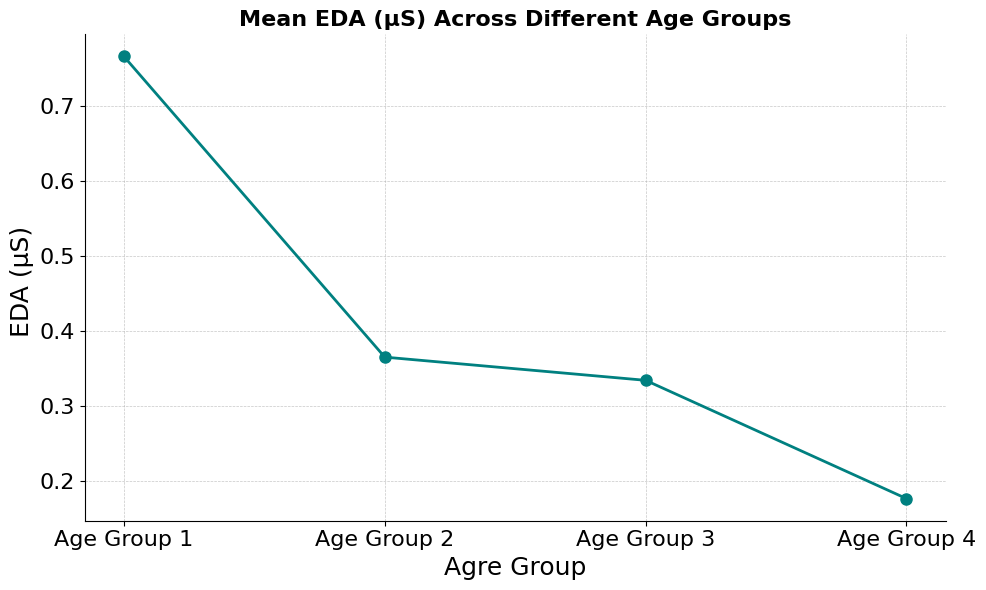

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided Excel file
file_path = 'SMARTWATCH + OCRA (FIXED).xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Replacing the values in the 'Experience' column based on specified conditions
data['Age '] = data['Age '].apply(lambda x: 4 if x > 37 else
                                              3 if 32 < x <= 37 else
                                              2 if 27 <= x <= 32 else
                                              1 if x < 27 else x)

# Assuming the columns are named 'Experience' and 'EDA'
# Extracting the relevant data for plotting (Group by Experience and calculate mean EDA)
eda_avg = data.groupby('Age ')['eda_scl_usiemens'].mean()

# Plotting the graph with improved aesthetics
plt.figure(figsize=(10, 6))

# Adding custom markers, colors, and line styles for better aesthetics
plt.plot(eda_avg.index, eda_avg.values, marker='o', linestyle='-', linewidth=2, color='teal', markersize=8)

# Customizing x-axis labels with only the specified experience levels
experience_labels = ['Age Group 1', 'Age Group 2', 'Age Group 3', 'Age Group 4']
plt.xticks(ticks=eda_avg.index, labels=experience_labels, fontsize=16)
plt.yticks(fontsize=16)

# Labeling axes and adding title with enhanced formatting
plt.xlabel('Agre Group', fontsize=18)
plt.ylabel('EDA (µS) ', fontsize=18)
plt.title('Mean EDA (µS) Across Different Age Groups', fontsize=16, fontweight='bold')

# Adding a grid with customized style
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adding a border around the plot for better visuals
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the graph
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Provided data
data = {
    'Turn': [3] * 91 + [2] * 52 + [1] * 60,  # Turns are grouped
    'Visual Fatigue Scale': [
        9, 6, 7, 10, 7, 7, 3, 9, 6, 5, 5, 9, 8, 6, 7, 8, 3, 6, 9, 9, 6, 8, 10, 6, 3, 4, 6, 6, 6, 7, 6, 5, 8, 9, 4, 4,
        10, 3, 10, 7, 12, 4, 3, 7, 7, 7, 7, 9, 11, 10, 3, 11, 11, 11, 6, 3, 3, 12, 13, 10, 4, 6, 12, 11, 7, 10, 12, 11,
        5, 9, 9, 9, 13, 11, 14, 12, 5, 3, 7, 5, 10, 7, 11, 10, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3
    ]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Calculating the mean visual fatigue scale for each turn
mean_fatigue = df.groupby('Turn')['Visual Fatigue Scale'].mean()

# Plotting the data
pl


ValueError: All arrays must be of the same length

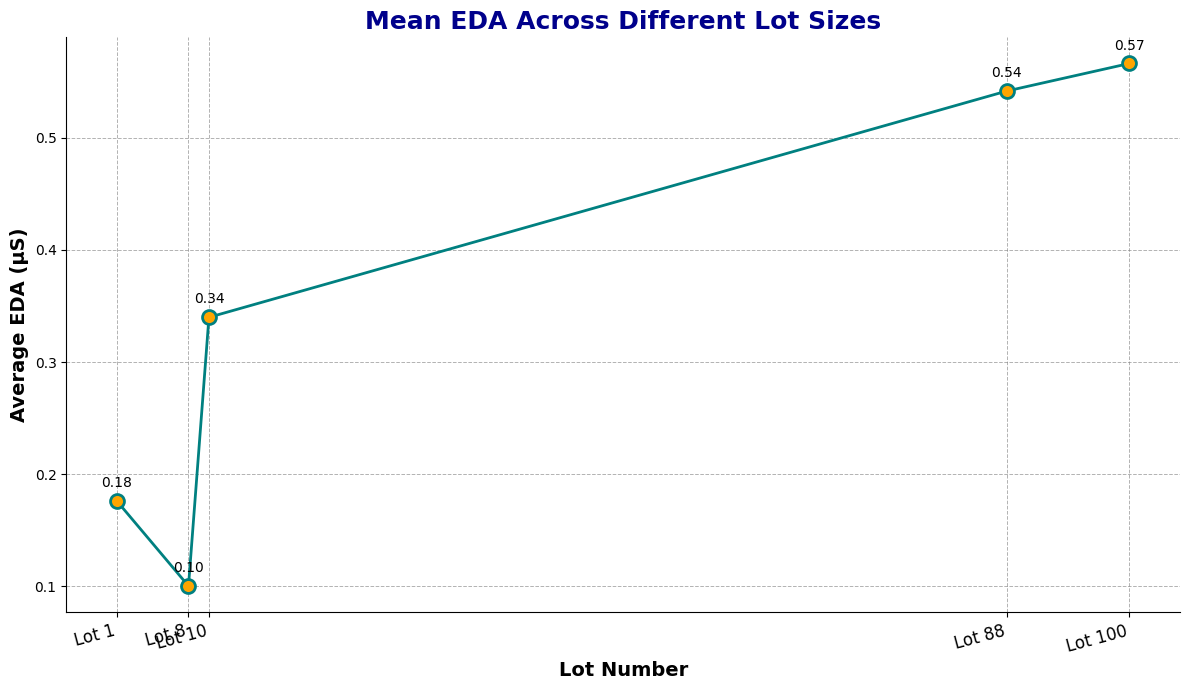

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided Excel file
file_path = 'SMARTWATCH + OCRA (FIXED).xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Assuming the columns are named 'LotNum' and 'EDA'
# Extracting the relevant data for plotting
eda_avg = data.groupby('LoTNum')['eda_scl_usiemens'].mean()

# Plotting the graph with improved aesthetics
plt.figure(figsize=(12, 7))

# Adding custom markers, colors, and line styles for better aesthetics
plt.plot(eda_avg.index, eda_avg.values, marker='o', linestyle='-', linewidth=2,
         color='teal', markersize=10, markerfacecolor='orange', markeredgewidth=2)

# Customizing x-axis labels to display only the specified lot numbers in the order provided
lot_order = [1, 10, 100, 8, 88]
plt.xticks(ticks=lot_order, labels=[f'Lot {i}' for i in lot_order], fontsize=12, rotation=15, ha='right')

# Labeling axes and adding title with enhanced formatting
plt.xlabel('Lot Number', fontsize=14, fontweight='bold')
plt.ylabel('Average EDA (µS)', fontsize=14, fontweight='bold')
plt.title('Mean EDA Across Different Lot Sizes', fontsize=18, fontweight='bold', color='darkblue')

# Adding a grid with customized style
plt.grid(visible=True, linestyle='--', linewidth=0.7, alpha=0.6, color='grey')

# Adding annotations to emphasize key points in the graph
for i, value in enumerate(eda_avg.values):
    plt.annotate(f'{value:.2f}', (eda_avg.index[i], value), textcoords="offset points",
                 xytext=(0, 10), ha='center', fontsize=10, color='black')

# Adding a border around the plot for better visuals
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the graph
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating DataFrame from provided data
data = {
    'Turn': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
    'Visual Fatigue Scale': [
        3, 9, 3, 6, 7, 10, 7, 7, 3, 9, 6, 5, 5, 9, 8, 6, 7, 8, 3, 6, 9, 9, 6, 8, 10, 6, 3, 4, 6, 6, 6, 7, 6, 5, 8, 9, 4, 4, 10, 3, 10, 7, 12, 4, 3, 7, 7, 7, 7, 9, 11, 10, 3, 11, 11, 11, 6, 3, 3, 12, 13, 10, 4, 6, 12, 11, 7, 10, 12, 11, 5, 9, 9, 9, 13, 11, 14, 12, 5, 3, 7, 5, 10, 7, 11, 10
    ]
}

df = pd.DataFrame(data)

# Calculating the mean visual fatigue scale for each turn
mean_fatigue = df.groupby('Turn')['Visual Fatigue Scale'].mean()

# Plotting the data with increased font sizes
plt.figure(figsize=(10, 6))
plt.plot(mean_fatigue.index, mean_fatigue.values, marker='o', linestyle='-', linewidth=2, color='teal', markersize=8)

# Customizing the x-axis and y-axis with increased font size
plt.xticks(mean_fatigue.index, labels=[f'Turn {int(turn)}' for turn in mean_fatigue.index], fontsize=16)
plt.yticks(fontsize=16)

# Labeling axes and adding title with enhanced formatting
plt.xlabel('Turn', fontsize=18)
plt.ylabel('Mean Visual Fatigue Scale', fontsize=18)
plt.title('Mean Visual Fatigue Scale Across Different Turns', fontsize=18, fontweight='bold')

# Adding a grid with customized style
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adding a border around the plot for better visuals
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the graph
plt.show()


ValueError: All arrays must be of the same length

In [ ]:
# Trimming the lists to ensure consistent lengths
turn = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
visual_fatigue_scale = [3, 9, 3, 6, 7, 10, 7, 7, 3, 9, 6, 5, 5, 9, 8, 6, 7, 8, 3, 6, 9, 9, 6, 8, 10, 6, 3, 4, 6, 6, 6, 7, 6, 5, 8, 9, 4, 4, 10, 3, 10, 7, 12, 4, 3, 7, 7, 7, 7, 9, 11, 10, 3, 11, 11, 11, 6, 3, 3, 12, 13, 10, 4, 6, 12, 11, 7, 10, 12, 11, 5]

# Creating a DataFrame with consistent length
import pandas as pd

data = pd.DataFrame({
    'Turn': turn,
    'Visual Fatigue Scale': visual_fatigue_scale
})

# Display the first few rows of the trimmed DataFrame to ensure consistency
data.head()


ValueError: All arrays must be of the same length

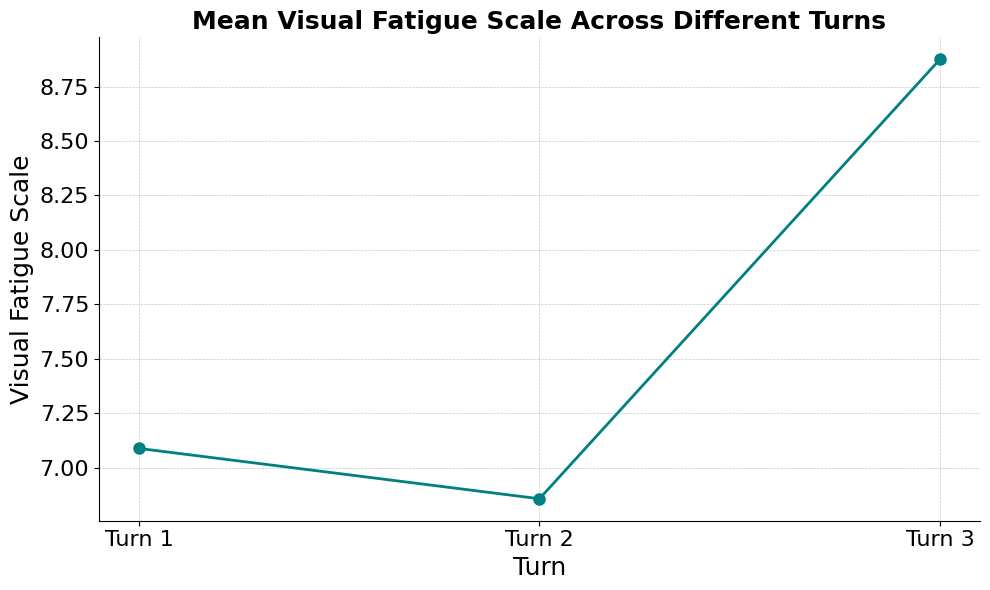

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from CSV
file_path = 'visual fatigue scale test(Sheet1).csv'  # Replace with your CSV file name
data = pd.read_csv(file_path)

# Calculate the mean value of the Visual Fatigue Scale for each Turn
mean_vf_scale = data.groupby('Turn')['Visual Fatigue Scale'].mean()

# Plotting the mean Visual Fatigue Scale across Turns
plt.figure(figsize=(10, 6))

plt.plot(mean_vf_scale.index, mean_vf_scale.values, marker='o', linestyle='-', linewidth=2, color='teal', markersize=8)

# Setting up labels and title with increased font sizes
plt.xticks(fontsize=16)
plt.xticks([1, 2, 3], labels=['Turn 1', 'Turn 2', 'Turn 3'], fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Turn', fontsize=18)
plt.ylabel('Visual Fatigue Scale', fontsize=18)
plt.title('Mean Visual Fatigue Scale Across Different Turns', fontsize=18, fontweight='bold')

# Adding grid for better readability
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adding border customization for better visuals
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()



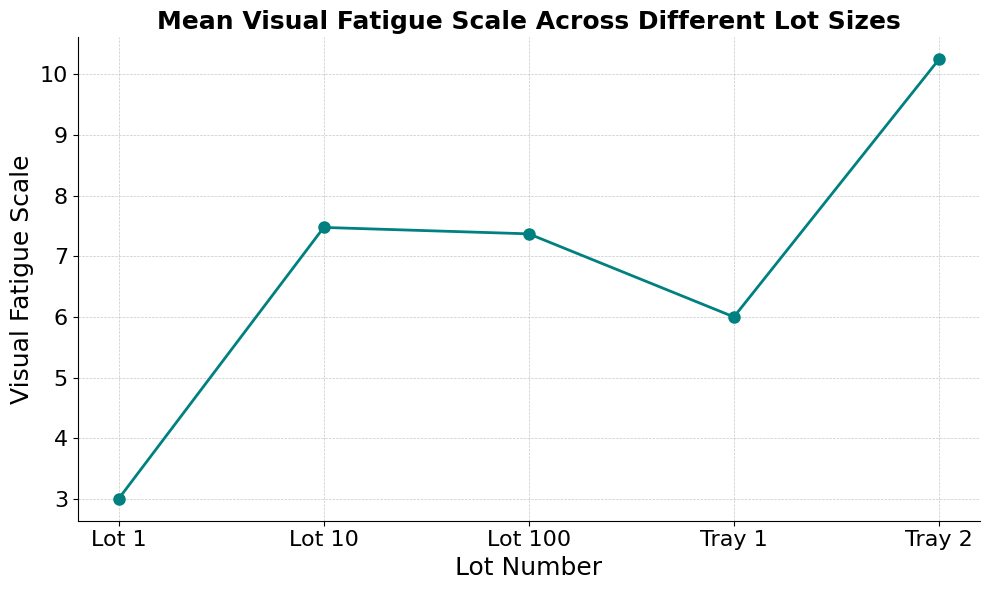

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from CSV
file_path = 'visual fatigue scale test(Sheet1)(in).csv'  # Replace with your CSV file name
data = pd.read_csv(file_path)



# Assuming the columns are named 'Experience' and 'EDA'
# Extracting the relevant data for plotting (Group by Experience and calculate mean EDA)
eda_avg = data.groupby('LotNum')['Visual Fatigue Scale'].mean()
# Plotting the graph with improved aesthetics
plt.figure(figsize=(10, 6))

# Adding custom markers, colors, and line styles for aesthetics
plt.plot(eda_avg.index, eda_avg.values, marker='o', linestyle='-', linewidth=2, color='teal', markersize=8)

# Customizing x-axis labels with only the specified lot numbers
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=['Lot 1', 'Lot 10', 'Lot 100', 'Tray 1', 'Tray 2'], fontsize=16)

# Labeling axes and adding title with enhanced formatting
plt.xlabel('Lot Number', fontsize=18)
plt.ylabel( 'Visual Fatigue Scale', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Mean Visual Fatigue Scale Across Different Lot Sizes', fontsize=18, fontweight='bold')

# Adding a grid with customized style
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adding a border around the plot for better visuals
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the graph
plt.show()

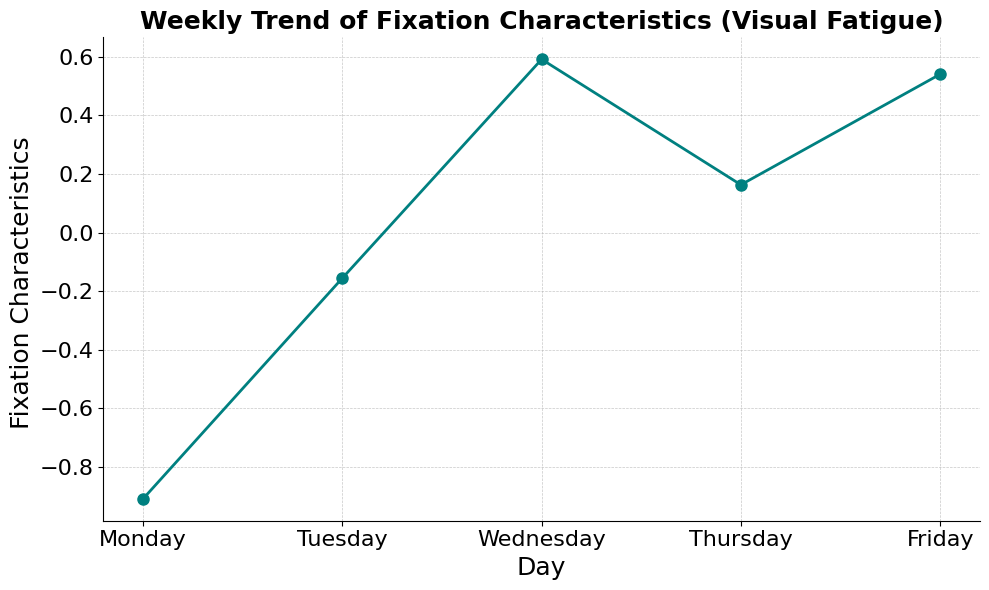

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided Excel file
file_path = 'all data eye last version (3).xlsx'
data = pd.read_excel(file_path)



# Assuming the columns are named 'Experience' and 'EDA'
# Extracting the relevant data for plotting (Group by Experience and calculate mean EDA)
data['FAC2_1'] = pd.to_numeric(data['FAC2_1'], errors='coerce')
eda_avg = data.groupby('DayNum')['FAC2_1'].mean()
# Plotting the graph with improved aesthetics
plt.figure(figsize=(10, 6))

# Adding custom markers, colors, and line styles for aesthetics
plt.plot(eda_avg.index, eda_avg.values, marker='o', linestyle='-', linewidth=2, color='teal', markersize=8)

# Customizing x-axis labels with only the specified lot numbers
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], fontsize=16)
plt.yticks (fontsize=16)
# Labeling axes and adding title with enhanced formatting
plt.xlabel('Day', fontsize=18)
plt.ylabel('Fixation Characteristics ', fontsize=18)
plt.title('Weekly Trend of Fixation Characteristics (Visual Fatigue)', fontsize=18, fontweight='bold')

# Adding a grid with customized style
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adding a border around the plot for better visuals
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the graph
plt.show()

ConversionError: Failed to convert value(s) to axis units: ['Lot 1', 'Lot 10', 'Lot 100', 'Tray 1', 'Tray 2']

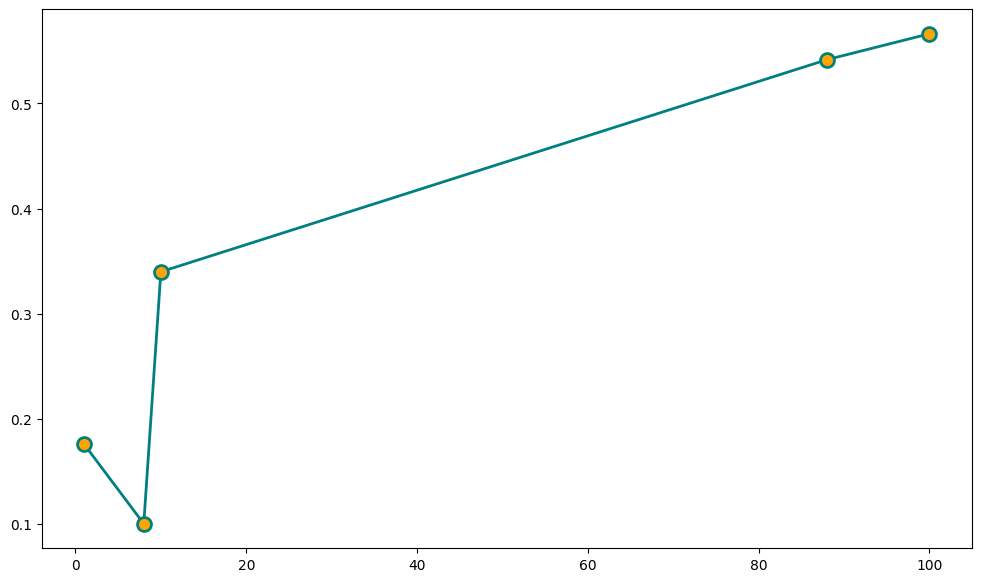

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided Excel file
file_path = 'SMARTWATCH + OCRA (FIXED).xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Replace LotNum values: 8 -> 'Tray 1', 88 -> 'Tray 2'
data['LotNum'] = data['LoTNum'].replace({8: 'Tray 1', 88: 'Tray 2'})

# Extracting the relevant data for plotting
eda_avg = data.groupby('LoNum')['EDA'].mean()

# Plotting the graph with improved aesthetics
plt.figure(figsize=(12, 7))

# Adding custom markers, colors, and line styles for better aesthetics
plt.plot(eda_avg.index, eda_avg.values, marker='o', linestyle='-', linewidth=2,
         color='teal', markersize=10, markerfacecolor='orange', markeredgewidth=2)

# Customizing x-axis labels to display only the specified lot numbers or trays in the order provided
lot_order = ['Lot 1', 'Lot 10', 'Lot 100', 'Tray 1', 'Tray 2']
plt.xticks(ticks=lot_order, labels=[f'{i}' for i in lot_order], fontsize=12, rotation=15, ha='right')

# Labeling axes and adding title with enhanced formatting
plt.xlabel('Lot Number or Tray', fontsize=14, fontweight='bold')
plt.ylabel('Average EDA (µS)', fontsize=14, fontweight='bold')
plt.title('Mean EDA Across Different Lot Sizes and Trays', fontsize=18, fontweight='bold', color='darkblue')

# Adding a grid with customized style
plt.grid(visible=True, linestyle='--', linewidth=0.7, alpha=0.6, color='grey')

# Adding annotations to emphasize key points in the graph
for i, value in enumerate(eda_avg.values):
    plt.annotate(f'{value:.2f}', (i, value), textcoords="offset points",
                 xytext=(0, 10), ha='center', fontsize=10, color='black')

# Adding a border around the plot for better visuals
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the graph
plt.show()


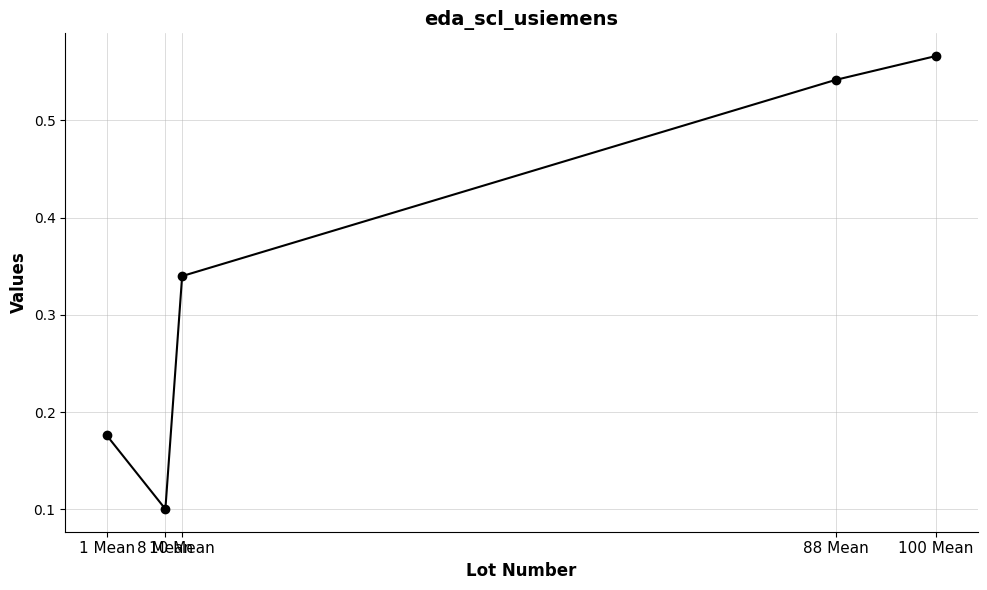

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided Excel file
file_path = 'SMARTWATCH + OCRA (FIXED).xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Assuming the columns are named 'LotNum' and 'EDA'
# Extracting the relevant data for plotting
eda_avg = data.groupby('LoTNum')['eda_scl_usiemens'].mean()

# Plotting the graph with improved aesthetics
plt.figure(figsize=(10, 6))

# Adding custom markers, colors, and line styles for better aesthetics
plt.plot(eda_avg.index, eda_avg.values, marker='o', linestyle='-', linewidth=1.5, color='black', markersize=6)

# Customizing x-axis labels to display only the specified lot numbers in the order provided
lot_order = [1, 10, 100, 8, 88]
plt.xticks(ticks=lot_order, labels=[f'{i} Mean' for i in lot_order], fontsize=11)

# Labeling axes and adding title with enhanced formatting
plt.xlabel('Lot Number', fontsize=12, fontweight='bold')
plt.ylabel('Values', fontsize=12, fontweight='bold')
plt.title('eda_scl_usiemens', fontsize=14, fontweight='bold')

# Adding a grid with customized style for cleaner aesthetics
plt.grid(visible=True, linestyle='-', linewidth=0.5, alpha=0.6)

# Adding a border around the plot for better visuals
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the graph
plt.show()


In [ ]:
# Adjusting the plot to follow the exact model provided (similar to the example image)

plt.figure(figsize=(12, 6))
plt.scatter(cleaned_temp_time, cleaned_temp_values, color='blue', label="Temperature (°C)")
plt.axhline(y=tmin, color='skyblue', linestyle='--', label="Tmin (20°C)")  # Lighter blue for Tmin
plt.axhline(y=tmax, color='red', linestyle='--', label="Tmax (25°C)")

# Add vertical lines for turn times
for turn_time in turn_times:
    plt.axvline(x=turn_time, color='green', linestyle='-.')

# X-axis labels including Turn labels integrated in the ticks
xticks = [0, 4, 8, 12, 16, 20, 24, 6.5, 14.5, 22.5]
xlabels = ["00:00", "04:00", "08:00", "12:00", "16:00", "20:00", "00:00", "Turn 1", "Turn 2", "Turn 3"]
plt.xticks(ticks=xticks, labels=xlabels, fontsize=16, rotation=0)

# Labels and title with improved font sizes and styling
plt.xlabel("Time (Hours)", fontsize=18)
plt.ylabel("Temperature (°C)", fontsize=18)
plt.title("Temperature Over Time", fontsize=18, fontweight='bold')

# Move legend to the bottom-left corner inside the graph
plt.legend(loc="lower left", fontsize=14)

# Adjust layout for better alignment
plt.tight_layout()
plt.show()


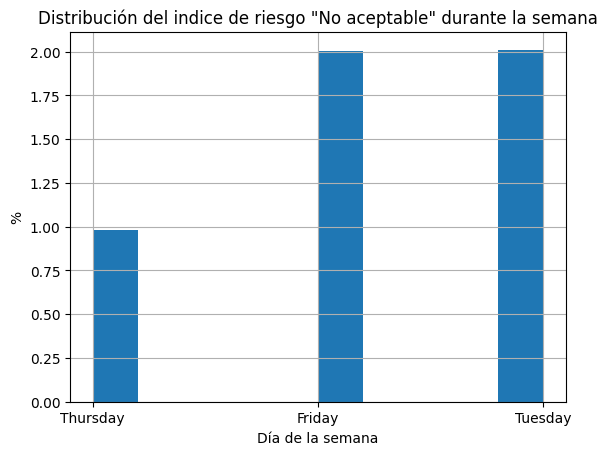

In [ ]:
pl.hist(encoder_day.inverse_transform( ocra_df[(ocra_df['IndexRiskL']>11) & (ocra_df['IndexRiskR']>11) ]['Day']), density=True)
pl.grid()
pl.xlabel('Día de la semana')
pl.ylabel('%')
pl.title('Distribución del indice de riesgo "No aceptable" durante la semana')
pl.show()

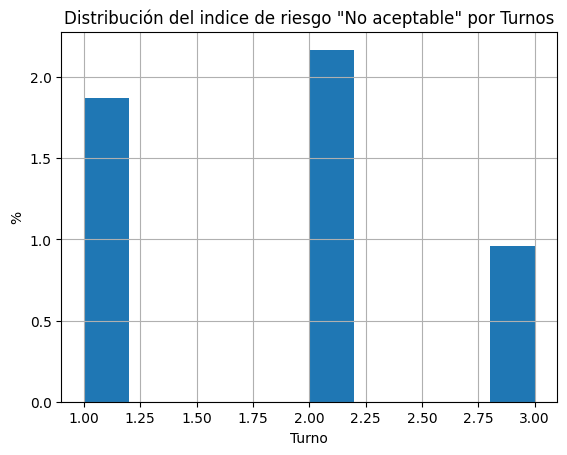

In [ ]:
pl.hist(ocra_df[(ocra_df['IndexRiskL']>11) & (ocra_df['IndexRiskR']>11) ]['Turn'], density=True)
pl.grid()
pl.xlabel('Turno')
pl.ylabel('%')
pl.title('Distribución del indice de riesgo "No aceptable" por Turnos')
pl.show()

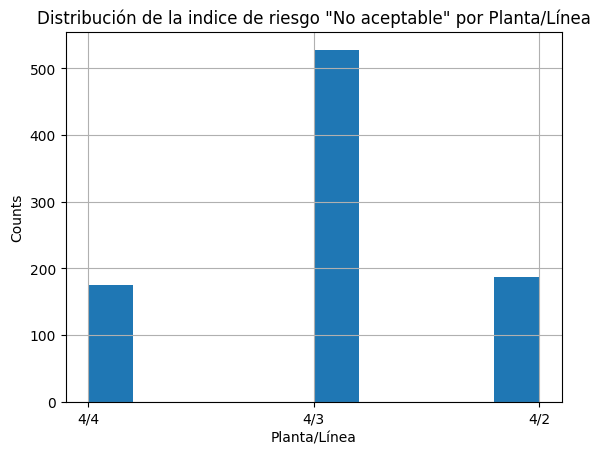

In [ ]:
pl.hist(encoder_plant.inverse_transform(ocra_df[(ocra_df['IndexRiskL']>11) & (ocra_df['IndexRiskR']>11) ]['Plant/Line']))
pl.grid()
pl.xlabel('Planta/Línea')
pl.ylabel('Counts')
pl.title('Distribución de la indice de riesgo "No aceptable" por Planta/Línea')
pl.show()

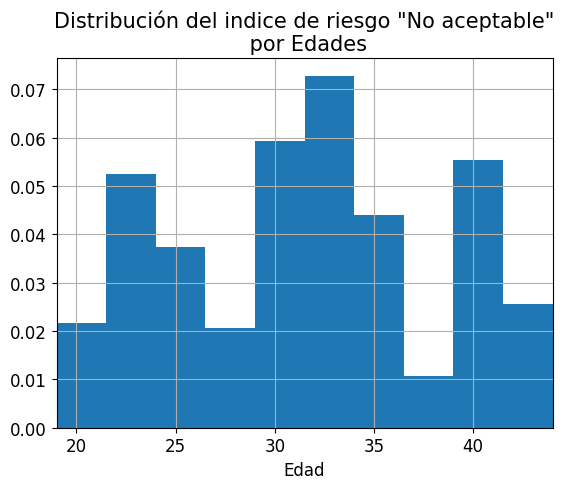

In [ ]:
pl.hist(ocra_df[(ocra_df['IndexRiskL']>11) & (ocra_df['IndexRiskR']>11)]['Age '], density=True)
pl.grid()
pl.xlabel('Edad', fontsize=12)
pl.xlim(min(ocra_df['Age ']), max(ocra_df['Age ']))
pl.title('Distribución del indice de riesgo "No aceptable"\n por Edades',fontsize=15)
pl.yticks(fontsize=12)
pl.xticks(fontsize=12)
pl.show()

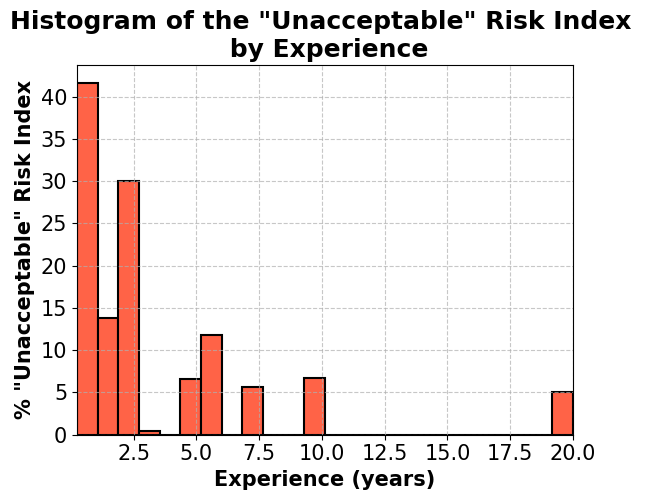

In [ ]:
import matplotlib.pyplot as pl
import numpy as np

# Sample data preparation (replace with actual data in your case)
counts, bins = np.histogram(ocra_df[(ocra_df['IndexRiskL'] > 11) & (ocra_df['IndexRiskR'] > 11)]['Experience'], bins=24, density=True)

# Create a histogram plot with red color and improved visual style
pl.hist(bins[:-1], bins, weights=counts * 100, color='#FF6347', edgecolor='black', linewidth=1.5)  # Tomato red with black edges

# Add grid lines with a more subtle appearance
pl.grid(True, linestyle='--', alpha=0.7)

# Label the x-axis as "Experience (years)"
pl.xlabel('Experience (years)', fontsize=15, fontweight='bold')

# Set the x-axis range based on the data
pl.xlim(min(ocra_df['Experience']), max(ocra_df['Experience']))

# Label the y-axis as "%"
pl.ylabel('% "Unacceptable" Risk Index', fontsize=15, fontweight='bold')

# Add a title to the plot: "Distribution of the 'Unacceptable' Risk Index by Experience"
pl.title('Histogram of the "Unacceptable" Risk Index \n by Experience', fontsize=18, fontweight='bold')

# Set the font size of the y-axis and x-axis tick labels to 15
pl.yticks(fontsize=15)
pl.xticks(fontsize=15)

# Show the plot
pl.show()


## Shift Analysis

In [ ]:
df = pd.DataFrame(data[1:], columns=data[0])
df.drop(['Date'], inplace=True, axis=1)
for col in df.columns:
  df[col].replace('', np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
df

ID participant Turn Plant/Line        Day   Time Age  Experience  \
5              VP1I    2        4/4   Thursday  14:27   32          5   
6              VP1I    2        4/4   Thursday  14:28   32          5   
7              VP1I    2        4/4   Thursday  14:29   32          5   
8              VP1I    2        4/4   Thursday  14:30   32          5   
9              VP1I    2        4/4   Thursday  14:31   32          5   
...             ...  ...        ...        ...    ...  ...        ...   
2096          VP39F    3          8  Wednesday  05:00   32       0.25   
2097          VP39F    3          8  Wednesday  05:01   32       0.25   
2098          VP39F    3          8  Wednesday  05:02   32       0.25   
2099          VP39F    3          8  Wednesday  05:03   32       0.25   
2100          VP39F    3          8  Wednesday  05:04   32       0.25   

     shoulderR_pose1 shoulderR_pose2 shoulderR_pose3  ... FRecu FFreqR FFreqL  \
5               1714               0              25  ...     4     10     10   
6               1712               8              19  ...     4     10     10   
7               1580               0             159  ...     4     10     10   
8               1463               1             275  ...     4     10     10   
9               1590               0             149  ...     4     10     10   
...              ...             ...             ...  ...   ...    ...    ...   
2096            1672               3              64  ...     4     10     10   
2097            1729              10               0  ...     4     10     10   
2098            1710              26               3  ...     4     10      0   
2099            1581              65              93  ...     4     10     10   
2100            1526             163              46  ...     4     10     10   

     FForcR FForcL FPostR FPostL FRisk IndexRiskR IndexRiskL  
5         0      0      4      4     3     19.425     19.425  
6         0      0      4      4     3     19.425     19.425  
7         0      0      4      4     3     19.425     19.425  
8         0      0      4      4     3     19.425     19.425  
9         0      0      4      4     3     19.425     19.425  
...     ...    ...    ...    ...   ...        ...        ...  
2096      0      0      4      8     3     19.425     23.125  
2097      0      0      4      4     3     19.425     19.425  
2098      0      0      2      4     3     17.575     10.175  
2099      0      0      4      4     3     19.425     19.425  
2100      0      0      4      4     3     19.425     19.425  

[1175 rows x 38 columns]

In [ ]:
shifts = np.unique(df['ID participant'])
def verificar_vp(elementos):
  complete = []
  for i in range(1, 44):  # Recorre desde 1 hasta 43
      vpi = f"VP{i}I"
      vpf = f"VP{i}F"
      if vpi in elementos and vpf in elementos:
          complete.append(f"VP{i}")
  return complete

# Llamada a la función con la lista de elementos
full_shifts = verificar_vp(shifts)
full_shifts

['VP1',
 'VP2',
 'VP3',
 'VP4',
 'VP5',
 'VP6',
 'VP7',
 'VP8',
 'VP9',
 'VP10',
 'VP11',
 'VP12',
 'VP20',
 'VP21',
 'VP22',
 'VP32',
 'VP33',
 'VP34',
 'VP35',
 'VP36',
 'VP37',
 'VP38',
 'VP39']

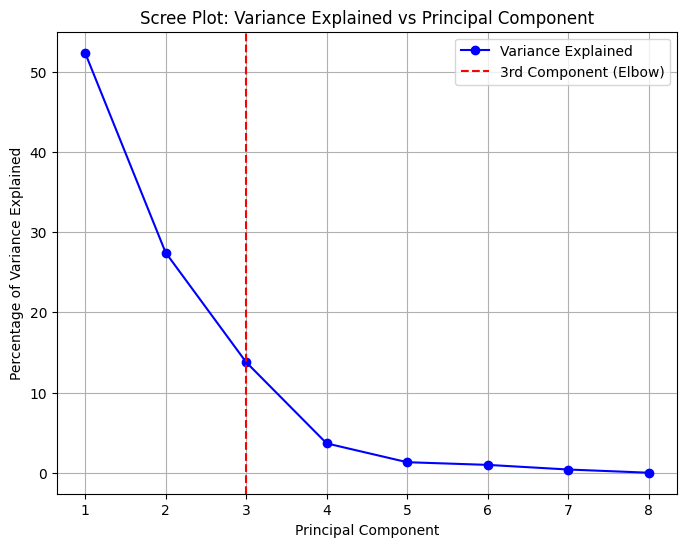

In [ ]:
# Re-attempting to plot the table provided with the appropriate values

import matplotlib.pyplot as plt

# Data from the table
components = [1, 2, 3, 4, 5, 6, 7, 8]
variance_explained = [52.380, 27.463, 13.793, 3.661, 1.314, 0.981, 0.403, 0.003]

# Plot
plt.figure(figsize=(8,6))
plt.plot(components, variance_explained, marker='o', linestyle='-', color='b', label='Variance Explained')

# Adding title and labels
plt.title('Scree Plot: Variance Explained vs Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance Explained')

# Adding a red dashed line for the "elbow" component (3rd component)
plt.axvline(x=3, color='r', linestyle='--', label='3rd Component (Elbow)')

plt.xticks(components)
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [ ]:
increase_delta_rindex= 0
increase_delta_lindex= 0
delta_rindex_list = []
delta_lindex_list = []

for i in full_shifts:
  print(f'Participant: {i}')
  initi_rindex = np.average(np.array(df[df['ID participant']==f'{i}I']['IndexRiskR'].values, dtype=float))
  final_rindex = np.average(np.array(df[df['ID participant']==f'{i}F']['IndexRiskR'].values, dtype=float))
  delta_rindex = final_rindex - initi_rindex
  delta_rindex_list.append(delta_rindex)
  print("Average Right Index Initial Shift", initi_rindex)
  print("Average Right Index Final Shift", final_rindex)
  print("Delta Right Index", delta_rindex)
  if delta_rindex > 0:
    increase_delta_rindex += 1
  print("\n")

  initi_lindex = np.average(np.array(df[df['ID participant']==f'{i}I']['IndexRiskL'].values, dtype=float))
  final_lindex = np.average(np.array(df[df['ID participant']==f'{i}F']['IndexRiskL'].values, dtype=float))
  delta_lindex = final_lindex - initi_lindex
  print("Average Left Index Initial Shift", initi_lindex)
  print("Average Left Index Final Shift", final_lindex)
  print("Delta Left Index", delta_lindex)
  delta_lindex_list.append(delta_lindex)
  if delta_lindex > 0:
    increase_delta_lindex += 1
  print("··········································································\n")


print(increase_delta_rindex, increase_delta_lindex)

Participant: VP1
Average Right Index Initial Shift 19.721
Average Right Index Final Shift 19.425000000000004
Delta Right Index -0.2959999999999958


Average Left Index Initial Shift 20.608999999999995
Average Left Index Final Shift 21.194565217391304
Delta Left Index 0.5855652173913093
··········································································

Participant: VP2
Average Right Index Initial Shift 19.601190476190478
Average Right Index Final Shift 19.619736842105265
Delta Right Index 0.01854636591478709


Average Left Index Initial Shift 19.953571428571433
Average Left Index Final Shift 20.788157894736845
Delta Left Index 0.8345864661654119
··········································································

Participant: VP3
Average Right Index Initial Shift 19.573
Average Right Index Final Shift 20.305952380952384
Delta Right Index 0.7329523809523835


Average Left Index Initial Shift 22.385
Average Left Index Final Shift 23.03690476190476
Delta Left Index 0.651904

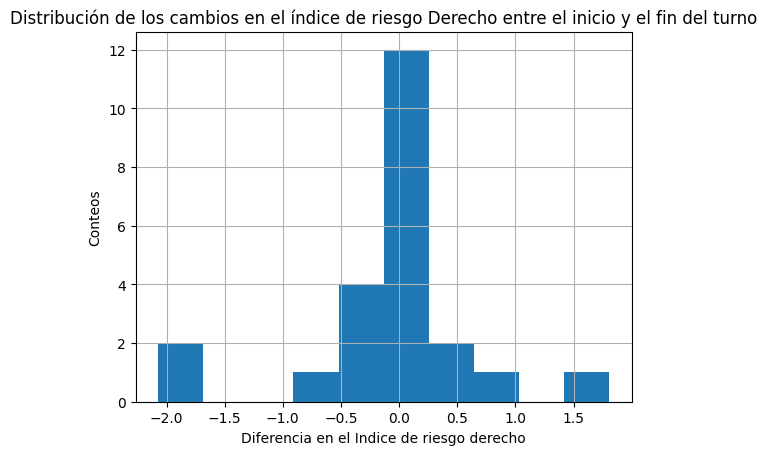

In [ ]:
_ = pl.hist(delta_rindex_list)
pl.title('Distribución de los cambios en el índice de riesgo Derecho entre el inicio y el fin del turno')
pl.xlabel('Diferencia en el Indice de riesgo derecho')
pl.ylabel('Conteos')
pl.grid()
pl.show()

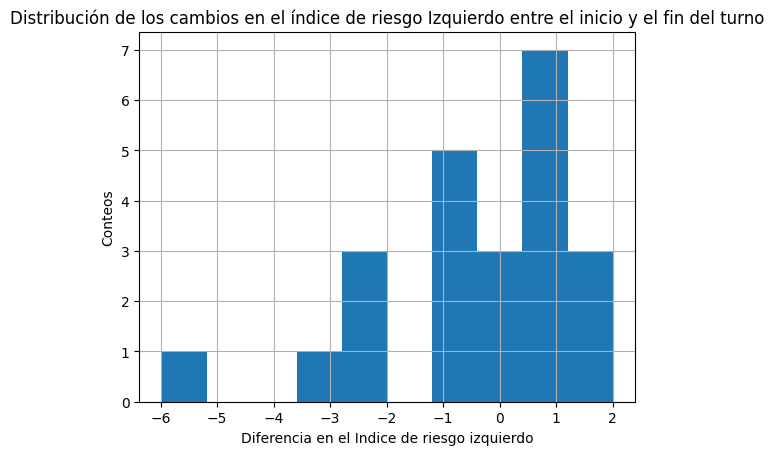

In [ ]:
_ = pl.hist(delta_lindex_list)
pl.title('Distribución de los cambios en el índice de riesgo Izquierdo entre el inicio y el fin del turno')
pl.xlabel('Diferencia en el Indice de riesgo izquierdo')
pl.ylabel('Conteos')
pl.grid()
pl.show()

## Análisis Estadístico

In [ ]:
from scipy.stats import mannwhitneyu

for column in ocra_df.columns[1:]:
  print(column)

  muestra1 = ocra_df[ocra_df['ID participant']==1][column]  # Inicio del Turno
  muestra2 = ocra_df[ocra_df['ID participant']==0][column]  # Fin del Turno

  estadistico, p_valor = mannwhitneyu(muestra1, muestra2, alternative='two-sided')

  print(f'Estadístico U: {estadistico}')
  print(f'Valor p: {p_valor}')

  alpha = 0.05
  if p_valor < alpha:
      print("Se rechaza la hipótesis nula: las muestras tienen distribuciones diferentes.")
  else:
      print("No se puede rechazar la hipótesis nula: no se puede concluir que las muestras tienen distribuciones diferentes.")
  print("###################################################\n\n")

Turn
Estadístico U: 110046.0
Valor p: 0.7564761376554507
No se puede rechazar la hipótesis nula: no se puede concluir que las muestras tienen distribuciones diferentes.
###################################################


Plant/Line
Estadístico U: 107123.0
Valor p: 0.6270728213784871
No se puede rechazar la hipótesis nula: no se puede concluir que las muestras tienen distribuciones diferentes.
###################################################


Day
Estadístico U: 125564.0
Valor p: 1.2260891573419084e-05
Se rechaza la hipótesis nula: las muestras tienen distribuciones diferentes.
###################################################


Time
Estadístico U: 89651.0
Valor p: 3.168319421180932e-06
Se rechaza la hipótesis nula: las muestras tienen distribuciones diferentes.
###################################################


Age 
Estadístico U: 90928.5
Valor p: 1.2454502676781396e-05
Se rechaza la hipótesis nula: las muestras tienen distribuciones diferentes.
##############################

In [ ]:
from scipy.stats import kruskal

for column in ocra_df.columns[1:]:
  print(column)

  muestra1 = ocra_df[ocra_df['ID participant']==1][column]  # Inicio del Turno
  muestra2 = ocra_df[ocra_df['ID participant']==0][column]  # Fin del Turno

  estadistico, p_valor = mannwhitneyu(muestra1, muestra2, alternative='two-sided')

  print(f'Estadístico U: {estadistico}')
  print(f'Valor p: {p_valor}')

  alpha = 0.05
  if p_valor < alpha:
      print("Se rechaza la hipótesis nula: las muestras tienen distribuciones diferentes.")
  else:
      print("No se puede rechazar la hipótesis nula: no se puede concluir que las muestras tienen distribuciones diferentes.")
  print("###################################################\n\n")

Turn
Estadístico U: 110046.0
Valor p: 0.7564761376554507
No se puede rechazar la hipótesis nula: no se puede concluir que las muestras tienen distribuciones diferentes.
###################################################


Plant/Line
Estadístico U: 107123.0
Valor p: 0.6270728213784871
No se puede rechazar la hipótesis nula: no se puede concluir que las muestras tienen distribuciones diferentes.
###################################################


Day
Estadístico U: 125564.0
Valor p: 1.2260891573419084e-05
Se rechaza la hipótesis nula: las muestras tienen distribuciones diferentes.
###################################################


Time
Estadístico U: 89651.0
Valor p: 3.168319421180932e-06
Se rechaza la hipótesis nula: las muestras tienen distribuciones diferentes.
###################################################


Age 
Estadístico U: 90928.5
Valor p: 1.2454502676781396e-05
Se rechaza la hipótesis nula: las muestras tienen distribuciones diferentes.
##############################

## Dimensionality Reduction

Número de componentes necesarias para explicar al menos el 90.0% de la varianza: 15


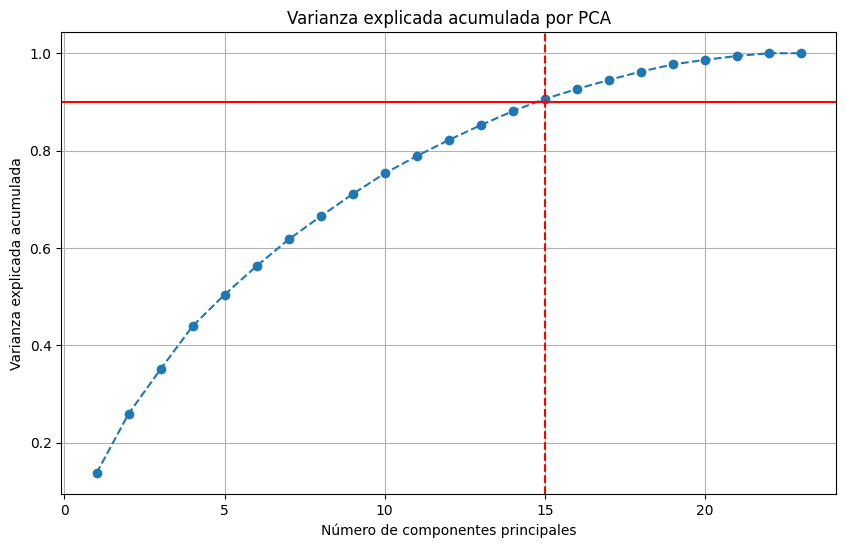

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = ocra_df.drop(['IndexRiskR','IndexRiskL'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)
X_pca = pca.fit_transform(X_scaled)

explained_variance = np.cumsum(pca.explained_variance_ratio_)

threshold = 0.9
num_components = np.argmax(explained_variance >= threshold) + 1

print(f'Número de componentes necesarias para explicar al menos el {threshold*100}% de la varianza: {num_components}')


pl.figure(figsize=(10, 6))
pl.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
pl.xlabel('Número de componentes principales')
pl.ylabel('Varianza explicada acumulada')
pl.title('Varianza explicada acumulada por PCA')
pl.axhline(y=threshold, color='r', linestyle='-')
pl.axvline(x=num_components, color='r', linestyle='--')
pl.grid()
pl.show()

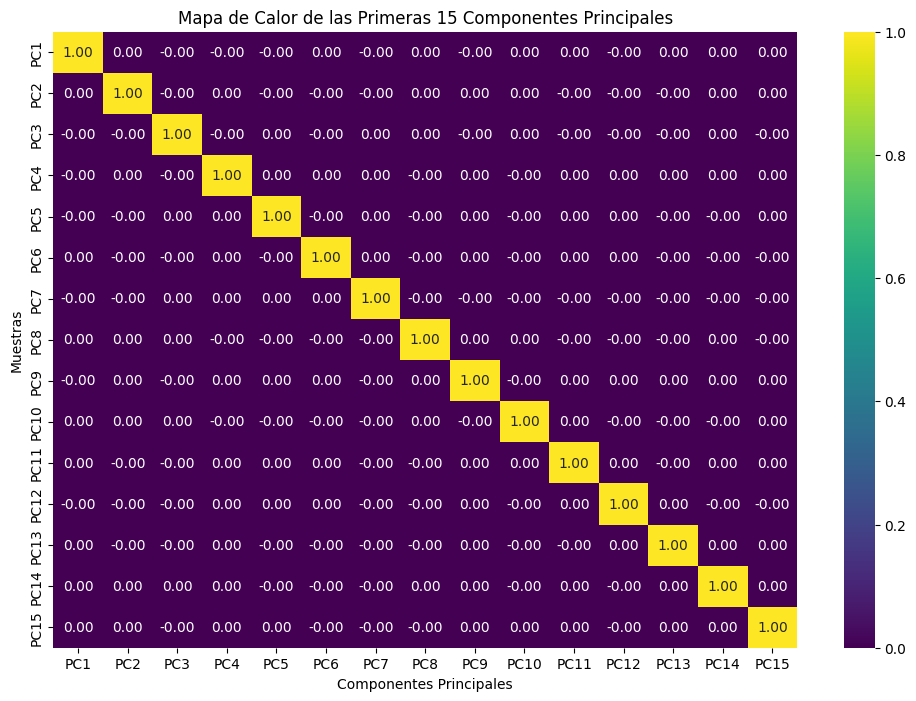

In [ ]:
X_reduced = X_pca[:, :num_components]

columns = [f'PC{i+1}' for i in range(num_components)]
X_reduced_df = pd.DataFrame(X_reduced, columns=columns)

pl.figure(figsize=(12, 8))
sns.heatmap(X_reduced_df.corr(), cmap='viridis', cbar=True, annot=True, fmt='0.2f')
pl.title(f'Mapa de Calor de las Primeras {num_components} Componentes Principales')
pl.xlabel('Componentes Principales')
pl.ylabel('Muestras')
pl.show()

# Prediction

### Index Risk R prediction


### Regression

r2: 0.5463457262668627


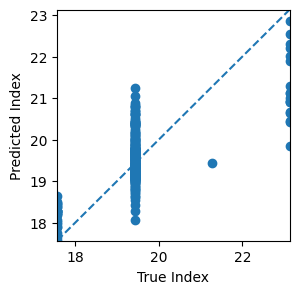

r2: 0.5333707946852475


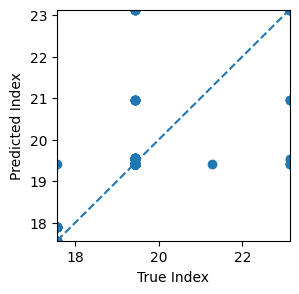

r2: 0.6880127499907003


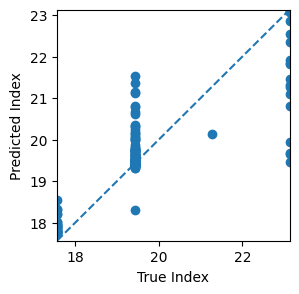

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
from sklearn.tree            import DecisionTreeRegressor
from sklearn.ensemble        import RandomForestRegressor
from sklearn.metrics         import r2_score


X = X_reduced_df
y = ocra_df['IndexRiskR']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

#### LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
print(f'r2: {r2_score(y_test,y_pred)}')

pl.figure(figsize=(3,3))
pl.scatter(y_test, y_pred)
pl.xlabel('True Index')
pl.ylabel('Predicted Index')
pl.xlim(min(y_test), max(y_test))
pl.ylim(min(y_test), max(y_test))
pl.plot(np.linspace(0,max(y_test)), np.linspace(0,max(y_test)),'--')
pl.show()

#### DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(f'r2: {r2_score(y_test,y_pred)}')

pl.figure(figsize=(3,3))
pl.scatter(y_test, y_pred)
pl.xlim(min(y_test), max(y_test))
pl.xlabel('True Index')
pl.ylabel('Predicted Index')
pl.ylim(min(y_test), max(y_test))
pl.plot(np.linspace(0,max(y_test)), np.linspace(0,max(y_test)),'--')
pl.show()

#### RandomForest
forest = RandomForestRegressor(max_depth=5, n_estimators=100)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(f'r2: {r2_score(y_test,y_pred)}')

pl.figure(figsize=(3,3))
pl.scatter(y_test, y_pred)
pl.xlim(min(y_test), max(y_test))
pl.xlabel('True Index')
pl.ylabel('Predicted Index')
pl.ylim(min(y_test), max(y_test))
pl.plot(np.linspace(0,max(y_test)), np.linspace(0,max(y_test)),'--')
pl.show()

### Clasification

In [ ]:
index_dict = {0:'Aceptable',1:'Low',2:'Not Aceptable:Low',3:'Not aceptable:Mid',4:'Not Aceptable:High'}

def classification(index):
  # 0: Aceptable
  # 1: Leve o Incierto
  # 2: No Aceptable / Leve
  # 3: No Aceptable / Medio
  # 4: No Aceptable / Alto
  res = 0
  if index <= 7.5:
    res = 0
  elif (index > 7.5) & (index <= 11):
    res = 1
  elif (index > 11) & (index <= 14):
    res = 2
  elif (index > 14) & (index < 22.5):
    res= 3
  elif (index >= 22.5):
    res = 4
  return res

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm             import SVC
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.ensemble        import AdaBoostClassifier
from sklearn.ensemble        import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

X = X_reduced_df
y = ocra_df['IndexRiskR'].apply(classification)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           3       0.98      0.99      0.98       262
           4       0.81      0.68      0.74        19

    accuracy                           0.97       281
   macro avg       0.89      0.84      0.86       281
weighted avg       0.97      0.97      0.97       281



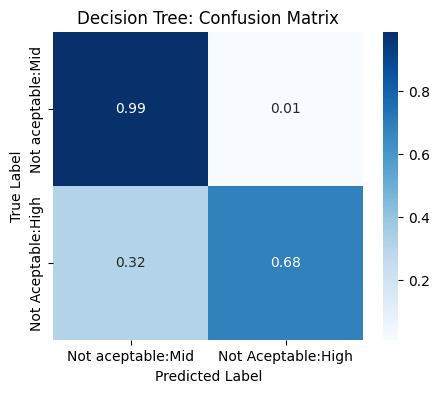

In [ ]:
#### DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm_normalized)
pl.figure(figsize=(5, 4))
sns.heatmap(df_cm, annot=True, fmt='.2f', cmap='Blues', cbar=True,
            xticklabels=[index_dict[key] for key in np.unique(y_pred)], yticklabels=[index_dict[key] for key in np.unique(y_test)])
pl.xlabel('Predicted Label')
pl.ylabel('True Label')
pl.title('Decision Tree: Confusion Matrix')
pl.show()

              precision    recall  f1-score   support

           3       0.98      0.99      0.98       262
           4       0.87      0.68      0.76        19

    accuracy                           0.97       281
   macro avg       0.92      0.84      0.87       281
weighted avg       0.97      0.97      0.97       281



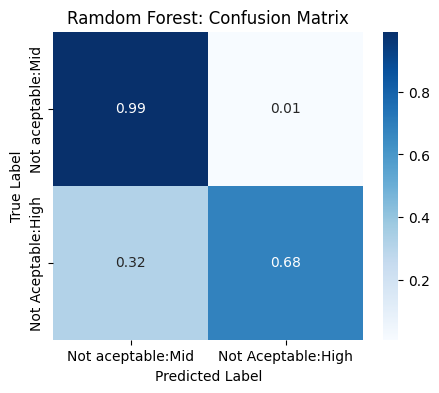

In [ ]:
#### RandomForestClassifier
forest = RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm_normalized)
pl.figure(figsize=(5, 4))
sns.heatmap(df_cm, annot=True, fmt='.2f', cmap='Blues', cbar=True,
            xticklabels=[index_dict[key] for key in np.unique(y_pred)], yticklabels=[index_dict[key] for key in np.unique(y_test)])
pl.xlabel('Predicted Label')
pl.ylabel('True Label')
pl.title('Ramdom Forest: Confusion Matrix')
pl.show()

              precision    recall  f1-score   support

           3       0.98      0.97      0.98       262
           4       0.65      0.68      0.67        19

    accuracy                           0.95       281
   macro avg       0.81      0.83      0.82       281
weighted avg       0.95      0.95      0.95       281



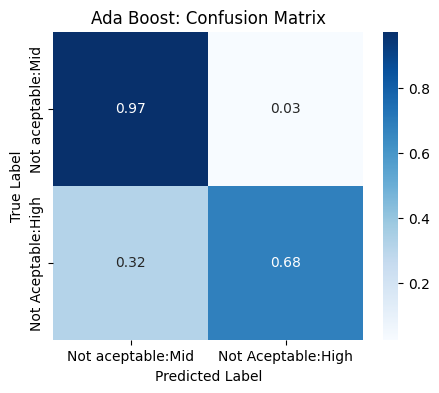

In [ ]:
#### AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=150, random_state=42)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm_normalized)
pl.figure(figsize=(5, 4))
sns.heatmap(df_cm, annot=True, fmt='.2f', cmap='Blues', cbar=True,
            xticklabels=[index_dict[key] for key in np.unique(y_pred)], yticklabels=[index_dict[key] for key in np.unique(y_test)])
pl.xlabel('Predicted Label')
pl.ylabel('True Label')
pl.title('Ada Boost: Confusion Matrix')
pl.show()

              precision    recall  f1-score   support

           3       0.98      0.99      0.98       262
           4       0.81      0.68      0.74        19

    accuracy                           0.97       281
   macro avg       0.89      0.84      0.86       281
weighted avg       0.97      0.97      0.97       281



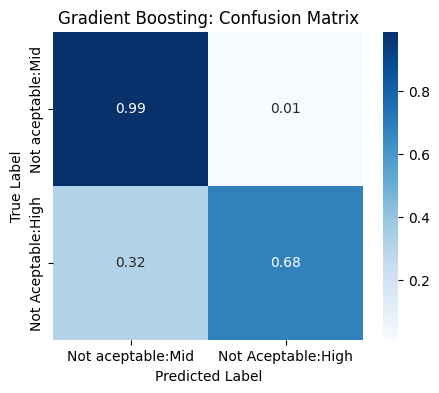

In [ ]:
#### GBClassifier
gbc = GradientBoostingClassifier(n_estimators=50, random_state=42)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm_normalized)
pl.figure(figsize=(5, 4))
sns.heatmap(df_cm, annot=True, fmt='.2f', cmap='Blues', cbar=True,
            xticklabels=[index_dict[key] for key in np.unique(y_pred)], yticklabels=[index_dict[key] for key in np.unique(y_test)])
pl.xlabel('Predicted Label')
pl.ylabel('True Label')
pl.title('Gradient Boosting: Confusion Matrix')
pl.show()

              precision    recall  f1-score   support

           3       0.98      0.97      0.98       262
           4       0.67      0.74      0.70        19

    accuracy                           0.96       281
   macro avg       0.82      0.86      0.84       281
weighted avg       0.96      0.96      0.96       281



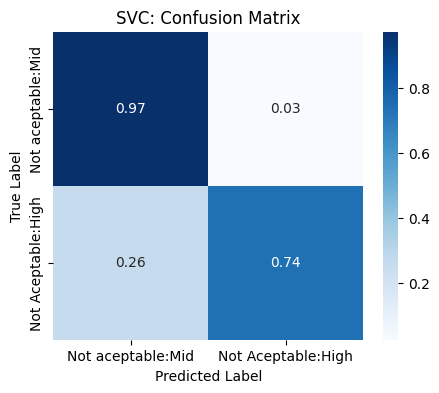

In [ ]:
#### SVC
svc = SVC(C=1.5, gamma=0.05, kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm_normalized)
pl.figure(figsize=(5, 4))
sns.heatmap(df_cm, annot=True, fmt='.2f', cmap='Blues', cbar=True,
            xticklabels=[index_dict[key] for key in np.unique(y_pred)], yticklabels=[index_dict[key] for key in np.unique(y_test)])
pl.xlabel('Predicted Label')
pl.ylabel('True Label')
pl.title('SVC: Confusion Matrix')
pl.show()

### Index Risk L prediction


### Regression

r2: 0.5662419234600369


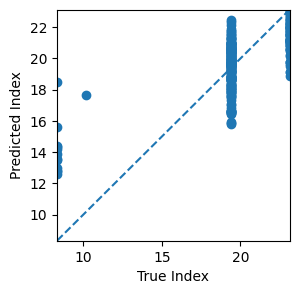

r2: 0.668964392938632


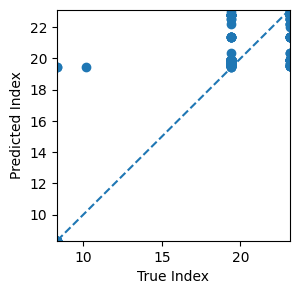

r2: 0.7960127699868654


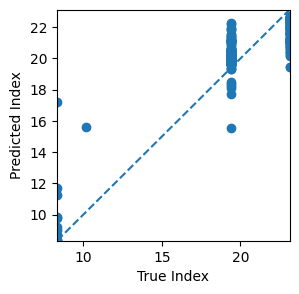

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
from sklearn.tree            import DecisionTreeRegressor
from sklearn.ensemble        import RandomForestRegressor
from sklearn.metrics         import r2_score

X = X_reduced_df
y = ocra_df['IndexRiskL']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

#### LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
print(f'r2: {r2_score(y_test,y_pred)}')

pl.figure(figsize=(3,3))
pl.scatter(y_test, y_pred)
pl.xlabel('True Index')
pl.ylabel('Predicted Index')
pl.xlim(min(y_test), max(y_test))
pl.ylim(min(y_test), max(y_test))
pl.plot(np.linspace(0,max(y_test)), np.linspace(0,max(y_test)),'--')
pl.show()

#### DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(f'r2: {r2_score(y_test,y_pred)}')

pl.figure(figsize=(3,3))
pl.scatter(y_test, y_pred)
pl.xlim(min(y_test), max(y_test))
pl.xlabel('True Index')
pl.ylabel('Predicted Index')
pl.ylim(min(y_test), max(y_test))
pl.plot(np.linspace(0,max(y_test)), np.linspace(0,max(y_test)),'--')
pl.show()

#### RandomForest
forest = RandomForestRegressor(max_depth=5, n_estimators=100)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(f'r2: {r2_score(y_test,y_pred)}')

pl.figure(figsize=(3,3))
pl.scatter(y_test, y_pred)
pl.xlim(min(y_test), max(y_test))
pl.xlabel('True Index')
pl.ylabel('Predicted Index')
pl.ylim(min(y_test), max(y_test))
pl.plot(np.linspace(0,max(y_test)), np.linspace(0,max(y_test)),'--')
pl.show()

### Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm             import SVC
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.ensemble        import AdaBoostClassifier
from sklearn.ensemble        import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

X = X_reduced_df
y = ocra_df['IndexRiskL'].apply(classification)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           1       0.92      0.85      0.88        13
           3       0.86      0.91      0.89       174
           4       0.83      0.74      0.79        94

    accuracy                           0.85       281
   macro avg       0.87      0.83      0.85       281
weighted avg       0.85      0.85      0.85       281



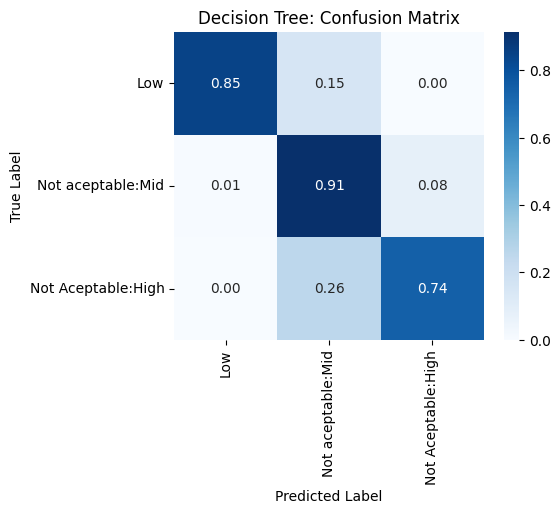

In [ ]:
#### DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm_normalized)
pl.figure(figsize=(5, 4))
sns.heatmap(df_cm, annot=True, fmt='.2f', cmap='Blues', cbar=True,
            xticklabels=[index_dict[key] for key in np.unique(y_pred)], yticklabels=[index_dict[key] for key in np.unique(y_test)])
pl.xlabel('Predicted Label')
pl.ylabel('True Label')
pl.title('Decision Tree: Confusion Matrix')
pl.show()

              precision    recall  f1-score   support

           1       1.00      0.77      0.87        13
           3       0.85      0.95      0.90       174
           4       0.88      0.72      0.80        94

    accuracy                           0.86       281
   macro avg       0.91      0.81      0.85       281
weighted avg       0.87      0.86      0.86       281



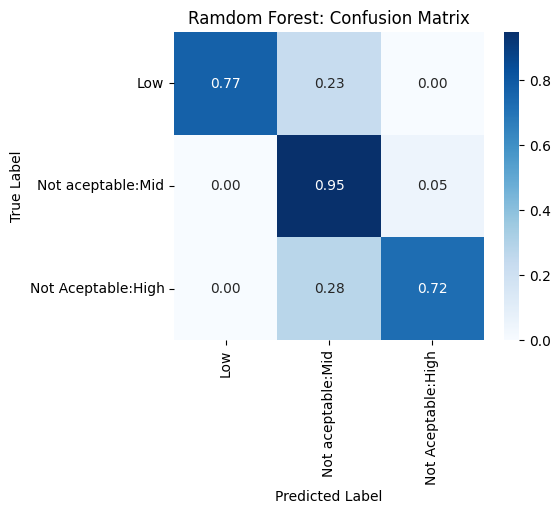

In [ ]:
#### RandomForestClassifier
forest = RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm_normalized)
pl.figure(figsize=(5, 4))
sns.heatmap(df_cm, annot=True, fmt='.2f', cmap='Blues', cbar=True,
            xticklabels=[index_dict[key] for key in np.unique(y_pred)], yticklabels=[index_dict[key] for key in np.unique(y_test)])
pl.xlabel('Predicted Label')
pl.ylabel('True Label')
pl.title('Ramdom Forest: Confusion Matrix')
pl.show()

              precision    recall  f1-score   support

           1       0.59      1.00      0.74        13
           3       0.81      0.47      0.59       174
           4       0.47      0.80      0.59        94

    accuracy                           0.60       281
   macro avg       0.62      0.75      0.64       281
weighted avg       0.69      0.60      0.60       281



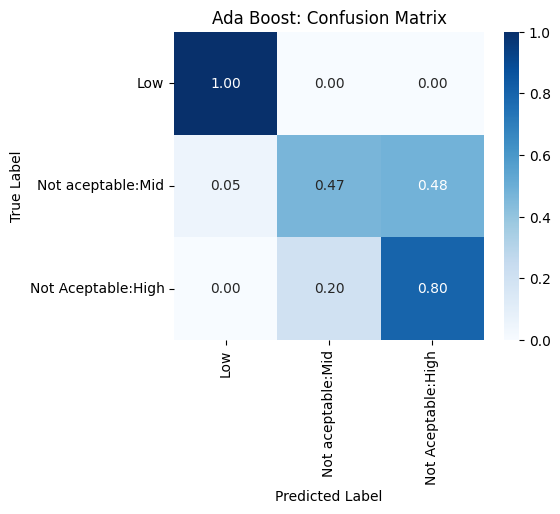

In [ ]:
#### AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=150, random_state=42)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm_normalized)
pl.figure(figsize=(5, 4))
sns.heatmap(df_cm, annot=True, fmt='.2f', cmap='Blues', cbar=True,
            xticklabels=[index_dict[key] for key in np.unique(y_pred)], yticklabels=[index_dict[key] for key in np.unique(y_test)])
pl.xlabel('Predicted Label')
pl.ylabel('True Label')
pl.title('Ada Boost: Confusion Matrix')
pl.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-159-096b9be902ad>:8: RuntimeWarning: invalid value encountered in divide


              precision    recall  f1-score   support

           1       0.92      0.85      0.88        13
           2       0.00      0.00      0.00         0
           3       0.89      0.95      0.92       174
           4       0.90      0.79      0.84        94

    accuracy                           0.89       281
   macro avg       0.68      0.65      0.66       281
weighted avg       0.89      0.89      0.89       281



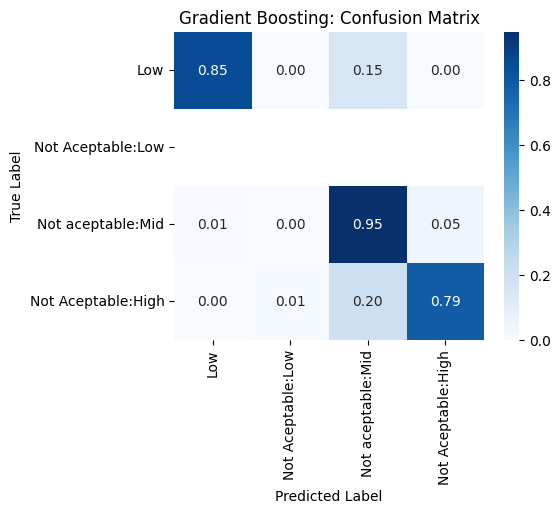

In [ ]:
#### GBClassifier
gbc = GradientBoostingClassifier(n_estimators=50, random_state=42)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm_normalized)
pl.figure(figsize=(5, 4))
sns.heatmap(df_cm, annot=True, fmt='.2f', cmap='Blues', cbar=True,
            xticklabels=[index_dict[key] for key in np.unique(y_pred)], yticklabels=[index_dict[key] for key in np.unique(y_pred)])
pl.xlabel('Predicted Label')
pl.ylabel('True Label')
pl.title('Gradient Boosting: Confusion Matrix')
pl.show()

              precision    recall  f1-score   support

           1       1.00      0.85      0.92        13
           3       0.88      0.97      0.92       174
           4       0.93      0.79      0.85        94

    accuracy                           0.90       281
   macro avg       0.94      0.87      0.90       281
weighted avg       0.90      0.90      0.90       281



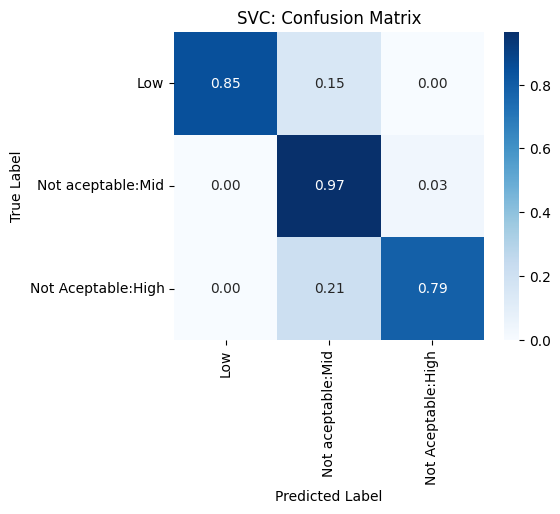

In [ ]:
#### SVC
svc = SVC(C=1.5, gamma=0.05)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm_normalized)
pl.figure(figsize=(5, 4))
sns.heatmap(df_cm, annot=True, fmt='.2f', cmap='Blues', cbar=True,
            xticklabels=[index_dict[key] for key in np.unique(y_pred)], yticklabels=[index_dict[key] for key in np.unique(y_test)])
pl.xlabel('Predicted Label')
pl.ylabel('True Label')
pl.title('SVC: Confusion Matrix')
pl.show()

# Smart Watch + OCRA

In [ ]:
for i in gc.list_spreadsheet_files():
  if 'SMARTWATCH + OCRA (FIXED)' in i['name']:
    spreadsheet = gc.open(i['name']).sheet1
    data = spreadsheet.get_all_values()

In [ ]:
df = pd.DataFrame(data[1:], columns=data[0])
df.drop('Moment', axis=1, inplace=True)
df

ID participant Turn Plant/Line       Day   Time LoTNum Age  Experience  \
0              VP1I    2          4  Thursday  14:22      1   32          5   
1              VP1I    2          4  Thursday  14:23      1   32          5   
2              VP1I    2          4  Thursday  14:24      1   32          5   
3              VP1I    2          4  Thursday  14:25      1   32          5   
4              VP1I    2          4  Thursday  14:26      1   32          5   
...             ...  ...        ...       ...    ...    ...  ...        ...   
2300          VP43F    3          4    Monday  05:14    100   23      0.166   
2301          VP43F    3          4    Monday  05:15    100   23      0.166   
2302          VP43F    3          4    Monday  05:16    100   23      0.166   
2303          VP43F    3          4    Monday  05:17    100   23      0.166   
2304          VP43F    3          4    Monday  05:18    100   23      0.166   

     eda_scl_usiemens pulse_rate_bpm temperature_celsius accelerometers_std_g  \
0                0.04             83               26.11                0.061   
1                0.42             86               28.16                0.064   
2                0.64             87               28.67                0.053   
3                0.61             82               29.06                0.002   
4                0.37             84               29.42                 0.01   
...               ...            ...                 ...                  ...   
2300             0.07             77               30.62                0.106   
2301             0.07             83               30.63                0.093   
2302             0.07             73               30.64                0.088   
2303             0.07             78               30.66                 0.11   
2304             0.07             76               30.67                0.079   

     steps_count activity_counts IndexRiskR IndexRiskL  
0             26             134                        
1             13              92                        
2             13              72                        
3              0               2                        
4              0              17                        
...          ...             ...        ...        ...  
2300          75             144                        
2301          92             152                        
2302          58             147                        
2303          90             144                        
2304          63             141                        

[2305 rows x 16 columns]

In [ ]:
for col in df.columns:
  df[col].replace('', np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
df

ID participant Turn Plant/Line        Day   Time LoTNum Age  Experience  \
5              VP1I    2          4   Thursday  14:27      1   32          5   
6              VP1I    2          4   Thursday  14:28      1   32          5   
7              VP1I    2          4   Thursday  14:29      1   32          5   
8              VP1I    2          4   Thursday  14:30      1   32          5   
9              VP1I    2          4   Thursday  14:31      1   32          5   
...             ...  ...        ...        ...    ...    ...  ...        ...   
2096          VP39F    3          8  Wednesday  05:00     88   32       0.25   
2097          VP39F    3          8  Wednesday  05:01     88   32       0.25   
2098          VP39F    3          8  Wednesday  05:02     88   32       0.25   
2099          VP39F    3          8  Wednesday  05:03     88   32       0.25   
2100          VP39F    3          8  Wednesday  05:04     88   32       0.25   

     eda_scl_usiemens pulse_rate_bpm temperature_celsius accelerometers_std_g  \
5                0.25             84               29.78                0.005   
6                 0.2             88               30.08                0.098   
7                0.21             85               30.31                 0.07   
8                0.16             86               30.56                0.078   
9                0.14             85               30.79                0.069   
...               ...            ...                 ...                  ...   
2096             0.27             80               30.99                0.063   
2097              0.2             88               30.96                 0.07   
2098             0.23             77               30.95                0.065   
2099             0.43             71               30.92                0.071   
2100             0.77             62                30.9                0.063   

     steps_count activity_counts IndexRiskR IndexRiskL  
5              0               4     19.425     19.425  
6             86             141     19.425     19.425  
7             71             144     19.425     19.425  
8             88             147     19.425     19.425  
9             67             143     19.425     19.425  
...          ...             ...        ...        ...  
2096          66             146     19.425     23.125  
2097          74             146     19.425     19.425  
2098          72             150     17.575     10.175  
2099          48             142     19.425     19.425  
2100          54             145     19.425     19.425  

[1003 rows x 16 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder_day = LabelEncoder()
df['Day'] = encoder_day.fit_transform(df['Day'])

df

ID participant Turn Plant/Line  Day   Time LoTNum Age  Experience  \
5              VP1I    2          4    1  14:27      1   32          5   
6              VP1I    2          4    1  14:28      1   32          5   
7              VP1I    2          4    1  14:29      1   32          5   
8              VP1I    2          4    1  14:30      1   32          5   
9              VP1I    2          4    1  14:31      1   32          5   
...             ...  ...        ...  ...    ...    ...  ...        ...   
2096          VP39F    3          8    3  05:00     88   32       0.25   
2097          VP39F    3          8    3  05:01     88   32       0.25   
2098          VP39F    3          8    3  05:02     88   32       0.25   
2099          VP39F    3          8    3  05:03     88   32       0.25   
2100          VP39F    3          8    3  05:04     88   32       0.25   

     eda_scl_usiemens pulse_rate_bpm temperature_celsius accelerometers_std_g  \
5                0.25             84               29.78                0.005   
6                 0.2             88               30.08                0.098   
7                0.21             85               30.31                 0.07   
8                0.16             86               30.56                0.078   
9                0.14             85               30.79                0.069   
...               ...            ...                 ...                  ...   
2096             0.27             80               30.99                0.063   
2097              0.2             88               30.96                 0.07   
2098             0.23             77               30.95                0.065   
2099             0.43             71               30.92                0.071   
2100             0.77             62                30.9                0.063   

     steps_count activity_counts IndexRiskR IndexRiskL  
5              0               4     19.425     19.425  
6             86             141     19.425     19.425  
7             71             144     19.425     19.425  
8             88             147     19.425     19.425  
9             67             143     19.425     19.425  
...          ...             ...        ...        ...  
2096          66             146     19.425     23.125  
2097          74             146     19.425     19.425  
2098          72             150     17.575     10.175  
2099          48             142     19.425     19.425  
2100          54             145     19.425     19.425  

[1003 rows x 16 columns]

In [ ]:
df.to_csv('/content/drive/MyDrive/Investigación/OCRA_private/Data/smart_OCRA_raw.csv', index=False)

In [ ]:
from sklearn.preprocessing import LabelEncoder

sm_ocra_df = pd.read_csv('/content/drive/MyDrive/Investigación/OCRA_private/Data/smart_OCRA_raw.csv')


def convertID(ID):
  return str(ID[-1:])

sm_ocra_df['ID participant'] = sm_ocra_df['ID participant'].apply(convertID)

encoder_id = LabelEncoder()
sm_ocra_df['ID participant'] = encoder_id.fit_transform(sm_ocra_df['ID participant'])

sm_ocra_df = sm_ocra_df.rename(columns={'ID participant': 'Moment'})
sm_ocra_df = sm_ocra_df.drop(['Time'], axis=1)
sm_ocra_df

Moment  Turn  Plant/Line  Day  LoTNum  Age   Experience  \
0          1     2           4    1       1    32        5.00   
1          1     2           4    1       1    32        5.00   
2          1     2           4    1       1    32        5.00   
3          1     2           4    1       1    32        5.00   
4          1     2           4    1       1    32        5.00   
...      ...   ...         ...  ...     ...   ...         ...   
998        0     3           8    3      88    32        0.25   
999        0     3           8    3      88    32        0.25   
1000       0     3           8    3      88    32        0.25   
1001       0     3           8    3      88    32        0.25   
1002       0     3           8    3      88    32        0.25   

      eda_scl_usiemens  pulse_rate_bpm  temperature_celsius  \
0                 0.25              84                29.78   
1                 0.20              88                30.08   
2                 0.21              85                30.31   
3                 0.16              86                30.56   
4                 0.14              85                30.79   
...                ...             ...                  ...   
998               0.27              80                30.99   
999               0.20              88                30.96   
1000              0.23              77                30.95   
1001              0.43              71                30.92   
1002              0.77              62                30.90   

      accelerometers_std_g  steps_count  activity_counts  IndexRiskR  \
0                    0.005            0                4      19.425   
1                    0.098           86              141      19.425   
2                    0.070           71              144      19.425   
3                    0.078           88              147      19.425   
4                    0.069           67              143      19.425   
...                    ...          ...              ...         ...   
998                  0.063           66              146      19.425   
999                  0.070           74              146      19.425   
1000                 0.065           72              150      17.575   
1001                 0.071           48              142      19.425   
1002                 0.063           54              145      19.425   

      IndexRiskL  
0         19.425  
1         19.425  
2         19.425  
3         19.425  
4         19.425  
...          ...  
998       23.125  
999       19.425  
1000      10.175  
1001      19.425  
1002      19.425  

[1003 rows x 15 columns]

In [ ]:
sm_ocra_df.corr()

Moment      Turn  Plant/Line       Day    LoTNum  \
Moment                1.000000 -0.027700    0.100052  0.097147 -0.128575   
Turn                 -0.027700  1.000000    0.396151  0.387554  0.464187   
Plant/Line            0.100052  0.396151    1.000000  0.600663  0.056819   
Day                   0.097147  0.387554    0.600663  1.000000 -0.216536   
LoTNum               -0.128575  0.464187    0.056819 -0.216536  1.000000   
Age                  -0.009093 -0.150693    0.126277  0.076652 -0.106978   
Experience           -0.086548 -0.162170   -0.016593 -0.169812  0.033121   
eda_scl_usiemens     -0.102326  0.190377   -0.054392  0.159466  0.043044   
pulse_rate_bpm       -0.080838 -0.041999   -0.082152 -0.007321 -0.125969   
temperature_celsius  -0.180033 -0.016024   -0.185572 -0.225453 -0.122554   
accelerometers_std_g  0.057774  0.333177    0.307053  0.142106  0.385930   
steps_count           0.059406  0.419463    0.149484 -0.068524  0.576439   
activity_counts      -0.053622  0.129268    0.065033 -0.032064  0.287421   
IndexRiskR            0.022239 -0.021562   -0.100117  0.133289 -0.234677   
IndexRiskL            0.004051  0.100188   -0.094912  0.081034 -0.125409   

                          Age   Experience  eda_scl_usiemens  pulse_rate_bpm  \
Moment               -0.009093   -0.086548         -0.102326       -0.080838   
Turn                 -0.150693   -0.162170          0.190377       -0.041999   
Plant/Line            0.126277   -0.016593         -0.054392       -0.082152   
Day                   0.076652   -0.169812          0.159466       -0.007321   
LoTNum               -0.106978    0.033121          0.043044       -0.125969   
Age                   1.000000    0.644548         -0.285404       -0.009351   
Experience            0.644548    1.000000         -0.102646        0.086924   
eda_scl_usiemens     -0.285404   -0.102646          1.000000        0.123550   
pulse_rate_bpm       -0.009351    0.086924          0.123550        1.000000   
temperature_celsius  -0.011906    0.155683          0.119308        0.301949   
accelerometers_std_g  0.097803   -0.032385         -0.071810        0.010472   
steps_count           0.057893    0.044358         -0.028927       -0.024508   
activity_counts       0.052638    0.057824          0.031699        0.138874   
IndexRiskR            0.001613    0.013109         -0.004819       -0.080007   
IndexRiskL           -0.068160   -0.039957          0.082891        0.008062   

                      temperature_celsius  accelerometers_std_g  steps_count  \
Moment                          -0.180033              0.057774     0.059406   
Turn                            -0.016024              0.333177     0.419463   
Plant/Line                      -0.185572              0.307053     0.149484   
Day                             -0.225453              0.142106    -0.068524   
LoTNum                          -0.122554              0.385930     0.576439   
Age                             -0.011906              0.097803     0.057893   
Experience                       0.155683             -0.032385     0.044358   
eda_scl_usiemens                 0.119308             -0.071810    -0.028927   
pulse_rate_bpm                   0.301949              0.010472    -0.024508   
temperature_celsius              1.000000             -0.106073    -0.072951   
accelerometers_std_g            -0.106073              1.000000     0.715369   
steps_count                     -0.072951              0.715369     1.000000   
activity_counts                  0.075607              0.557512     0.638147   
IndexRiskR                       0.024593             -0.138925    -0.153158   
IndexRiskL                      -0.022556             -0.122056    -0.042862   

                      activity_counts  IndexRiskR  IndexRiskL  
Moment                      -0.053622    0.022239    0.004051  
Turn                         0.129268   -0.021562    0.100188  
Plant/Line                   0.065033   -0.100117   -

<Axes: >

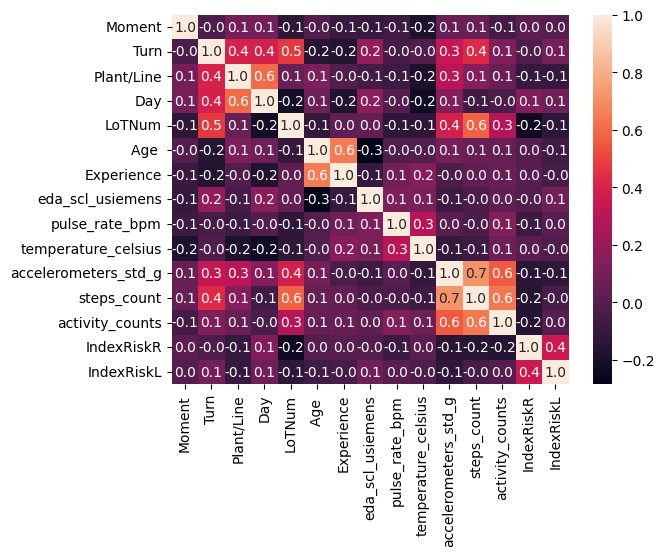

In [ ]:
sns.heatmap(sm_ocra_df.corr(), xticklabels=True, yticklabels=True, annot=True, fmt='.1f')

### Evaluation for Initial Shift

<Axes: >

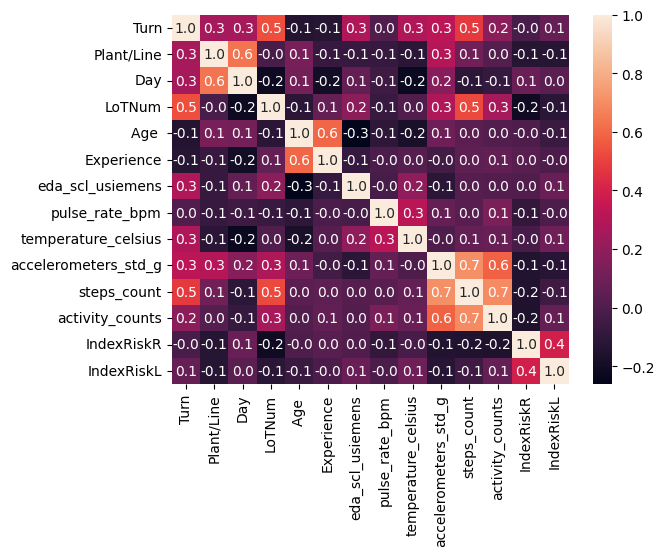

In [ ]:
sns.heatmap(sm_ocra_df.drop(['Moment'], axis=1)[sm_ocra_df['Moment']==1].corr(), xticklabels=True, yticklabels=True, annot=True, fmt='.1f')

### Evaluation for Final Shift

<Axes: >

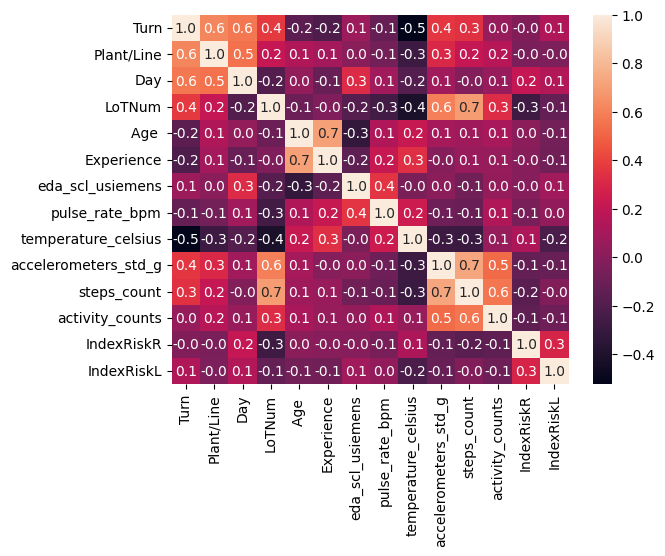

In [ ]:
sns.heatmap(sm_ocra_df.drop(['Moment'], axis=1)[sm_ocra_df['Moment']==0].corr(), xticklabels=True, yticklabels=True, annot=True, fmt='.1f')

### Index Risk R prediction


r2: 0.07775448299591248


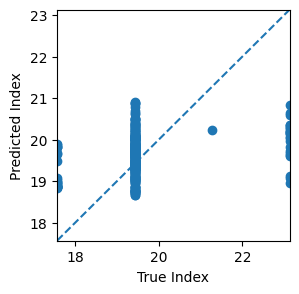

r2: -0.0030607283426384857


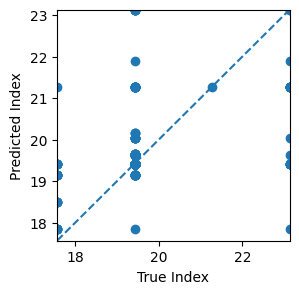

r2: 0.25116989140717105


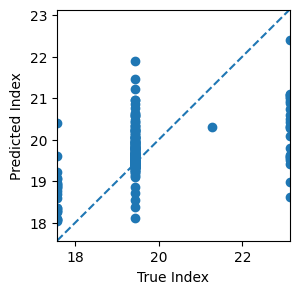

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
from sklearn.tree            import DecisionTreeRegressor
from sklearn.ensemble        import RandomForestRegressor
from sklearn.metrics         import r2_score


X = sm_ocra_df.drop(['IndexRiskR','IndexRiskL'], axis=1)
y = sm_ocra_df['IndexRiskR']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

#### LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
print(f'r2: {r2_score(y_test,y_pred)}')

pl.figure(figsize=(3,3))
pl.scatter(y_test, y_pred)
pl.xlabel('True Index')
pl.ylabel('Predicted Index')
pl.xlim(min(y_test), max(y_test))
pl.ylim(min(y_test), max(y_test))
pl.plot(np.linspace(0,max(y_test)), np.linspace(0,max(y_test)),'--')
pl.show()

#### DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(f'r2: {r2_score(y_test,y_pred)}')

pl.figure(figsize=(3,3))
pl.scatter(y_test, y_pred)
pl.xlim(min(y_test), max(y_test))
pl.xlabel('True Index')
pl.ylabel('Predicted Index')
pl.ylim(min(y_test), max(y_test))
pl.plot(np.linspace(0,max(y_test)), np.linspace(0,max(y_test)),'--')
pl.show()

#### RandomForest
forest = RandomForestRegressor(max_depth=5, n_estimators=100)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(f'r2: {r2_score(y_test,y_pred)}')

pl.figure(figsize=(3,3))
pl.scatter(y_test, y_pred)
pl.xlim(min(y_test), max(y_test))
pl.xlabel('True Index')
pl.ylabel('Predicted Index')
pl.ylim(min(y_test), max(y_test))
pl.plot(np.linspace(0,max(y_test)), np.linspace(0,max(y_test)),'--')
pl.show()

### Index Risk L prediction

r2: 0.10092875421327807


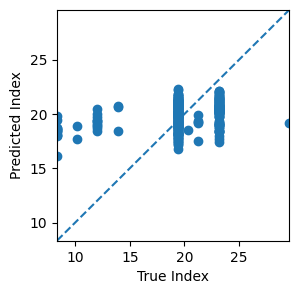

r2: 0.3065070934093236


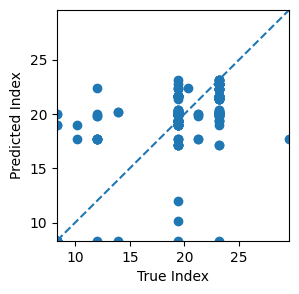

r2: 0.4302081513306567


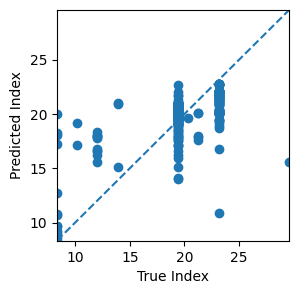

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
from sklearn.tree            import DecisionTreeRegressor
from sklearn.ensemble        import RandomForestRegressor
from sklearn.metrics         import r2_score


X = sm_ocra_df.drop(['IndexRiskR','IndexRiskL'], axis=1)
y = sm_ocra_df['IndexRiskL']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

#### LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
print(f'r2: {r2_score(y_test,y_pred)}')

pl.figure(figsize=(3,3))
pl.scatter(y_test, y_pred)
pl.xlabel('True Index')
pl.ylabel('Predicted Index')
pl.xlim(min(y_test), max(y_test))
pl.ylim(min(y_test), max(y_test))
pl.plot(np.linspace(0,max(y_test)), np.linspace(0,max(y_test)),'--')
pl.show()

#### DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(f'r2: {r2_score(y_test,y_pred)}')

pl.figure(figsize=(3,3))
pl.scatter(y_test, y_pred)
pl.xlim(min(y_test), max(y_test))
pl.xlabel('True Index')
pl.ylabel('Predicted Index')
pl.ylim(min(y_test), max(y_test))
pl.plot(np.linspace(0,max(y_test)), np.linspace(0,max(y_test)),'--')
pl.show()

#### RandomForest
forest = RandomForestRegressor(max_depth=5, n_estimators=150)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(f'r2: {r2_score(y_test,y_pred)}')

pl.figure(figsize=(3,3))
pl.scatter(y_test, y_pred)
pl.xlim(min(y_test), max(y_test))
pl.xlabel('True Index')
pl.ylabel('Predicted Index')
pl.ylim(min(y_test), max(y_test))
pl.plot(np.linspace(0,max(y_test)), np.linspace(0,max(y_test)),'--')
pl.show()

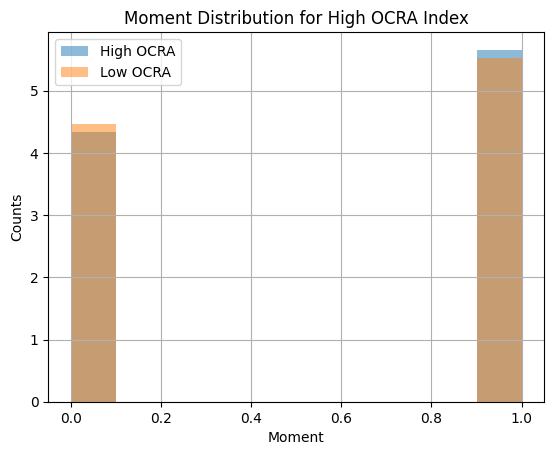

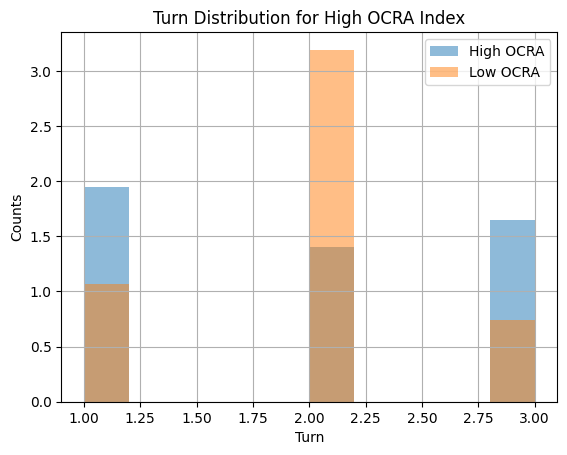

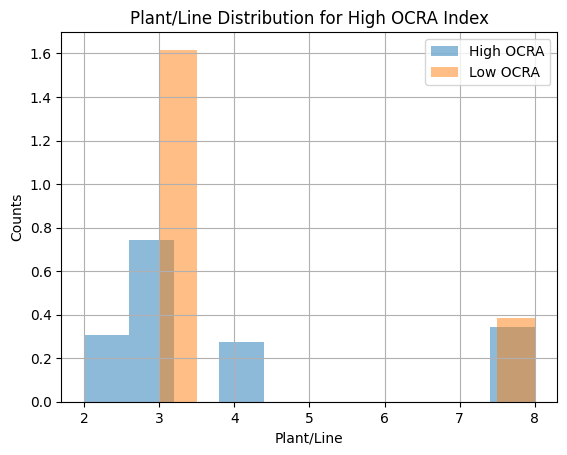

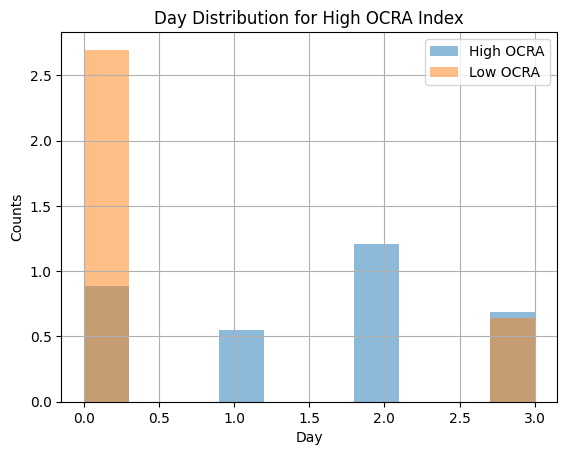

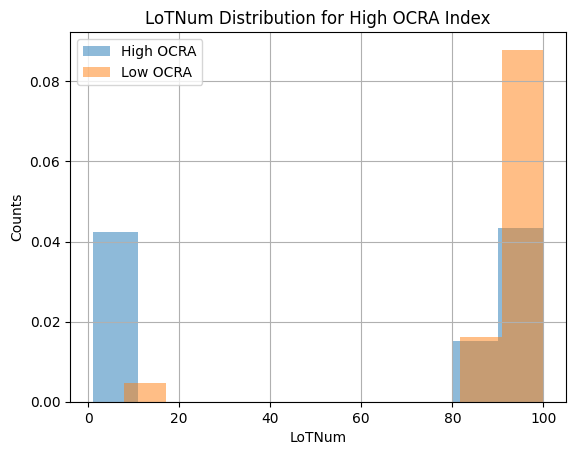

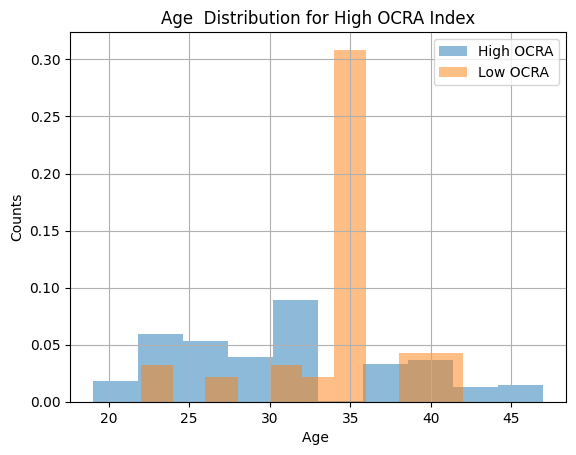

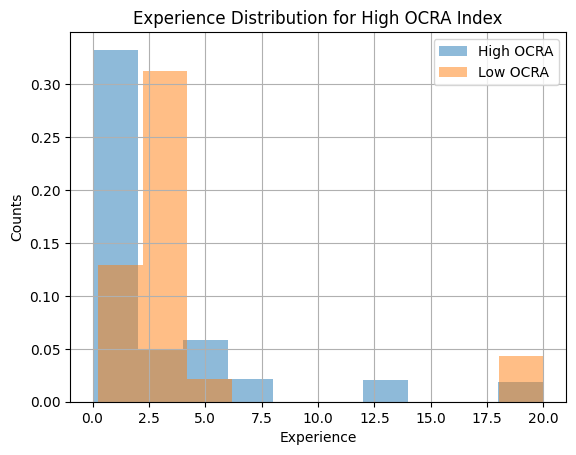

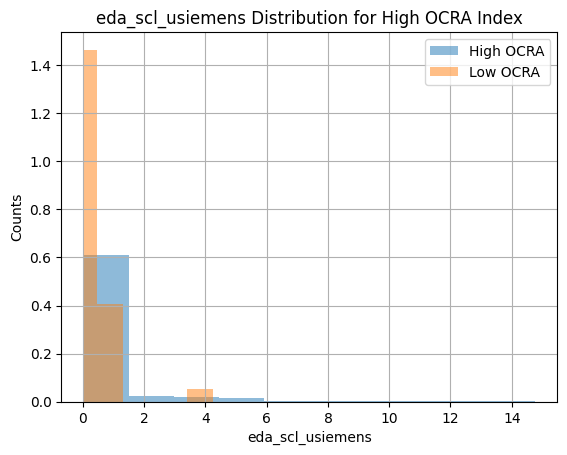

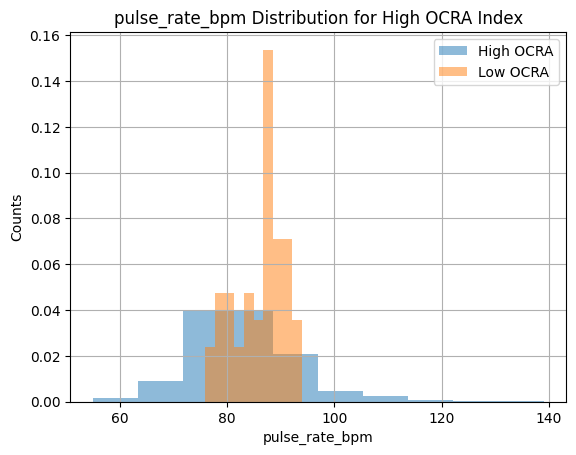

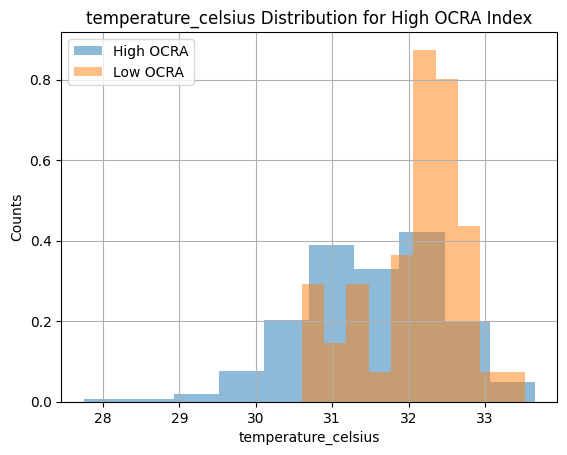

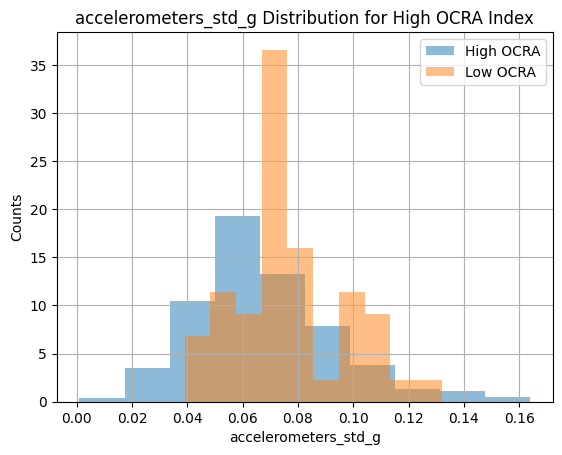

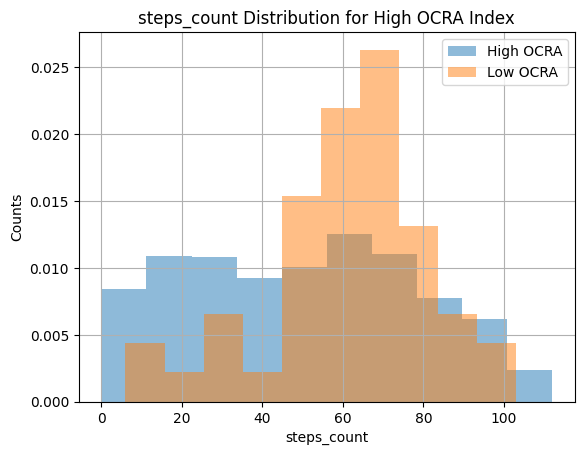

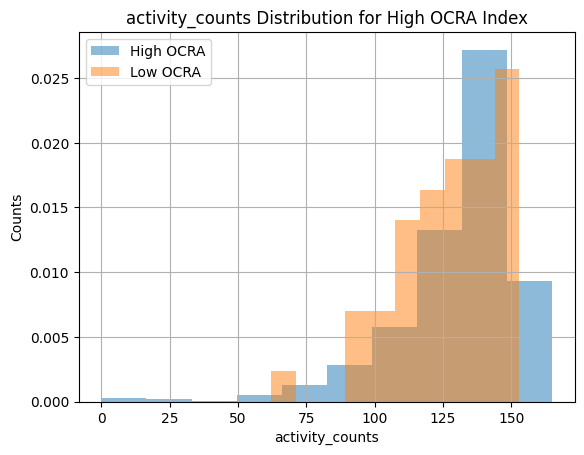

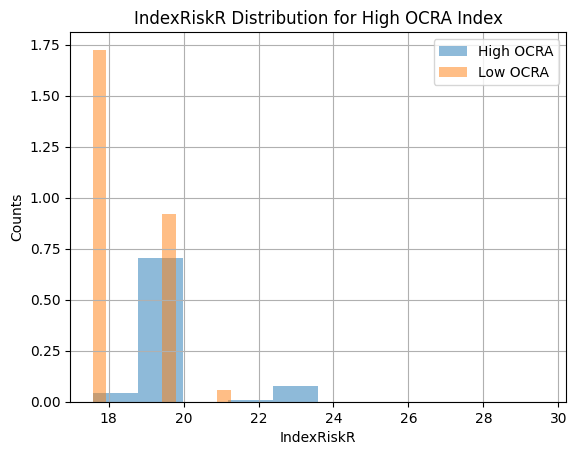

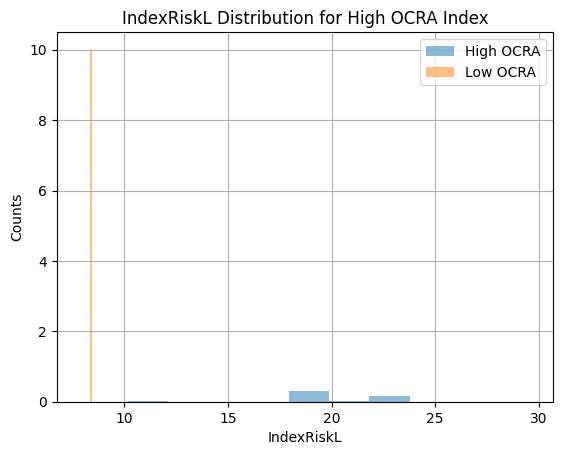

In [ ]:
for col in sm_ocra_df.columns:
  high_ii = (sm_ocra_df['IndexRiskL']>10) & (sm_ocra_df['IndexRiskR']>10)
  nohigh_ii = ~high_ii
  pl.hist(sm_ocra_df[high_ii][col], label='High OCRA', density=True, alpha=0.5)
  pl.hist(sm_ocra_df[nohigh_ii][col], label='Low OCRA', density=True, alpha=0.5)
  pl.grid()
  pl.xlabel(col)
  pl.ylabel('Counts')
  pl.legend()
  pl.title(f'{col} Distribution for High OCRA Index')
  pl.show()